# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.all, past=Past.all, durl=Durl.all, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        # Prepare these arrays for stopword-checking.
        dslice = slice(substitution.start,
                       substitution.start + len(substitution.destination.tokens))
        lemmas = substitution.source.lemmas[dslice]
        tokens = substitution.source.tokens[dslice]
        tags = substitution.source.tags[dslice]
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Stopword-check the arrays.
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token, tag) in enumerate(zip(words, lemmas, tokens, tags)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': tag,
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 118071 substitutions for model Model(time=Time.continuous, source=Source.all, past=Past.all, durl=Durl.all, max_distance=2)


  0% (     1 of 118071) |         | Elapsed Time: 0:00:04 ETA:  5 days, 15:14:11

  0% (   112 of 118071) |                  | Elapsed Time: 0:00:05 ETA:  0:17:46

  0% (   221 of 118071) |                  | Elapsed Time: 0:00:06 ETA:  0:17:53

  0% (   340 of 118071) |                  | Elapsed Time: 0:00:07 ETA:  0:17:22

  0% (   460 of 118071) |                  | Elapsed Time: 0:00:08 ETA:  0:17:05

  0% (   573 of 118071) |                  | Elapsed Time: 0:00:09 ETA:  0:17:07

  0% (   685 of 118071) |                  | Elapsed Time: 0:00:10 ETA:  0:17:09

  0% (   796 of 118071) |                  | Elapsed Time: 0:00:11 ETA:  0:17:13

  0% (   909 of 118071) |                  | Elapsed Time: 0:00:12 ETA:  0:17:12

  0% (  1023 of 118071) |                  | Elapsed Time: 0:00:13 ETA:  0:17:11

  0% (  1103 of 118071) |                  | Elapsed Time: 0:00:14 ETA:  0:17:42

  1% (  1213 of 118071) |                  | Elapsed Time: 0:00:15 ETA:  0:17:40

  1% (  1326 of 118071) |                  | Elapsed Time: 0:00:16 ETA:  0:17:46

  1% (  1439 of 118071) |                  | Elapsed Time: 0:00:17 ETA:  0:17:52

  1% (  1476 of 118071) |                  | Elapsed Time: 0:00:17 ETA:  0:17:55

  1% (  1587 of 118071) |                  | Elapsed Time: 0:00:18 ETA:  0:17:55

  1% (  1704 of 118071) |                  | Elapsed Time: 0:00:19 ETA:  0:17:47

  1% (  1818 of 118071) |                  | Elapsed Time: 0:00:20 ETA:  0:17:45

  1% (  1931 of 118071) |                  | Elapsed Time: 0:00:21 ETA:  0:17:45

  1% (  2048 of 118071) |                  | Elapsed Time: 0:00:22 ETA:  0:17:02

  1% (  2162 of 118071) |                  | Elapsed Time: 0:00:23 ETA:  0:16:56

  1% (  2273 of 118071) |                  | Elapsed Time: 0:00:24 ETA:  0:16:57

  2% (  2389 of 118071) |                  | Elapsed Time: 0:00:25 ETA:  0:16:53

  2% (  2504 of 118071) |                  | Elapsed Time: 0:00:26 ETA:  0:16:51

  2% (  2618 of 118071) |                  | Elapsed Time: 0:00:27 ETA:  0:16:47

  2% (  2732 of 118071) |                  | Elapsed Time: 0:00:28 ETA:  0:16:49

  2% (  2846 of 118071) |                  | Elapsed Time: 0:00:29 ETA:  0:16:48

  2% (  2952 of 118071) |                  | Elapsed Time: 0:00:30 ETA:  0:16:45

  2% (  3067 of 118071) |                  | Elapsed Time: 0:00:31 ETA:  0:16:45

  2% (  3182 of 118071) |                  | Elapsed Time: 0:00:32 ETA:  0:16:43

  2% (  3297 of 118071) |                  | Elapsed Time: 0:00:33 ETA:  0:16:38

  2% (  3413 of 118071) |                  | Elapsed Time: 0:00:34 ETA:  0:16:37

  2% (  3484 of 118071) |                  | Elapsed Time: 0:00:35 ETA:  0:17:23

  3% (  3594 of 118071) |                  | Elapsed Time: 0:00:36 ETA:  0:17:27

  3% (  3707 of 118071) |                  | Elapsed Time: 0:00:37 ETA:  0:17:27

  3% (  3813 of 118071) |                  | Elapsed Time: 0:00:38 ETA:  0:17:35

  3% (  3911 of 118071) |                  | Elapsed Time: 0:00:39 ETA:  0:17:54

  3% (  4020 of 118071) |                  | Elapsed Time: 0:00:40 ETA:  0:18:00

  3% (  4132 of 118071) |                  | Elapsed Time: 0:00:41 ETA:  0:18:02

  3% (  4241 of 118071) |                  | Elapsed Time: 0:00:42 ETA:  0:18:08

  3% (  4355 of 118071) |                  | Elapsed Time: 0:00:43 ETA:  0:18:10

  3% (  4428 of 118071) |                  | Elapsed Time: 0:00:44 ETA:  0:17:21

  3% (  4541 of 118071) |                  | Elapsed Time: 0:00:45 ETA:  0:17:17

  3% (  4654 of 118071) |                  | Elapsed Time: 0:00:46 ETA:  0:17:16

  4% (  4763 of 118071) |                  | Elapsed Time: 0:00:47 ETA:  0:17:11

  4% (  4869 of 118071) |                  | Elapsed Time: 0:00:48 ETA:  0:17:00

  4% (  4978 of 118071) |                  | Elapsed Time: 0:00:49 ETA:  0:17:00

  4% (  5086 of 118071) |                  | Elapsed Time: 0:00:50 ETA:  0:17:03

  4% (  5197 of 118071) |                  | Elapsed Time: 0:00:51 ETA:  0:17:00

  4% (  5307 of 118071) |                  | Elapsed Time: 0:00:52 ETA:  0:17:03

  4% (  5417 of 118071) |                  | Elapsed Time: 0:00:53 ETA:  0:17:05

  4% (  5527 of 118071) |                  | Elapsed Time: 0:00:54 ETA:  0:17:07

  4% (  5637 of 118071) |                  | Elapsed Time: 0:00:55 ETA:  0:17:09

  4% (  5746 of 118071) |                  | Elapsed Time: 0:00:56 ETA:  0:17:07

  4% (  5856 of 118071) |                  | Elapsed Time: 0:00:57 ETA:  0:17:03

  5% (  5904 of 118071) |                  | Elapsed Time: 0:00:57 ETA:  0:17:06

  5% (  6013 of 118071) |                  | Elapsed Time: 0:00:58 ETA:  0:17:04

  5% (  6119 of 118071) |                  | Elapsed Time: 0:00:59 ETA:  0:17:09

  5% (  6181 of 118071) |                  | Elapsed Time: 0:01:00 ETA:  0:18:07

  5% (  6288 of 118071) |                  | Elapsed Time: 0:01:01 ETA:  0:18:11

  5% (  6397 of 118071) |                  | Elapsed Time: 0:01:02 ETA:  0:18:11

  5% (  6507 of 118071) |                  | Elapsed Time: 0:01:03 ETA:  0:18:11

  5% (  6618 of 118071) |#                 | Elapsed Time: 0:01:04 ETA:  0:18:08

  5% (  6725 of 118071) |#                 | Elapsed Time: 0:01:05 ETA:  0:18:10

  5% (  6834 of 118071) |#                 | Elapsed Time: 0:01:06 ETA:  0:18:00

  5% (  6940 of 118071) |#                 | Elapsed Time: 0:01:07 ETA:  0:18:04

  5% (  7018 of 118071) |#                 | Elapsed Time: 0:01:08 ETA:  0:18:38

  6% (  7106 of 118071) |#                 | Elapsed Time: 0:01:09 ETA:  0:18:04

  6% (  7192 of 118071) |#                 | Elapsed Time: 0:01:10 ETA:  0:18:31

  6% (  7277 of 118071) |#                 | Elapsed Time: 0:01:11 ETA:  0:19:01

  6% (  7380 of 118071) |#                 | Elapsed Time: 0:01:12 ETA:  0:19:47

  6% (  7482 of 118071) |#                 | Elapsed Time: 0:01:13 ETA:  0:19:55

  6% (  7586 of 118071) |#                 | Elapsed Time: 0:01:14 ETA:  0:20:03

  6% (  7692 of 118071) |#                 | Elapsed Time: 0:01:15 ETA:  0:20:01

  6% (  7807 of 118071) |#                 | Elapsed Time: 0:01:16 ETA:  0:19:01

  6% (  7924 of 118071) |#                 | Elapsed Time: 0:01:17 ETA:  0:18:17

  6% (  8027 of 118071) |#                 | Elapsed Time: 0:01:18 ETA:  0:17:52

  6% (  8130 of 118071) |#                 | Elapsed Time: 0:01:19 ETA:  0:17:26

  6% (  8232 of 118071) |#                 | Elapsed Time: 0:01:20 ETA:  0:17:14

  7% (  8335 of 118071) |#                 | Elapsed Time: 0:01:21 ETA:  0:17:16

  7% (  8434 of 118071) |#                 | Elapsed Time: 0:01:22 ETA:  0:17:18

  7% (  8534 of 118071) |#                 | Elapsed Time: 0:01:23 ETA:  0:17:22

  7% (  8637 of 118071) |#                 | Elapsed Time: 0:01:24 ETA:  0:17:24

  7% (  8741 of 118071) |#                 | Elapsed Time: 0:01:25 ETA:  0:17:36

  7% (  8856 of 118071) |#                 | Elapsed Time: 0:01:27 ETA:  0:17:57

  7% (  8959 of 118071) |#                 | Elapsed Time: 0:01:28 ETA:  0:17:57

  7% (  9065 of 118071) |#                 | Elapsed Time: 0:01:29 ETA:  0:17:50

  7% (  9173 of 118071) |#                 | Elapsed Time: 0:01:30 ETA:  0:17:43

  7% (  9280 of 118071) |#                 | Elapsed Time: 0:01:31 ETA:  0:17:31

  7% (  9381 of 118071) |#                 | Elapsed Time: 0:01:32 ETA:  0:17:29

  8% (  9488 of 118071) |#                 | Elapsed Time: 0:01:33 ETA:  0:17:22

  8% (  9539 of 118071) |#                 | Elapsed Time: 0:01:34 ETA:  0:18:37

  8% (  9643 of 118071) |#                 | Elapsed Time: 0:01:35 ETA:  0:18:29

  8% (  9751 of 118071) |#                 | Elapsed Time: 0:01:36 ETA:  0:18:18

  8% (  9842 of 118071) |#                 | Elapsed Time: 0:01:37 ETA:  0:18:33

  8% (  9952 of 118071) |#                 | Elapsed Time: 0:01:38 ETA:  0:18:27

  8% ( 10065 of 118071) |#                 | Elapsed Time: 0:01:39 ETA:  0:18:19

  8% ( 10183 of 118071) |#                 | Elapsed Time: 0:01:40 ETA:  0:18:03

  8% ( 10304 of 118071) |#                 | Elapsed Time: 0:01:41 ETA:  0:17:36

  8% ( 10332 of 118071) |#                 | Elapsed Time: 0:01:41 ETA:  0:17:40

  8% ( 10448 of 118071) |#                 | Elapsed Time: 0:01:42 ETA:  0:16:16

  8% ( 10565 of 118071) |#                 | Elapsed Time: 0:01:43 ETA:  0:16:00

  9% ( 10635 of 118071) |#                 | Elapsed Time: 0:01:44 ETA:  0:16:46

  9% ( 10709 of 118071) |#                 | Elapsed Time: 0:01:45 ETA:  0:17:07

  9% ( 10782 of 118071) |#                 | Elapsed Time: 0:01:46 ETA:  0:17:56

  9% ( 10853 of 118071) |#                 | Elapsed Time: 0:01:47 ETA:  0:18:57

  9% ( 10924 of 118071) |#                 | Elapsed Time: 0:01:48 ETA:  0:20:15

  9% ( 10997 of 118071) |#                 | Elapsed Time: 0:01:49 ETA:  0:21:47

  9% ( 11066 of 118071) |#                 | Elapsed Time: 0:01:50 ETA:  0:22:27

  9% ( 11142 of 118071) |#                 | Elapsed Time: 0:01:51 ETA:  0:23:50

  9% ( 11260 of 118071) |#                 | Elapsed Time: 0:01:52 ETA:  0:23:46

  9% ( 11348 of 118071) |#                 | Elapsed Time: 0:01:53 ETA:  0:23:05

  9% ( 11430 of 118071) |#                 | Elapsed Time: 0:01:54 ETA:  0:22:48

  9% ( 11518 of 118071) |#                 | Elapsed Time: 0:01:55 ETA:  0:22:17

  9% ( 11611 of 118071) |#                 | Elapsed Time: 0:01:56 ETA:  0:21:34

  9% ( 11706 of 118071) |#                 | Elapsed Time: 0:01:57 ETA:  0:20:50

 10% ( 11808 of 118071) |#                 | Elapsed Time: 0:01:58 ETA:  0:19:35

 10% ( 11926 of 118071) |#                 | Elapsed Time: 0:01:59 ETA:  0:18:21

 10% ( 12033 of 118071) |#                 | Elapsed Time: 0:02:00 ETA:  0:17:38

 10% ( 12140 of 118071) |#                 | Elapsed Time: 0:02:01 ETA:  0:17:51

 10% ( 12248 of 118071) |#                 | Elapsed Time: 0:02:02 ETA:  0:17:23

 10% ( 12356 of 118071) |#                 | Elapsed Time: 0:02:03 ETA:  0:16:49

 10% ( 12464 of 118071) |#                 | Elapsed Time: 0:02:04 ETA:  0:16:23

 10% ( 12563 of 118071) |#                 | Elapsed Time: 0:02:05 ETA:  0:16:15

 10% ( 12642 of 118071) |#                 | Elapsed Time: 0:02:06 ETA:  0:16:34

 10% ( 12743 of 118071) |#                 | Elapsed Time: 0:02:07 ETA:  0:16:55

 10% ( 12857 of 118071) |#                 | Elapsed Time: 0:02:08 ETA:  0:17:00

 10% ( 12986 of 118071) |#                 | Elapsed Time: 0:02:09 ETA:  0:16:32

 11% ( 13108 of 118071) |#                 | Elapsed Time: 0:02:10 ETA:  0:16:13

 11% ( 13187 of 118071) |##                | Elapsed Time: 0:02:11 ETA:  0:16:46

 11% ( 13283 of 118071) |##                | Elapsed Time: 0:02:12 ETA:  0:17:31

 11% ( 13338 of 118071) |##                | Elapsed Time: 0:02:13 ETA:  0:19:12

 11% ( 13426 of 118071) |##                | Elapsed Time: 0:02:14 ETA:  0:18:55

 11% ( 13517 of 118071) |##                | Elapsed Time: 0:02:15 ETA:  0:19:11

 11% ( 13615 of 118071) |##                | Elapsed Time: 0:02:16 ETA:  0:19:37

 11% ( 13707 of 118071) |##                | Elapsed Time: 0:02:17 ETA:  0:20:45

 11% ( 13804 of 118071) |##                | Elapsed Time: 0:02:18 ETA:  0:21:33

 11% ( 13908 of 118071) |##                | Elapsed Time: 0:02:19 ETA:  0:20:43

 11% ( 14006 of 118071) |##                | Elapsed Time: 0:02:20 ETA:  0:20:10

 11% ( 14106 of 118071) |##                | Elapsed Time: 0:02:21 ETA:  0:19:49

 12% ( 14208 of 118071) |##                | Elapsed Time: 0:02:22 ETA:  0:18:04

 12% ( 14312 of 118071) |##                | Elapsed Time: 0:02:23 ETA:  0:17:41

 12% ( 14413 of 118071) |##                | Elapsed Time: 0:02:24 ETA:  0:17:26

 12% ( 14516 of 118071) |##                | Elapsed Time: 0:02:25 ETA:  0:17:18

 12% ( 14609 of 118071) |##                | Elapsed Time: 0:02:26 ETA:  0:17:15

 12% ( 14709 of 118071) |##                | Elapsed Time: 0:02:27 ETA:  0:17:11

 12% ( 14759 of 118071) |##                | Elapsed Time: 0:02:28 ETA:  0:17:17

 12% ( 14859 of 118071) |##                | Elapsed Time: 0:02:29 ETA:  0:17:13

 12% ( 14962 of 118071) |##                | Elapsed Time: 0:02:30 ETA:  0:17:09

 12% ( 15069 of 118071) |##                | Elapsed Time: 0:02:31 ETA:  0:17:02

 12% ( 15172 of 118071) |##                | Elapsed Time: 0:02:32 ETA:  0:17:02

 12% ( 15273 of 118071) |##                | Elapsed Time: 0:02:33 ETA:  0:17:01

 13% ( 15378 of 118071) |##                | Elapsed Time: 0:02:34 ETA:  0:16:57

 13% ( 15479 of 118071) |##                | Elapsed Time: 0:02:35 ETA:  0:16:44

 13% ( 15582 of 118071) |##                | Elapsed Time: 0:02:36 ETA:  0:16:38

 13% ( 15688 of 118071) |##                | Elapsed Time: 0:02:37 ETA:  0:16:30

 13% ( 15794 of 118071) |##                | Elapsed Time: 0:02:38 ETA:  0:16:23

 13% ( 15897 of 118071) |##                | Elapsed Time: 0:02:39 ETA:  0:16:22

 13% ( 16001 of 118071) |##                | Elapsed Time: 0:02:40 ETA:  0:16:24

 13% ( 16101 of 118071) |##                | Elapsed Time: 0:02:41 ETA:  0:16:26

 13% ( 16205 of 118071) |##                | Elapsed Time: 0:02:42 ETA:  0:16:22

 13% ( 16235 of 118071) |##                | Elapsed Time: 0:02:42 ETA:  0:16:23

 13% ( 16341 of 118071) |##                | Elapsed Time: 0:02:43 ETA:  0:16:16

 13% ( 16442 of 118071) |##                | Elapsed Time: 0:02:44 ETA:  0:16:18

 14% ( 16551 of 118071) |##                | Elapsed Time: 0:02:45 ETA:  0:16:12

 14% ( 16655 of 118071) |##                | Elapsed Time: 0:02:46 ETA:  0:16:14

 14% ( 16755 of 118071) |##                | Elapsed Time: 0:02:47 ETA:  0:16:16

 14% ( 16850 of 118071) |##                | Elapsed Time: 0:02:48 ETA:  0:16:28

 14% ( 16938 of 118071) |##                | Elapsed Time: 0:02:49 ETA:  0:16:44

 14% ( 17034 of 118071) |##                | Elapsed Time: 0:02:50 ETA:  0:16:55

 14% ( 17148 of 118071) |##                | Elapsed Time: 0:02:51 ETA:  0:16:37

 14% ( 17239 of 118071) |##                | Elapsed Time: 0:02:52 ETA:  0:16:56

 14% ( 17351 of 118071) |##                | Elapsed Time: 0:02:53 ETA:  0:16:40

 14% ( 17459 of 118071) |##                | Elapsed Time: 0:02:54 ETA:  0:16:43

 14% ( 17567 of 118071) |##                | Elapsed Time: 0:02:55 ETA:  0:16:37

 14% ( 17680 of 118071) |##                | Elapsed Time: 0:02:56 ETA:  0:16:20

 15% ( 17711 of 118071) |##                | Elapsed Time: 0:02:57 ETA:  0:16:09

 15% ( 17812 of 118071) |##                | Elapsed Time: 0:02:58 ETA:  0:15:50

 15% ( 17902 of 118071) |##                | Elapsed Time: 0:02:59 ETA:  0:15:57

 15% ( 17993 of 118071) |##                | Elapsed Time: 0:03:00 ETA:  0:16:28

 15% ( 18078 of 118071) |##                | Elapsed Time: 0:03:01 ETA:  0:16:36

 15% ( 18173 of 118071) |##                | Elapsed Time: 0:03:02 ETA:  0:16:59

 15% ( 18285 of 118071) |##                | Elapsed Time: 0:03:03 ETA:  0:16:49

 15% ( 18410 of 118071) |##                | Elapsed Time: 0:03:04 ETA:  0:16:24

 15% ( 18535 of 118071) |##                | Elapsed Time: 0:03:05 ETA:  0:16:07

 15% ( 18572 of 118071) |##                | Elapsed Time: 0:03:06 ETA:  0:17:40

 15% ( 18688 of 118071) |##                | Elapsed Time: 0:03:07 ETA:  0:17:17

 15% ( 18793 of 118071) |##                | Elapsed Time: 0:03:08 ETA:  0:16:56

 16% ( 18898 of 118071) |##                | Elapsed Time: 0:03:09 ETA:  0:16:36

 16% ( 19001 of 118071) |##                | Elapsed Time: 0:03:10 ETA:  0:16:11

 16% ( 19104 of 118071) |##                | Elapsed Time: 0:03:11 ETA:  0:16:00

 16% ( 19187 of 118071) |##                | Elapsed Time: 0:03:12 ETA:  0:16:08

 16% ( 19293 of 118071) |##                | Elapsed Time: 0:03:13 ETA:  0:16:32

 16% ( 19401 of 118071) |##                | Elapsed Time: 0:03:14 ETA:  0:16:54

 16% ( 19507 of 118071) |##                | Elapsed Time: 0:03:15 ETA:  0:15:19

 16% ( 19619 of 118071) |##                | Elapsed Time: 0:03:16 ETA:  0:15:22

 16% ( 19732 of 118071) |###               | Elapsed Time: 0:03:17 ETA:  0:15:11

 16% ( 19845 of 118071) |###               | Elapsed Time: 0:03:18 ETA:  0:15:01

 16% ( 19959 of 118071) |###               | Elapsed Time: 0:03:19 ETA:  0:14:48

 17% ( 20073 of 118071) |###               | Elapsed Time: 0:03:20 ETA:  0:14:34

 17% ( 20187 of 118071) |###               | Elapsed Time: 0:03:21 ETA:  0:14:25

 17% ( 20303 of 118071) |###               | Elapsed Time: 0:03:22 ETA:  0:14:14

 17% ( 20414 of 118071) |###               | Elapsed Time: 0:03:23 ETA:  0:14:10

 17% ( 20525 of 118071) |###               | Elapsed Time: 0:03:24 ETA:  0:14:04

 17% ( 20638 of 118071) |###               | Elapsed Time: 0:03:25 ETA:  0:14:02

 17% ( 20663 of 118071) |###               | Elapsed Time: 0:03:25 ETA:  0:14:04

 17% ( 20774 of 118071) |###               | Elapsed Time: 0:03:26 ETA:  0:14:04

 17% ( 20884 of 118071) |###               | Elapsed Time: 0:03:27 ETA:  0:14:07

 17% ( 20995 of 118071) |###               | Elapsed Time: 0:03:28 ETA:  0:14:11

 17% ( 21104 of 118071) |###               | Elapsed Time: 0:03:29 ETA:  0:14:15

 17% ( 21215 of 118071) |###               | Elapsed Time: 0:03:30 ETA:  0:14:19

 18% ( 21326 of 118071) |###               | Elapsed Time: 0:03:31 ETA:  0:14:18

 18% ( 21441 of 118071) |###               | Elapsed Time: 0:03:32 ETA:  0:14:12

 18% ( 21555 of 118071) |###               | Elapsed Time: 0:03:33 ETA:  0:14:10

 18% ( 21670 of 118071) |###               | Elapsed Time: 0:03:34 ETA:  0:14:04

 18% ( 21781 of 118071) |###               | Elapsed Time: 0:03:35 ETA:  0:14:03

 18% ( 21899 of 118071) |###               | Elapsed Time: 0:03:36 ETA:  0:13:54

 18% ( 22013 of 118071) |###               | Elapsed Time: 0:03:37 ETA:  0:13:50

 18% ( 22139 of 118071) |###               | Elapsed Time: 0:03:38 ETA:  0:13:38

 18% ( 22257 of 118071) |###               | Elapsed Time: 0:03:39 ETA:  0:13:30

 18% ( 22373 of 118071) |###               | Elapsed Time: 0:03:40 ETA:  0:13:30

 19% ( 22490 of 118071) |###               | Elapsed Time: 0:03:41 ETA:  0:13:25

 19% ( 22608 of 118071) |###               | Elapsed Time: 0:03:42 ETA:  0:13:21

 19% ( 22726 of 118071) |###               | Elapsed Time: 0:03:43 ETA:  0:13:13

 19% ( 22839 of 118071) |###               | Elapsed Time: 0:03:44 ETA:  0:13:17

 19% ( 22957 of 118071) |###               | Elapsed Time: 0:03:45 ETA:  0:13:13

 19% ( 23072 of 118071) |###               | Elapsed Time: 0:03:46 ETA:  0:13:13

 19% ( 23183 of 118071) |###               | Elapsed Time: 0:03:47 ETA:  0:13:18

 19% ( 23296 of 118071) |###               | Elapsed Time: 0:03:48 ETA:  0:13:21

 19% ( 23410 of 118071) |###               | Elapsed Time: 0:03:49 ETA:  0:13:20

 19% ( 23521 of 118071) |###               | Elapsed Time: 0:03:50 ETA:  0:13:26

 20% ( 23615 of 118071) |###               | Elapsed Time: 0:03:51 ETA:  0:13:36

 20% ( 23722 of 118071) |###               | Elapsed Time: 0:03:52 ETA:  0:13:46

 20% ( 23828 of 118071) |###               | Elapsed Time: 0:03:53 ETA:  0:13:52

 20% ( 23939 of 118071) |###               | Elapsed Time: 0:03:54 ETA:  0:13:58

 20% ( 24052 of 118071) |###               | Elapsed Time: 0:03:55 ETA:  0:13:59

 20% ( 24164 of 118071) |###               | Elapsed Time: 0:03:56 ETA:  0:13:57

 20% ( 24278 of 118071) |###               | Elapsed Time: 0:03:57 ETA:  0:13:54

 20% ( 24395 of 118071) |###               | Elapsed Time: 0:03:58 ETA:  0:13:51

 20% ( 24513 of 118071) |###               | Elapsed Time: 0:03:59 ETA:  0:13:42

 20% ( 24628 of 118071) |###               | Elapsed Time: 0:04:00 ETA:  0:13:33

 20% ( 24743 of 118071) |###               | Elapsed Time: 0:04:01 ETA:  0:13:24

 21% ( 24860 of 118071) |###               | Elapsed Time: 0:04:02 ETA:  0:13:12

 21% ( 24872 of 118071) |###               | Elapsed Time: 0:04:03 ETA:  0:15:01

 21% ( 24984 of 118071) |###               | Elapsed Time: 0:04:04 ETA:  0:15:01

 21% ( 25091 of 118071) |###               | Elapsed Time: 0:04:05 ETA:  0:15:02

 21% ( 25194 of 118071) |###               | Elapsed Time: 0:04:06 ETA:  0:15:15

 21% ( 25315 of 118071) |###               | Elapsed Time: 0:04:07 ETA:  0:15:08

 21% ( 25438 of 118071) |###               | Elapsed Time: 0:04:08 ETA:  0:15:00

 21% ( 25527 of 118071) |###               | Elapsed Time: 0:04:09 ETA:  0:15:32

 21% ( 25615 of 118071) |###               | Elapsed Time: 0:04:10 ETA:  0:16:08

 21% ( 25701 of 118071) |###               | Elapsed Time: 0:04:11 ETA:  0:16:52

 21% ( 25785 of 118071) |###               | Elapsed Time: 0:04:12 ETA:  0:15:11

 21% ( 25869 of 118071) |###               | Elapsed Time: 0:04:13 ETA:  0:15:48

 21% ( 25951 of 118071) |###               | Elapsed Time: 0:04:14 ETA:  0:16:27

 22% ( 26033 of 118071) |###               | Elapsed Time: 0:04:15 ETA:  0:16:57

 22% ( 26119 of 118071) |###               | Elapsed Time: 0:04:16 ETA:  0:17:52

 22% ( 26207 of 118071) |###               | Elapsed Time: 0:04:17 ETA:  0:18:52

 22% ( 26290 of 118071) |####              | Elapsed Time: 0:04:18 ETA:  0:19:03

 22% ( 26376 of 118071) |####              | Elapsed Time: 0:04:19 ETA:  0:19:05

 22% ( 26456 of 118071) |####              | Elapsed Time: 0:04:20 ETA:  0:19:17

 22% ( 26566 of 118071) |####              | Elapsed Time: 0:04:21 ETA:  0:18:27

 22% ( 26664 of 118071) |####              | Elapsed Time: 0:04:22 ETA:  0:18:00

 22% ( 26775 of 118071) |####              | Elapsed Time: 0:04:23 ETA:  0:17:13

 22% ( 26886 of 118071) |####              | Elapsed Time: 0:04:24 ETA:  0:16:28

 22% ( 26992 of 118071) |####              | Elapsed Time: 0:04:25 ETA:  0:15:58

 22% ( 27095 of 118071) |####              | Elapsed Time: 0:04:26 ETA:  0:15:35

 23% ( 27201 of 118071) |####              | Elapsed Time: 0:04:27 ETA:  0:15:03

 23% ( 27310 of 118071) |####              | Elapsed Time: 0:04:28 ETA:  0:14:33

 23% ( 27417 of 118071) |####              | Elapsed Time: 0:04:29 ETA:  0:14:00

 23% ( 27526 of 118071) |####              | Elapsed Time: 0:04:30 ETA:  0:14:01

 23% ( 27632 of 118071) |####              | Elapsed Time: 0:04:31 ETA:  0:13:51

 23% ( 27737 of 118071) |####              | Elapsed Time: 0:04:32 ETA:  0:13:57

 23% ( 27840 of 118071) |####              | Elapsed Time: 0:04:33 ETA:  0:14:05

 23% ( 27945 of 118071) |####              | Elapsed Time: 0:04:34 ETA:  0:14:06

 23% ( 28042 of 118071) |####              | Elapsed Time: 0:04:35 ETA:  0:13:54

 23% ( 28162 of 118071) |####              | Elapsed Time: 0:04:36 ETA:  0:13:37

 23% ( 28266 of 118071) |####              | Elapsed Time: 0:04:37 ETA:  0:13:42

 24% ( 28365 of 118071) |####              | Elapsed Time: 0:04:38 ETA:  0:13:50

 24% ( 28464 of 118071) |####              | Elapsed Time: 0:04:39 ETA:  0:14:01

 24% ( 28563 of 118071) |####              | Elapsed Time: 0:04:40 ETA:  0:14:08

 24% ( 28654 of 118071) |####              | Elapsed Time: 0:04:41 ETA:  0:14:24

 24% ( 28778 of 118071) |####              | Elapsed Time: 0:04:42 ETA:  0:13:58

 24% ( 28871 of 118071) |####              | Elapsed Time: 0:04:43 ETA:  0:14:11

 24% ( 28968 of 118071) |####              | Elapsed Time: 0:04:44 ETA:  0:14:28

 24% ( 29078 of 118071) |####              | Elapsed Time: 0:04:45 ETA:  0:14:40

 24% ( 29195 of 118071) |####              | Elapsed Time: 0:04:46 ETA:  0:14:22

 24% ( 29309 of 118071) |####              | Elapsed Time: 0:04:47 ETA:  0:14:03

 24% ( 29425 of 118071) |####              | Elapsed Time: 0:04:48 ETA:  0:13:41

 25% ( 29518 of 118071) |####              | Elapsed Time: 0:04:49 ETA:  0:13:23

 25% ( 29614 of 118071) |####              | Elapsed Time: 0:04:50 ETA:  0:13:17

 25% ( 29715 of 118071) |####              | Elapsed Time: 0:04:51 ETA:  0:13:42

 25% ( 29811 of 118071) |####              | Elapsed Time: 0:04:52 ETA:  0:13:38

 25% ( 29932 of 118071) |####              | Elapsed Time: 0:04:53 ETA:  0:13:10

 25% ( 30033 of 118071) |####              | Elapsed Time: 0:04:54 ETA:  0:13:19

 25% ( 30137 of 118071) |####              | Elapsed Time: 0:04:55 ETA:  0:13:33

 25% ( 30242 of 118071) |####              | Elapsed Time: 0:04:56 ETA:  0:13:43

 25% ( 30342 of 118071) |####              | Elapsed Time: 0:04:57 ETA:  0:14:01

 25% ( 30438 of 118071) |####              | Elapsed Time: 0:04:58 ETA:  0:14:23

 25% ( 30555 of 118071) |####              | Elapsed Time: 0:04:59 ETA:  0:13:55

 25% ( 30681 of 118071) |####              | Elapsed Time: 0:05:00 ETA:  0:13:24

 26% ( 30792 of 118071) |####              | Elapsed Time: 0:05:01 ETA:  0:13:06

 26% ( 30892 of 118071) |####              | Elapsed Time: 0:05:02 ETA:  0:13:28

 26% ( 30994 of 118071) |####              | Elapsed Time: 0:05:03 ETA:  0:13:17

 26% ( 31082 of 118071) |####              | Elapsed Time: 0:05:04 ETA:  0:13:34

 26% ( 31174 of 118071) |####              | Elapsed Time: 0:05:05 ETA:  0:13:49

 26% ( 31266 of 118071) |####              | Elapsed Time: 0:05:06 ETA:  0:13:58

 26% ( 31359 of 118071) |####              | Elapsed Time: 0:05:07 ETA:  0:14:00

 26% ( 31452 of 118071) |####              | Elapsed Time: 0:05:08 ETA:  0:14:30

 26% ( 31546 of 118071) |####              | Elapsed Time: 0:05:09 ETA:  0:15:14

 26% ( 31657 of 118071) |####              | Elapsed Time: 0:05:10 ETA:  0:15:12

 26% ( 31782 of 118071) |####              | Elapsed Time: 0:05:11 ETA:  0:14:38

 27% ( 31890 of 118071) |####              | Elapsed Time: 0:05:12 ETA:  0:14:38

 27% ( 32000 of 118071) |####              | Elapsed Time: 0:05:13 ETA:  0:14:09

 27% ( 32014 of 118071) |####              | Elapsed Time: 0:05:14 ETA:  0:16:27

 27% ( 32117 of 118071) |####              | Elapsed Time: 0:05:15 ETA:  0:16:09

 27% ( 32216 of 118071) |####              | Elapsed Time: 0:05:16 ETA:  0:15:59

 27% ( 32326 of 118071) |####              | Elapsed Time: 0:05:17 ETA:  0:15:33

 27% ( 32424 of 118071) |####              | Elapsed Time: 0:05:18 ETA:  0:15:25

 27% ( 32470 of 118071) |####              | Elapsed Time: 0:05:19 ETA:  0:15:53

 27% ( 32566 of 118071) |####              | Elapsed Time: 0:05:20 ETA:  0:16:38

 27% ( 32661 of 118071) |####              | Elapsed Time: 0:05:21 ETA:  0:17:00

 27% ( 32754 of 118071) |####              | Elapsed Time: 0:05:22 ETA:  0:17:30

 27% ( 32862 of 118071) |#####             | Elapsed Time: 0:05:23 ETA:  0:14:25

 27% ( 32981 of 118071) |#####             | Elapsed Time: 0:05:24 ETA:  0:14:02

 28% ( 33081 of 118071) |#####             | Elapsed Time: 0:05:25 ETA:  0:14:00

 28% ( 33198 of 118071) |#####             | Elapsed Time: 0:05:26 ETA:  0:13:51

 28% ( 33320 of 118071) |#####             | Elapsed Time: 0:05:27 ETA:  0:13:19

 28% ( 33440 of 118071) |#####             | Elapsed Time: 0:05:28 ETA:  0:12:52

 28% ( 33566 of 118071) |#####             | Elapsed Time: 0:05:29 ETA:  0:12:18

 28% ( 33692 of 118071) |#####             | Elapsed Time: 0:05:30 ETA:  0:11:45

 28% ( 33812 of 118071) |#####             | Elapsed Time: 0:05:31 ETA:  0:11:17

 28% ( 33921 of 118071) |#####             | Elapsed Time: 0:05:32 ETA:  0:11:15

 28% ( 33946 of 118071) |#####             | Elapsed Time: 0:05:32 ETA:  0:11:16

 28% ( 34064 of 118071) |#####             | Elapsed Time: 0:05:33 ETA:  0:10:56

 28% ( 34188 of 118071) |#####             | Elapsed Time: 0:05:34 ETA:  0:10:48

 29% ( 34308 of 118071) |#####             | Elapsed Time: 0:05:35 ETA:  0:10:49

 29% ( 34406 of 118071) |#####             | Elapsed Time: 0:05:36 ETA:  0:11:11

 29% ( 34504 of 118071) |#####             | Elapsed Time: 0:05:37 ETA:  0:11:40

 29% ( 34610 of 118071) |#####             | Elapsed Time: 0:05:38 ETA:  0:12:01

 29% ( 34716 of 118071) |#####             | Elapsed Time: 0:05:39 ETA:  0:12:17

 29% ( 34813 of 118071) |#####             | Elapsed Time: 0:05:40 ETA:  0:12:31

 29% ( 34909 of 118071) |#####             | Elapsed Time: 0:05:41 ETA:  0:12:48

 29% ( 35010 of 118071) |#####             | Elapsed Time: 0:05:42 ETA:  0:13:07

 29% ( 35100 of 118071) |#####             | Elapsed Time: 0:05:43 ETA:  0:13:48

 29% ( 35187 of 118071) |#####             | Elapsed Time: 0:05:44 ETA:  0:14:30

 29% ( 35289 of 118071) |#####             | Elapsed Time: 0:05:45 ETA:  0:14:24

 29% ( 35382 of 118071) |#####             | Elapsed Time: 0:05:46 ETA:  0:14:30

 30% ( 35422 of 118071) |#####             | Elapsed Time: 0:05:46 ETA:  0:14:44

 30% ( 35532 of 118071) |#####             | Elapsed Time: 0:05:47 ETA:  0:14:37

 30% ( 35654 of 118071) |#####             | Elapsed Time: 0:05:48 ETA:  0:14:00

 30% ( 35746 of 118071) |#####             | Elapsed Time: 0:05:49 ETA:  0:14:04

 30% ( 35834 of 118071) |#####             | Elapsed Time: 0:05:50 ETA:  0:14:22

 30% ( 35921 of 118071) |#####             | Elapsed Time: 0:05:51 ETA:  0:14:25

 30% ( 36012 of 118071) |#####             | Elapsed Time: 0:05:52 ETA:  0:14:17

 30% ( 36121 of 118071) |#####             | Elapsed Time: 0:05:53 ETA:  0:14:05

 30% ( 36245 of 118071) |#####             | Elapsed Time: 0:05:54 ETA:  0:13:21

 30% ( 36339 of 118071) |#####             | Elapsed Time: 0:05:55 ETA:  0:13:28

 30% ( 36427 of 118071) |#####             | Elapsed Time: 0:05:56 ETA:  0:13:55

 30% ( 36533 of 118071) |#####             | Elapsed Time: 0:05:57 ETA:  0:14:16

 31% ( 36639 of 118071) |#####             | Elapsed Time: 0:05:58 ETA:  0:13:57

 31% ( 36747 of 118071) |#####             | Elapsed Time: 0:06:00 ETA:  0:13:29

 31% ( 36858 of 118071) |#####             | Elapsed Time: 0:06:01 ETA:  0:12:58

 31% ( 36898 of 118071) |#####             | Elapsed Time: 0:06:01 ETA:  0:12:32

 31% ( 37019 of 118071) |#####             | Elapsed Time: 0:06:02 ETA:  0:12:16

 31% ( 37127 of 118071) |#####             | Elapsed Time: 0:06:03 ETA:  0:12:35

 31% ( 37232 of 118071) |#####             | Elapsed Time: 0:06:04 ETA:  0:12:20

 31% ( 37350 of 118071) |#####             | Elapsed Time: 0:06:05 ETA:  0:11:43

 31% ( 37452 of 118071) |#####             | Elapsed Time: 0:06:06 ETA:  0:11:46

 31% ( 37552 of 118071) |#####             | Elapsed Time: 0:06:07 ETA:  0:11:52

 31% ( 37656 of 118071) |#####             | Elapsed Time: 0:06:08 ETA:  0:11:55

 31% ( 37757 of 118071) |#####             | Elapsed Time: 0:06:09 ETA:  0:12:07

 32% ( 37876 of 118071) |#####             | Elapsed Time: 0:06:10 ETA:  0:12:01

 32% ( 37974 of 118071) |#####             | Elapsed Time: 0:06:11 ETA:  0:12:26

 32% ( 38065 of 118071) |#####             | Elapsed Time: 0:06:12 ETA:  0:12:46

 32% ( 38160 of 118071) |#####             | Elapsed Time: 0:06:13 ETA:  0:12:58

 32% ( 38263 of 118071) |#####             | Elapsed Time: 0:06:14 ETA:  0:13:15

 32% ( 38374 of 118071) |#####             | Elapsed Time: 0:06:15 ETA:  0:13:02

 32% ( 38493 of 118071) |#####             | Elapsed Time: 0:06:16 ETA:  0:12:37

 32% ( 38622 of 118071) |#####             | Elapsed Time: 0:06:17 ETA:  0:12:06

 32% ( 38745 of 118071) |#####             | Elapsed Time: 0:06:18 ETA:  0:11:40

 32% ( 38868 of 118071) |#####             | Elapsed Time: 0:06:19 ETA:  0:11:35

 33% ( 38991 of 118071) |#####             | Elapsed Time: 0:06:20 ETA:  0:11:08

 33% ( 39112 of 118071) |#####             | Elapsed Time: 0:06:21 ETA:  0:10:37

 33% ( 39228 of 118071) |#####             | Elapsed Time: 0:06:22 ETA:  0:10:15

 33% ( 39311 of 118071) |#####             | Elapsed Time: 0:06:23 ETA:  0:10:33

 33% ( 39390 of 118071) |######            | Elapsed Time: 0:06:24 ETA:  0:11:06

 33% ( 39494 of 118071) |######            | Elapsed Time: 0:06:25 ETA:  0:11:21

 33% ( 39581 of 118071) |######            | Elapsed Time: 0:06:26 ETA:  0:12:06

 33% ( 39661 of 118071) |######            | Elapsed Time: 0:06:27 ETA:  0:12:58

 33% ( 39745 of 118071) |######            | Elapsed Time: 0:06:28 ETA:  0:13:49

 33% ( 39849 of 118071) |######            | Elapsed Time: 0:06:29 ETA:  0:14:05

 33% ( 39969 of 118071) |######            | Elapsed Time: 0:06:30 ETA:  0:14:05

 33% ( 40080 of 118071) |######            | Elapsed Time: 0:06:31 ETA:  0:14:11

 34% ( 40175 of 118071) |######            | Elapsed Time: 0:06:32 ETA:  0:13:52

 34% ( 40266 of 118071) |######            | Elapsed Time: 0:06:33 ETA:  0:13:35

 34% ( 40378 of 118071) |######            | Elapsed Time: 0:06:34 ETA:  0:13:23

 34% ( 40495 of 118071) |######            | Elapsed Time: 0:06:35 ETA:  0:12:43

 34% ( 40599 of 118071) |######            | Elapsed Time: 0:06:36 ETA:  0:12:13

 34% ( 40696 of 118071) |######            | Elapsed Time: 0:06:37 ETA:  0:11:55

 34% ( 40738 of 118071) |######            | Elapsed Time: 0:06:39 ETA:  0:15:17

 34% ( 40835 of 118071) |######            | Elapsed Time: 0:06:40 ETA:  0:15:51

 34% ( 40919 of 118071) |######            | Elapsed Time: 0:06:41 ETA:  0:16:34

 34% ( 41003 of 118071) |######            | Elapsed Time: 0:06:42 ETA:  0:16:51

 34% ( 41102 of 118071) |######            | Elapsed Time: 0:06:43 ETA:  0:16:36

 34% ( 41222 of 118071) |######            | Elapsed Time: 0:06:44 ETA:  0:16:23

 35% ( 41325 of 118071) |######            | Elapsed Time: 0:06:45 ETA:  0:16:26

 35% ( 41440 of 118071) |######            | Elapsed Time: 0:06:46 ETA:  0:16:07

 35% ( 41557 of 118071) |######            | Elapsed Time: 0:06:47 ETA:  0:15:34

 35% ( 41678 of 118071) |######            | Elapsed Time: 0:06:48 ETA:  0:11:51

 35% ( 41802 of 118071) |######            | Elapsed Time: 0:06:49 ETA:  0:11:19

 35% ( 41928 of 118071) |######            | Elapsed Time: 0:06:50 ETA:  0:10:32

 35% ( 42037 of 118071) |######            | Elapsed Time: 0:06:51 ETA:  0:10:06

 35% ( 42145 of 118071) |######            | Elapsed Time: 0:06:52 ETA:  0:09:56

 35% ( 42256 of 118071) |######            | Elapsed Time: 0:06:53 ETA:  0:10:03

 35% ( 42364 of 118071) |######            | Elapsed Time: 0:06:54 ETA:  0:10:13

 35% ( 42456 of 118071) |######            | Elapsed Time: 0:06:55 ETA:  0:10:35

 36% ( 42561 of 118071) |######            | Elapsed Time: 0:06:56 ETA:  0:10:47

 36% ( 42682 of 118071) |######            | Elapsed Time: 0:06:57 ETA:  0:10:45

 36% ( 42773 of 118071) |######            | Elapsed Time: 0:06:58 ETA:  0:11:21

 36% ( 42801 of 118071) |######            | Elapsed Time: 0:06:58 ETA:  0:11:54

 36% ( 42886 of 118071) |######            | Elapsed Time: 0:06:59 ETA:  0:12:25

 36% ( 42986 of 118071) |######            | Elapsed Time: 0:07:00 ETA:  0:12:34

 36% ( 43087 of 118071) |######            | Elapsed Time: 0:07:01 ETA:  0:12:47

 36% ( 43166 of 118071) |######            | Elapsed Time: 0:07:02 ETA:  0:13:30

 36% ( 43239 of 118071) |######            | Elapsed Time: 0:07:03 ETA:  0:13:59

 36% ( 43314 of 118071) |######            | Elapsed Time: 0:07:04 ETA:  0:14:48

 36% ( 43389 of 118071) |######            | Elapsed Time: 0:07:05 ETA:  0:16:12

 36% ( 43466 of 118071) |######            | Elapsed Time: 0:07:06 ETA:  0:16:38

 36% ( 43545 of 118071) |######            | Elapsed Time: 0:07:07 ETA:  0:16:47

 36% ( 43639 of 118071) |######            | Elapsed Time: 0:07:08 ETA:  0:16:28

 37% ( 43762 of 118071) |######            | Elapsed Time: 0:07:09 ETA:  0:15:45

 37% ( 43879 of 118071) |######            | Elapsed Time: 0:07:10 ETA:  0:15:17

 37% ( 44002 of 118071) |######            | Elapsed Time: 0:07:11 ETA:  0:14:04

 37% ( 44104 of 118071) |######            | Elapsed Time: 0:07:12 ETA:  0:13:21

 37% ( 44216 of 118071) |######            | Elapsed Time: 0:07:13 ETA:  0:12:29

 37% ( 44277 of 118071) |######            | Elapsed Time: 0:07:14 ETA:  0:11:45

 37% ( 44391 of 118071) |######            | Elapsed Time: 0:07:15 ETA:  0:10:58

 37% ( 44501 of 118071) |######            | Elapsed Time: 0:07:16 ETA:  0:10:22

 37% ( 44614 of 118071) |######            | Elapsed Time: 0:07:17 ETA:  0:10:00

 37% ( 44738 of 118071) |######            | Elapsed Time: 0:07:18 ETA:  0:09:59

 37% ( 44838 of 118071) |######            | Elapsed Time: 0:07:19 ETA:  0:10:16

 38% ( 44942 of 118071) |######            | Elapsed Time: 0:07:20 ETA:  0:10:36

 38% ( 45057 of 118071) |######            | Elapsed Time: 0:07:21 ETA:  0:10:20

 38% ( 45175 of 118071) |######            | Elapsed Time: 0:07:22 ETA:  0:10:12

 38% ( 45288 of 118071) |######            | Elapsed Time: 0:07:23 ETA:  0:10:12

 38% ( 45402 of 118071) |######            | Elapsed Time: 0:07:24 ETA:  0:10:11

 38% ( 45515 of 118071) |######            | Elapsed Time: 0:07:25 ETA:  0:10:06

 38% ( 45630 of 118071) |######            | Elapsed Time: 0:07:26 ETA:  0:10:04

 38% ( 45753 of 118071) |######            | Elapsed Time: 0:07:27 ETA:  0:09:56

 38% ( 45856 of 118071) |######            | Elapsed Time: 0:07:28 ETA:  0:09:56

 38% ( 45944 of 118071) |#######           | Elapsed Time: 0:07:29 ETA:  0:10:27

 39% ( 46051 of 118071) |#######           | Elapsed Time: 0:07:30 ETA:  0:10:39

 39% ( 46157 of 118071) |#######           | Elapsed Time: 0:07:31 ETA:  0:10:48

 39% ( 46257 of 118071) |#######           | Elapsed Time: 0:07:32 ETA:  0:11:05

 39% ( 46351 of 118071) |#######           | Elapsed Time: 0:07:33 ETA:  0:11:29

 39% ( 46437 of 118071) |#######           | Elapsed Time: 0:07:34 ETA:  0:12:09

 39% ( 46550 of 118071) |#######           | Elapsed Time: 0:07:35 ETA:  0:12:14

 39% ( 46665 of 118071) |#######           | Elapsed Time: 0:07:36 ETA:  0:11:54

 39% ( 46771 of 118071) |#######           | Elapsed Time: 0:07:37 ETA:  0:11:49

 39% ( 46869 of 118071) |#######           | Elapsed Time: 0:07:38 ETA:  0:11:36

 39% ( 46976 of 118071) |#######           | Elapsed Time: 0:07:39 ETA:  0:11:35

 39% ( 47078 of 118071) |#######           | Elapsed Time: 0:07:40 ETA:  0:11:39

 39% ( 47174 of 118071) |#######           | Elapsed Time: 0:07:41 ETA:  0:11:43

 40% ( 47229 of 118071) |#######           | Elapsed Time: 0:07:41 ETA:  0:11:36

 40% ( 47327 of 118071) |#######           | Elapsed Time: 0:07:42 ETA:  0:11:19

 40% ( 47424 of 118071) |#######           | Elapsed Time: 0:07:43 ETA:  0:11:39

 40% ( 47529 of 118071) |#######           | Elapsed Time: 0:07:44 ETA:  0:11:52

 40% ( 47659 of 118071) |#######           | Elapsed Time: 0:07:45 ETA:  0:11:19

 40% ( 47792 of 118071) |#######           | Elapsed Time: 0:07:46 ETA:  0:10:34

 40% ( 47922 of 118071) |#######           | Elapsed Time: 0:07:47 ETA:  0:10:06

 40% ( 48050 of 118071) |#######           | Elapsed Time: 0:07:48 ETA:  0:09:37

 40% ( 48156 of 118071) |#######           | Elapsed Time: 0:07:49 ETA:  0:09:25

 40% ( 48274 of 118071) |#######           | Elapsed Time: 0:07:50 ETA:  0:09:11

 40% ( 48391 of 118071) |#######           | Elapsed Time: 0:07:51 ETA:  0:08:51

 41% ( 48457 of 118071) |#######           | Elapsed Time: 0:07:52 ETA:  0:09:21

 41% ( 48563 of 118071) |#######           | Elapsed Time: 0:07:54 ETA:  0:09:19

 41% ( 48705 of 118071) |#######           | Elapsed Time: 0:07:55 ETA:  0:09:47

 41% ( 48829 of 118071) |#######           | Elapsed Time: 0:07:56 ETA:  0:09:53

 41% ( 48913 of 118071) |#######           | Elapsed Time: 0:07:57 ETA:  0:10:44

 41% ( 49017 of 118071) |#######           | Elapsed Time: 0:07:58 ETA:  0:10:47

 41% ( 49112 of 118071) |#######           | Elapsed Time: 0:07:59 ETA:  0:11:16

 41% ( 49207 of 118071) |#######           | Elapsed Time: 0:08:00 ETA:  0:11:47

 41% ( 49306 of 118071) |#######           | Elapsed Time: 0:08:01 ETA:  0:11:00

 41% ( 49391 of 118071) |#######           | Elapsed Time: 0:08:02 ETA:  0:11:28

 41% ( 49509 of 118071) |#######           | Elapsed Time: 0:08:03 ETA:  0:11:31

 42% ( 49629 of 118071) |#######           | Elapsed Time: 0:08:04 ETA:  0:11:11

 42% ( 49751 of 118071) |#######           | Elapsed Time: 0:08:05 ETA:  0:11:13

 42% ( 49865 of 118071) |#######           | Elapsed Time: 0:08:06 ETA:  0:10:35

 42% ( 49960 of 118071) |#######           | Elapsed Time: 0:08:07 ETA:  0:10:45

 42% ( 50049 of 118071) |#######           | Elapsed Time: 0:08:08 ETA:  0:10:51

 42% ( 50181 of 118071) |#######           | Elapsed Time: 0:08:09 ETA:  0:10:12

 42% ( 50307 of 118071) |#######           | Elapsed Time: 0:08:10 ETA:  0:09:21

 42% ( 50434 of 118071) |#######           | Elapsed Time: 0:08:11 ETA:  0:09:10

 42% ( 50535 of 118071) |#######           | Elapsed Time: 0:08:12 ETA:  0:09:31

 42% ( 50642 of 118071) |#######           | Elapsed Time: 0:08:13 ETA:  0:09:47

 42% ( 50770 of 118071) |#######           | Elapsed Time: 0:08:14 ETA:  0:09:30

 43% ( 50894 of 118071) |#######           | Elapsed Time: 0:08:15 ETA:  0:08:55

 43% ( 50992 of 118071) |#######           | Elapsed Time: 0:08:16 ETA:  0:08:44

 43% ( 51085 of 118071) |#######           | Elapsed Time: 0:08:17 ETA:  0:09:08

 43% ( 51186 of 118071) |#######           | Elapsed Time: 0:08:18 ETA:  0:09:23

 43% ( 51293 of 118071) |#######           | Elapsed Time: 0:08:19 ETA:  0:09:42

 43% ( 51354 of 118071) |#######           | Elapsed Time: 0:08:21 ETA:  0:13:28

 43% ( 51462 of 118071) |#######           | Elapsed Time: 0:08:22 ETA:  0:13:16

 43% ( 51576 of 118071) |#######           | Elapsed Time: 0:08:23 ETA:  0:13:06

 43% ( 51657 of 118071) |#######           | Elapsed Time: 0:08:24 ETA:  0:13:29

 43% ( 51766 of 118071) |#######           | Elapsed Time: 0:08:25 ETA:  0:13:51

 43% ( 51881 of 118071) |#######           | Elapsed Time: 0:08:26 ETA:  0:13:25

 44% ( 52001 of 118071) |#######           | Elapsed Time: 0:08:27 ETA:  0:12:45

 44% ( 52114 of 118071) |#######           | Elapsed Time: 0:08:28 ETA:  0:12:27

 44% ( 52219 of 118071) |#######           | Elapsed Time: 0:08:29 ETA:  0:12:29

 44% ( 52319 of 118071) |#######           | Elapsed Time: 0:08:30 ETA:  0:09:15

 44% ( 52395 of 118071) |#######           | Elapsed Time: 0:08:31 ETA:  0:09:52

 44% ( 52479 of 118071) |########          | Elapsed Time: 0:08:32 ETA:  0:10:27

 44% ( 52581 of 118071) |########          | Elapsed Time: 0:08:33 ETA:  0:10:43

 44% ( 52692 of 118071) |########          | Elapsed Time: 0:08:34 ETA:  0:10:39

 44% ( 52784 of 118071) |########          | Elapsed Time: 0:08:35 ETA:  0:11:07

 44% ( 52882 of 118071) |########          | Elapsed Time: 0:08:36 ETA:  0:11:35

 44% ( 52978 of 118071) |########          | Elapsed Time: 0:08:37 ETA:  0:11:57

 44% ( 53085 of 118071) |########          | Elapsed Time: 0:08:38 ETA:  0:11:53

 45% ( 53132 of 118071) |########          | Elapsed Time: 0:08:38 ETA:  0:11:53

 45% ( 53238 of 118071) |########          | Elapsed Time: 0:08:39 ETA:  0:11:07

 45% ( 53351 of 118071) |########          | Elapsed Time: 0:08:40 ETA:  0:10:27

 45% ( 53467 of 118071) |########          | Elapsed Time: 0:08:41 ETA:  0:10:08

 45% ( 53582 of 118071) |########          | Elapsed Time: 0:08:42 ETA:  0:10:02

 45% ( 53686 of 118071) |########          | Elapsed Time: 0:08:43 ETA:  0:09:46

 45% ( 53796 of 118071) |########          | Elapsed Time: 0:08:44 ETA:  0:09:31

 45% ( 53899 of 118071) |########          | Elapsed Time: 0:08:45 ETA:  0:09:22

 45% ( 54003 of 118071) |########          | Elapsed Time: 0:08:46 ETA:  0:09:25

 45% ( 54115 of 118071) |########          | Elapsed Time: 0:08:47 ETA:  0:09:18

 45% ( 54225 of 118071) |########          | Elapsed Time: 0:08:48 ETA:  0:09:13

 46% ( 54325 of 118071) |########          | Elapsed Time: 0:08:49 ETA:  0:09:26

 46% ( 54412 of 118071) |########          | Elapsed Time: 0:08:50 ETA:  0:09:59

 46% ( 54521 of 118071) |########          | Elapsed Time: 0:08:51 ETA:  0:10:05

 46% ( 54608 of 118071) |########          | Elapsed Time: 0:08:52 ETA:  0:09:53

 46% ( 54719 of 118071) |########          | Elapsed Time: 0:08:53 ETA:  0:09:50

 46% ( 54843 of 118071) |########          | Elapsed Time: 0:08:54 ETA:  0:09:25

 46% ( 54942 of 118071) |########          | Elapsed Time: 0:08:55 ETA:  0:09:30

 46% ( 55034 of 118071) |########          | Elapsed Time: 0:08:56 ETA:  0:09:53

 46% ( 55144 of 118071) |########          | Elapsed Time: 0:08:57 ETA:  0:09:52

 46% ( 55263 of 118071) |########          | Elapsed Time: 0:08:58 ETA:  0:09:29

 46% ( 55382 of 118071) |########          | Elapsed Time: 0:08:59 ETA:  0:08:50

 47% ( 55502 of 118071) |########          | Elapsed Time: 0:09:00 ETA:  0:08:37

 47% ( 55620 of 118071) |########          | Elapsed Time: 0:09:01 ETA:  0:08:34

 47% ( 55733 of 118071) |########          | Elapsed Time: 0:09:02 ETA:  0:08:31

 47% ( 55863 of 118071) |########          | Elapsed Time: 0:09:03 ETA:  0:08:24

 47% ( 55980 of 118071) |########          | Elapsed Time: 0:09:04 ETA:  0:08:05

 47% ( 56084 of 118071) |########          | Elapsed Time: 0:09:05 ETA:  0:08:01

 47% ( 56151 of 118071) |########          | Elapsed Time: 0:09:06 ETA:  0:09:01

 47% ( 56218 of 118071) |########          | Elapsed Time: 0:09:07 ETA:  0:10:10

 47% ( 56336 of 118071) |########          | Elapsed Time: 0:09:08 ETA:  0:10:11

 47% ( 56453 of 118071) |########          | Elapsed Time: 0:09:09 ETA:  0:10:11

 47% ( 56556 of 118071) |########          | Elapsed Time: 0:09:10 ETA:  0:10:24

 47% ( 56673 of 118071) |########          | Elapsed Time: 0:09:11 ETA:  0:10:41

 48% ( 56777 of 118071) |########          | Elapsed Time: 0:09:12 ETA:  0:10:59

 48% ( 56855 of 118071) |########          | Elapsed Time: 0:09:13 ETA:  0:11:26

 48% ( 56910 of 118071) |########          | Elapsed Time: 0:09:14 ETA:  0:12:22

 48% ( 56977 of 118071) |########          | Elapsed Time: 0:09:15 ETA:  0:12:21

 48% ( 57077 of 118071) |########          | Elapsed Time: 0:09:16 ETA:  0:11:29

 48% ( 57201 of 118071) |########          | Elapsed Time: 0:09:17 ETA:  0:11:19

 48% ( 57324 of 118071) |########          | Elapsed Time: 0:09:18 ETA:  0:11:10

 48% ( 57421 of 118071) |########          | Elapsed Time: 0:09:19 ETA:  0:11:17

 48% ( 57494 of 118071) |########          | Elapsed Time: 0:09:20 ETA:  0:12:24

 48% ( 57560 of 118071) |########          | Elapsed Time: 0:09:21 ETA:  0:13:10

 48% ( 57659 of 118071) |########          | Elapsed Time: 0:09:22 ETA:  0:12:33

 48% ( 57766 of 118071) |########          | Elapsed Time: 0:09:23 ETA:  0:11:11

 49% ( 57872 of 118071) |########          | Elapsed Time: 0:09:24 ETA:  0:10:15

 49% ( 57977 of 118071) |########          | Elapsed Time: 0:09:25 ETA:  0:10:07

 49% ( 58072 of 118071) |########          | Elapsed Time: 0:09:26 ETA:  0:10:46

 49% ( 58164 of 118071) |########          | Elapsed Time: 0:09:27 ETA:  0:11:29

 49% ( 58265 of 118071) |########          | Elapsed Time: 0:09:28 ETA:  0:11:22

 49% ( 58381 of 118071) |########          | Elapsed Time: 0:09:29 ETA:  0:10:19

 49% ( 58498 of 118071) |########          | Elapsed Time: 0:09:30 ETA:  0:09:27

 49% ( 58613 of 118071) |########          | Elapsed Time: 0:09:31 ETA:  0:09:06

 49% ( 58725 of 118071) |########          | Elapsed Time: 0:09:32 ETA:  0:08:59

 49% ( 58842 of 118071) |########          | Elapsed Time: 0:09:33 ETA:  0:08:46

 49% ( 58961 of 118071) |########          | Elapsed Time: 0:09:34 ETA:  0:08:30

 50% ( 59036 of 118071) |#########         | Elapsed Time: 0:09:35 ETA:  0:08:04

 50% ( 59162 of 118071) |#########         | Elapsed Time: 0:09:36 ETA:  0:07:27

 50% ( 59289 of 118071) |#########         | Elapsed Time: 0:09:37 ETA:  0:07:01

 50% ( 59416 of 118071) |#########         | Elapsed Time: 0:09:38 ETA:  0:06:50

 50% ( 59543 of 118071) |#########         | Elapsed Time: 0:09:39 ETA:  0:06:38

 50% ( 59671 of 118071) |#########         | Elapsed Time: 0:09:40 ETA:  0:06:25

 50% ( 59770 of 118071) |#########         | Elapsed Time: 0:09:41 ETA:  0:06:36

 50% ( 59869 of 118071) |#########         | Elapsed Time: 0:09:42 ETA:  0:06:52

 50% ( 59992 of 118071) |#########         | Elapsed Time: 0:09:43 ETA:  0:06:47

 50% ( 60111 of 118071) |#########         | Elapsed Time: 0:09:44 ETA:  0:06:47

 51% ( 60219 of 118071) |#########         | Elapsed Time: 0:09:45 ETA:  0:07:03

 51% ( 60329 of 118071) |#########         | Elapsed Time: 0:09:46 ETA:  0:07:18

 51% ( 60439 of 118071) |#########         | Elapsed Time: 0:09:47 ETA:  0:07:34

 51% ( 60512 of 118071) |#########         | Elapsed Time: 0:09:48 ETA:  0:07:49

 51% ( 60623 of 118071) |#########         | Elapsed Time: 0:09:49 ETA:  0:08:07

 51% ( 60715 of 118071) |#########         | Elapsed Time: 0:09:50 ETA:  0:08:14

 51% ( 60840 of 118071) |#########         | Elapsed Time: 0:09:51 ETA:  0:07:44

 51% ( 60964 of 118071) |#########         | Elapsed Time: 0:09:52 ETA:  0:07:43

 51% ( 61088 of 118071) |#########         | Elapsed Time: 0:09:53 ETA:  0:07:37

 51% ( 61209 of 118071) |#########         | Elapsed Time: 0:09:54 ETA:  0:07:22

 51% ( 61321 of 118071) |#########         | Elapsed Time: 0:09:55 ETA:  0:07:19

 52% ( 61437 of 118071) |#########         | Elapsed Time: 0:09:56 ETA:  0:07:11

 52% ( 61556 of 118071) |#########         | Elapsed Time: 0:09:57 ETA:  0:07:05

 52% ( 61640 of 118071) |#########         | Elapsed Time: 0:09:58 ETA:  0:07:31

 52% ( 61724 of 118071) |#########         | Elapsed Time: 0:09:59 ETA:  0:07:38

 52% ( 61838 of 118071) |#########         | Elapsed Time: 0:10:00 ETA:  0:07:48

 52% ( 61944 of 118071) |#########         | Elapsed Time: 0:10:01 ETA:  0:08:07

 52% ( 61988 of 118071) |#########         | Elapsed Time: 0:10:01 ETA:  0:08:34

 52% ( 62108 of 118071) |#########         | Elapsed Time: 0:10:02 ETA:  0:08:36

 52% ( 62219 of 118071) |#########         | Elapsed Time: 0:10:03 ETA:  0:08:35

 52% ( 62311 of 118071) |#########         | Elapsed Time: 0:10:04 ETA:  0:09:05

 52% ( 62401 of 118071) |#########         | Elapsed Time: 0:10:05 ETA:  0:09:43

 52% ( 62505 of 118071) |#########         | Elapsed Time: 0:10:06 ETA:  0:09:14

 53% ( 62617 of 118071) |#########         | Elapsed Time: 0:10:07 ETA:  0:08:37

 53% ( 62729 of 118071) |#########         | Elapsed Time: 0:10:08 ETA:  0:08:39

 53% ( 62848 of 118071) |#########         | Elapsed Time: 0:10:09 ETA:  0:08:21

 53% ( 62959 of 118071) |#########         | Elapsed Time: 0:10:10 ETA:  0:08:07

 53% ( 63057 of 118071) |#########         | Elapsed Time: 0:10:11 ETA:  0:08:32

 53% ( 63132 of 118071) |#########         | Elapsed Time: 0:10:12 ETA:  0:09:16

 53% ( 63227 of 118071) |#########         | Elapsed Time: 0:10:13 ETA:  0:09:10

 53% ( 63350 of 118071) |#########         | Elapsed Time: 0:10:14 ETA:  0:08:29

 53% ( 63446 of 118071) |#########         | Elapsed Time: 0:10:15 ETA:  0:08:38

 53% ( 63464 of 118071) |#########         | Elapsed Time: 0:10:16 ETA:  0:08:53

 53% ( 63569 of 118071) |#########         | Elapsed Time: 0:10:17 ETA:  0:09:02

 53% ( 63675 of 118071) |#########         | Elapsed Time: 0:10:18 ETA:  0:09:19

 54% ( 63793 of 118071) |#########         | Elapsed Time: 0:10:19 ETA:  0:09:09

 54% ( 63912 of 118071) |#########         | Elapsed Time: 0:10:20 ETA:  0:08:39

 54% ( 64027 of 118071) |#########         | Elapsed Time: 0:10:21 ETA:  0:07:46

 54% ( 64146 of 118071) |#########         | Elapsed Time: 0:10:22 ETA:  0:07:17

 54% ( 64262 of 118071) |#########         | Elapsed Time: 0:10:23 ETA:  0:07:24

 54% ( 64360 of 118071) |#########         | Elapsed Time: 0:10:24 ETA:  0:07:20

 54% ( 64399 of 118071) |#########         | Elapsed Time: 0:10:26 ETA:  0:11:26

 54% ( 64500 of 118071) |#########         | Elapsed Time: 0:10:27 ETA:  0:11:30

 54% ( 64602 of 118071) |#########         | Elapsed Time: 0:10:28 ETA:  0:11:35

 54% ( 64701 of 118071) |#########         | Elapsed Time: 0:10:29 ETA:  0:12:01

 54% ( 64814 of 118071) |#########         | Elapsed Time: 0:10:30 ETA:  0:12:09

 55% ( 64940 of 118071) |#########         | Elapsed Time: 0:10:31 ETA:  0:13:13

 55% ( 65051 of 118071) |#########         | Elapsed Time: 0:10:32 ETA:  0:13:21

 55% ( 65158 of 118071) |#########         | Elapsed Time: 0:10:33 ETA:  0:13:05

 55% ( 65280 of 118071) |#########         | Elapsed Time: 0:10:34 ETA:  0:07:47

 55% ( 65387 of 118071) |#########         | Elapsed Time: 0:10:35 ETA:  0:07:40

 55% ( 65482 of 118071) |#########         | Elapsed Time: 0:10:36 ETA:  0:07:47

 55% ( 65590 of 118071) |#########         | Elapsed Time: 0:10:37 ETA:  0:07:36

 55% ( 65701 of 118071) |##########        | Elapsed Time: 0:10:38 ETA:  0:07:37

 55% ( 65819 of 118071) |##########        | Elapsed Time: 0:10:39 ETA:  0:07:21

 55% ( 65917 of 118071) |##########        | Elapsed Time: 0:10:40 ETA:  0:07:33

 55% ( 66020 of 118071) |##########        | Elapsed Time: 0:10:41 ETA:  0:07:40

 56% ( 66124 of 118071) |##########        | Elapsed Time: 0:10:42 ETA:  0:07:42

 56% ( 66230 of 118071) |##########        | Elapsed Time: 0:10:43 ETA:  0:08:01

 56% ( 66344 of 118071) |##########        | Elapsed Time: 0:10:44 ETA:  0:07:52

 56% ( 66415 of 118071) |##########        | Elapsed Time: 0:10:45 ETA:  0:07:39

 56% ( 66524 of 118071) |##########        | Elapsed Time: 0:10:46 ETA:  0:07:36

 56% ( 66642 of 118071) |##########        | Elapsed Time: 0:10:47 ETA:  0:07:26

 56% ( 66764 of 118071) |##########        | Elapsed Time: 0:10:48 ETA:  0:07:20

 56% ( 66866 of 118071) |##########        | Elapsed Time: 0:10:49 ETA:  0:07:15

 56% ( 66942 of 118071) |##########        | Elapsed Time: 0:10:50 ETA:  0:07:47

 56% ( 67031 of 118071) |##########        | Elapsed Time: 0:10:51 ETA:  0:08:03

 56% ( 67154 of 118071) |##########        | Elapsed Time: 0:10:52 ETA:  0:07:41

 56% ( 67270 of 118071) |##########        | Elapsed Time: 0:10:53 ETA:  0:07:36

 57% ( 67392 of 118071) |##########        | Elapsed Time: 0:10:54 ETA:  0:07:16

 57% ( 67512 of 118071) |##########        | Elapsed Time: 0:10:55 ETA:  0:07:04

 57% ( 67636 of 118071) |##########        | Elapsed Time: 0:10:56 ETA:  0:06:57

 57% ( 67738 of 118071) |##########        | Elapsed Time: 0:10:57 ETA:  0:07:18

 57% ( 67828 of 118071) |##########        | Elapsed Time: 0:10:58 ETA:  0:07:30

 57% ( 67891 of 118071) |##########        | Elapsed Time: 0:10:59 ETA:  0:06:53

 57% ( 68002 of 118071) |##########        | Elapsed Time: 0:11:00 ETA:  0:06:28

 57% ( 68111 of 118071) |##########        | Elapsed Time: 0:11:01 ETA:  0:06:43

 57% ( 68225 of 118071) |##########        | Elapsed Time: 0:11:02 ETA:  0:06:44

 57% ( 68347 of 118071) |##########        | Elapsed Time: 0:11:03 ETA:  0:06:43

 57% ( 68472 of 118071) |##########        | Elapsed Time: 0:11:04 ETA:  0:06:36

 58% ( 68580 of 118071) |##########        | Elapsed Time: 0:11:05 ETA:  0:06:53

 58% ( 68695 of 118071) |##########        | Elapsed Time: 0:11:06 ETA:  0:06:37

 58% ( 68814 of 118071) |##########        | Elapsed Time: 0:11:07 ETA:  0:06:05

 58% ( 68931 of 118071) |##########        | Elapsed Time: 0:11:08 ETA:  0:05:57

 58% ( 69045 of 118071) |##########        | Elapsed Time: 0:11:09 ETA:  0:05:54

 58% ( 69154 of 118071) |##########        | Elapsed Time: 0:11:10 ETA:  0:05:53

 58% ( 69251 of 118071) |##########        | Elapsed Time: 0:11:11 ETA:  0:06:09

 58% ( 69339 of 118071) |##########        | Elapsed Time: 0:11:12 ETA:  0:06:43

 58% ( 69367 of 118071) |##########        | Elapsed Time: 0:11:12 ETA:  0:06:55

 58% ( 69476 of 118071) |##########        | Elapsed Time: 0:11:13 ETA:  0:06:53

 58% ( 69588 of 118071) |##########        | Elapsed Time: 0:11:14 ETA:  0:06:56

 59% ( 69702 of 118071) |##########        | Elapsed Time: 0:11:15 ETA:  0:07:02

 59% ( 69783 of 118071) |##########        | Elapsed Time: 0:11:16 ETA:  0:07:48

 59% ( 69876 of 118071) |##########        | Elapsed Time: 0:11:17 ETA:  0:08:16

 59% ( 69984 of 118071) |##########        | Elapsed Time: 0:11:18 ETA:  0:08:17

 59% ( 70106 of 118071) |##########        | Elapsed Time: 0:11:19 ETA:  0:07:42

 59% ( 70230 of 118071) |##########        | Elapsed Time: 0:11:20 ETA:  0:06:55

 59% ( 70349 of 118071) |##########        | Elapsed Time: 0:11:21 ETA:  0:06:47

 59% ( 70468 of 118071) |##########        | Elapsed Time: 0:11:22 ETA:  0:06:36

 59% ( 70588 of 118071) |##########        | Elapsed Time: 0:11:23 ETA:  0:06:25

 59% ( 70717 of 118071) |##########        | Elapsed Time: 0:11:24 ETA:  0:06:07

 60% ( 70843 of 118071) |##########        | Elapsed Time: 0:11:25 ETA:  0:05:20

 60% ( 70938 of 118071) |##########        | Elapsed Time: 0:11:26 ETA:  0:05:16

 60% ( 71030 of 118071) |##########        | Elapsed Time: 0:11:27 ETA:  0:05:30

 60% ( 71130 of 118071) |##########        | Elapsed Time: 0:11:28 ETA:  0:05:50

 60% ( 71248 of 118071) |##########        | Elapsed Time: 0:11:29 ETA:  0:05:55

 60% ( 71359 of 118071) |##########        | Elapsed Time: 0:11:30 ETA:  0:06:02

 60% ( 71476 of 118071) |##########        | Elapsed Time: 0:11:31 ETA:  0:06:04

 60% ( 71580 of 118071) |##########        | Elapsed Time: 0:11:32 ETA:  0:06:21

 60% ( 71680 of 118071) |##########        | Elapsed Time: 0:11:33 ETA:  0:06:53

 60% ( 71793 of 118071) |##########        | Elapsed Time: 0:11:34 ETA:  0:07:08

 60% ( 71898 of 118071) |##########        | Elapsed Time: 0:11:35 ETA:  0:06:55

 60% ( 71983 of 118071) |##########        | Elapsed Time: 0:11:36 ETA:  0:07:03

 61% ( 72109 of 118071) |##########        | Elapsed Time: 0:11:37 ETA:  0:06:33

 61% ( 72235 of 118071) |###########       | Elapsed Time: 0:11:38 ETA:  0:06:23

 61% ( 72319 of 118071) |###########       | Elapsed Time: 0:11:39 ETA:  0:06:27

 61% ( 72431 of 118071) |###########       | Elapsed Time: 0:11:40 ETA:  0:06:31

 61% ( 72550 of 118071) |###########       | Elapsed Time: 0:11:41 ETA:  0:06:14

 61% ( 72655 of 118071) |###########       | Elapsed Time: 0:11:42 ETA:  0:06:07

 61% ( 72759 of 118071) |###########       | Elapsed Time: 0:11:43 ETA:  0:06:16

 61% ( 72877 of 118071) |###########       | Elapsed Time: 0:11:44 ETA:  0:06:01

 61% ( 72966 of 118071) |###########       | Elapsed Time: 0:11:45 ETA:  0:05:55

 61% ( 73055 of 118071) |###########       | Elapsed Time: 0:11:46 ETA:  0:06:35

 61% ( 73178 of 118071) |###########       | Elapsed Time: 0:11:47 ETA:  0:06:37

 62% ( 73295 of 118071) |###########       | Elapsed Time: 0:11:48 ETA:  0:06:25

 62% ( 73403 of 118071) |###########       | Elapsed Time: 0:11:49 ETA:  0:06:29

 62% ( 73511 of 118071) |###########       | Elapsed Time: 0:11:50 ETA:  0:06:39

 62% ( 73623 of 118071) |###########       | Elapsed Time: 0:11:51 ETA:  0:06:31

 62% ( 73739 of 118071) |###########       | Elapsed Time: 0:11:52 ETA:  0:06:16

 62% ( 73795 of 118071) |###########       | Elapsed Time: 0:11:52 ETA:  0:06:20

 62% ( 73910 of 118071) |###########       | Elapsed Time: 0:11:53 ETA:  0:05:49

 62% ( 74017 of 118071) |###########       | Elapsed Time: 0:11:54 ETA:  0:05:28

 62% ( 74123 of 118071) |###########       | Elapsed Time: 0:11:55 ETA:  0:05:46

 62% ( 74235 of 118071) |###########       | Elapsed Time: 0:11:56 ETA:  0:05:50

 62% ( 74330 of 118071) |###########       | Elapsed Time: 0:11:57 ETA:  0:06:04

 63% ( 74445 of 118071) |###########       | Elapsed Time: 0:11:58 ETA:  0:05:55

 63% ( 74539 of 118071) |###########       | Elapsed Time: 0:11:59 ETA:  0:06:14

 63% ( 74657 of 118071) |###########       | Elapsed Time: 0:12:00 ETA:  0:06:11

 63% ( 74778 of 118071) |###########       | Elapsed Time: 0:12:01 ETA:  0:06:02

 63% ( 74896 of 118071) |###########       | Elapsed Time: 0:12:02 ETA:  0:05:58

 63% ( 75009 of 118071) |###########       | Elapsed Time: 0:12:03 ETA:  0:05:51

 63% ( 75116 of 118071) |###########       | Elapsed Time: 0:12:04 ETA:  0:05:50

 63% ( 75212 of 118071) |###########       | Elapsed Time: 0:12:05 ETA:  0:06:06

 63% ( 75271 of 118071) |###########       | Elapsed Time: 0:12:06 ETA:  0:05:46

 63% ( 75387 of 118071) |###########       | Elapsed Time: 0:12:07 ETA:  0:05:44

 63% ( 75504 of 118071) |###########       | Elapsed Time: 0:12:08 ETA:  0:05:17

 64% ( 75613 of 118071) |###########       | Elapsed Time: 0:12:09 ETA:  0:05:26

 64% ( 75726 of 118071) |###########       | Elapsed Time: 0:12:10 ETA:  0:05:35

 64% ( 75836 of 118071) |###########       | Elapsed Time: 0:12:11 ETA:  0:05:42

 64% ( 75950 of 118071) |###########       | Elapsed Time: 0:12:12 ETA:  0:05:39

 64% ( 76055 of 118071) |###########       | Elapsed Time: 0:12:13 ETA:  0:05:41

 64% ( 76174 of 118071) |###########       | Elapsed Time: 0:12:14 ETA:  0:05:14

 64% ( 76299 of 118071) |###########       | Elapsed Time: 0:12:15 ETA:  0:05:01

 64% ( 76425 of 118071) |###########       | Elapsed Time: 0:12:16 ETA:  0:04:51

 64% ( 76546 of 118071) |###########       | Elapsed Time: 0:12:17 ETA:  0:04:45

 64% ( 76662 of 118071) |###########       | Elapsed Time: 0:12:18 ETA:  0:04:38

 65% ( 76747 of 118071) |###########       | Elapsed Time: 0:12:19 ETA:  0:04:33

 65% ( 76868 of 118071) |###########       | Elapsed Time: 0:12:20 ETA:  0:04:22

 65% ( 76985 of 118071) |###########       | Elapsed Time: 0:12:21 ETA:  0:04:18

 65% ( 77117 of 118071) |###########       | Elapsed Time: 0:12:22 ETA:  0:03:52

 65% ( 77235 of 118071) |###########       | Elapsed Time: 0:12:23 ETA:  0:03:52

 65% ( 77349 of 118071) |###########       | Elapsed Time: 0:12:24 ETA:  0:04:02

 65% ( 77465 of 118071) |###########       | Elapsed Time: 0:12:25 ETA:  0:04:10

 65% ( 77584 of 118071) |###########       | Elapsed Time: 0:12:26 ETA:  0:04:11

 65% ( 77691 of 118071) |###########       | Elapsed Time: 0:12:27 ETA:  0:04:18

 65% ( 77796 of 118071) |###########       | Elapsed Time: 0:12:28 ETA:  0:04:29

 65% ( 77900 of 118071) |###########       | Elapsed Time: 0:12:29 ETA:  0:04:45

 66% ( 78013 of 118071) |###########       | Elapsed Time: 0:12:30 ETA:  0:04:48

 66% ( 78129 of 118071) |###########       | Elapsed Time: 0:12:31 ETA:  0:05:03

 66% ( 78223 of 118071) |###########       | Elapsed Time: 0:12:32 ETA:  0:05:17

 66% ( 78327 of 118071) |###########       | Elapsed Time: 0:12:33 ETA:  0:05:27

 66% ( 78439 of 118071) |###########       | Elapsed Time: 0:12:34 ETA:  0:05:31

 66% ( 78566 of 118071) |###########       | Elapsed Time: 0:12:35 ETA:  0:05:21

 66% ( 78692 of 118071) |###########       | Elapsed Time: 0:12:36 ETA:  0:05:00

 66% ( 78814 of 118071) |############      | Elapsed Time: 0:12:37 ETA:  0:04:41

 66% ( 78928 of 118071) |############      | Elapsed Time: 0:12:38 ETA:  0:04:30

 66% ( 79025 of 118071) |############      | Elapsed Time: 0:12:39 ETA:  0:04:45

 67% ( 79140 of 118071) |############      | Elapsed Time: 0:12:40 ETA:  0:04:46

 67% ( 79246 of 118071) |############      | Elapsed Time: 0:12:41 ETA:  0:04:44

 67% ( 79357 of 118071) |############      | Elapsed Time: 0:12:42 ETA:  0:04:35

 67% ( 79467 of 118071) |############      | Elapsed Time: 0:12:43 ETA:  0:04:35

 67% ( 79583 of 118071) |############      | Elapsed Time: 0:12:44 ETA:  0:04:45

 67% ( 79698 of 118071) |############      | Elapsed Time: 0:12:45 ETA:  0:04:56

 67% ( 79817 of 118071) |############      | Elapsed Time: 0:12:46 ETA:  0:04:57

 67% ( 79924 of 118071) |############      | Elapsed Time: 0:12:47 ETA:  0:05:03

 67% ( 80036 of 118071) |############      | Elapsed Time: 0:12:48 ETA:  0:04:46

 67% ( 80146 of 118071) |############      | Elapsed Time: 0:12:49 ETA:  0:04:50

 67% ( 80219 of 118071) |############      | Elapsed Time: 0:12:52 ETA:  0:09:30

 68% ( 80338 of 118071) |############      | Elapsed Time: 0:12:53 ETA:  0:09:18

 68% ( 80452 of 118071) |############      | Elapsed Time: 0:12:54 ETA:  0:09:12

 68% ( 80570 of 118071) |############      | Elapsed Time: 0:12:55 ETA:  0:09:09

 68% ( 80686 of 118071) |############      | Elapsed Time: 0:12:56 ETA:  0:09:07

 68% ( 80800 of 118071) |############      | Elapsed Time: 0:12:57 ETA:  0:09:12

 68% ( 80918 of 118071) |############      | Elapsed Time: 0:12:58 ETA:  0:08:57

 68% ( 81033 of 118071) |############      | Elapsed Time: 0:12:59 ETA:  0:08:52

 68% ( 81174 of 118071) |############      | Elapsed Time: 0:13:00 ETA:  0:03:56

 68% ( 81273 of 118071) |############      | Elapsed Time: 0:13:01 ETA:  0:04:17

 68% ( 81355 of 118071) |############      | Elapsed Time: 0:13:02 ETA:  0:04:53

 68% ( 81447 of 118071) |############      | Elapsed Time: 0:13:03 ETA:  0:05:24

 69% ( 81550 of 118071) |############      | Elapsed Time: 0:13:04 ETA:  0:05:40

 69% ( 81675 of 118071) |############      | Elapsed Time: 0:13:05 ETA:  0:05:25

 69% ( 81784 of 118071) |############      | Elapsed Time: 0:13:06 ETA:  0:05:35

 69% ( 81905 of 118071) |############      | Elapsed Time: 0:13:07 ETA:  0:05:26

 69% ( 82026 of 118071) |############      | Elapsed Time: 0:13:08 ETA:  0:05:21

 69% ( 82141 of 118071) |############      | Elapsed Time: 0:13:09 ETA:  0:05:14

 69% ( 82261 of 118071) |############      | Elapsed Time: 0:13:10 ETA:  0:04:50

 69% ( 82363 of 118071) |############      | Elapsed Time: 0:13:11 ETA:  0:04:28

 69% ( 82474 of 118071) |############      | Elapsed Time: 0:13:12 ETA:  0:04:06

 69% ( 82577 of 118071) |############      | Elapsed Time: 0:13:13 ETA:  0:04:05

 70% ( 82650 of 118071) |############      | Elapsed Time: 0:13:14 ETA:  0:04:15

 70% ( 82769 of 118071) |############      | Elapsed Time: 0:13:15 ETA:  0:04:03

 70% ( 82891 of 118071) |############      | Elapsed Time: 0:13:16 ETA:  0:04:01

 70% ( 83010 of 118071) |############      | Elapsed Time: 0:13:17 ETA:  0:04:02

 70% ( 83118 of 118071) |############      | Elapsed Time: 0:13:18 ETA:  0:04:08

 70% ( 83218 of 118071) |############      | Elapsed Time: 0:13:19 ETA:  0:04:29

 70% ( 83321 of 118071) |############      | Elapsed Time: 0:13:20 ETA:  0:04:26

 70% ( 83438 of 118071) |############      | Elapsed Time: 0:13:21 ETA:  0:04:19

 70% ( 83540 of 118071) |############      | Elapsed Time: 0:13:22 ETA:  0:04:18

 70% ( 83638 of 118071) |############      | Elapsed Time: 0:13:23 ETA:  0:04:35

 70% ( 83742 of 118071) |############      | Elapsed Time: 0:13:24 ETA:  0:04:51

 71% ( 83851 of 118071) |############      | Elapsed Time: 0:13:25 ETA:  0:05:05

 71% ( 83950 of 118071) |############      | Elapsed Time: 0:13:26 ETA:  0:05:28

 71% ( 84052 of 118071) |############      | Elapsed Time: 0:13:27 ETA:  0:05:34

 71% ( 84126 of 118071) |############      | Elapsed Time: 0:13:27 ETA:  0:05:19

 71% ( 84248 of 118071) |############      | Elapsed Time: 0:13:28 ETA:  0:04:55

 71% ( 84346 of 118071) |############      | Elapsed Time: 0:13:29 ETA:  0:05:18

 71% ( 84455 of 118071) |############      | Elapsed Time: 0:13:30 ETA:  0:05:09

 71% ( 84554 of 118071) |############      | Elapsed Time: 0:13:31 ETA:  0:05:07

 71% ( 84667 of 118071) |############      | Elapsed Time: 0:13:32 ETA:  0:04:55

 71% ( 84772 of 118071) |############      | Elapsed Time: 0:13:33 ETA:  0:04:59

 71% ( 84887 of 118071) |############      | Elapsed Time: 0:13:34 ETA:  0:04:39

 71% ( 84995 of 118071) |############      | Elapsed Time: 0:13:35 ETA:  0:04:34

 72% ( 85092 of 118071) |############      | Elapsed Time: 0:13:36 ETA:  0:04:52

 72% ( 85191 of 118071) |############      | Elapsed Time: 0:13:37 ETA:  0:05:17

 72% ( 85301 of 118071) |#############     | Elapsed Time: 0:13:38 ETA:  0:05:01

 72% ( 85393 of 118071) |#############     | Elapsed Time: 0:13:39 ETA:  0:05:20

 72% ( 85503 of 118071) |#############     | Elapsed Time: 0:13:40 ETA:  0:05:06

 72% ( 85602 of 118071) |#############     | Elapsed Time: 0:13:41 ETA:  0:05:40

 72% ( 85719 of 118071) |#############     | Elapsed Time: 0:13:42 ETA:  0:05:36

 72% ( 85828 of 118071) |#############     | Elapsed Time: 0:13:43 ETA:  0:05:32

 72% ( 85940 of 118071) |#############     | Elapsed Time: 0:13:44 ETA:  0:05:10

 72% ( 86059 of 118071) |#############     | Elapsed Time: 0:13:45 ETA:  0:04:43

 72% ( 86183 of 118071) |#############     | Elapsed Time: 0:13:46 ETA:  0:04:24

 73% ( 86268 of 118071) |#############     | Elapsed Time: 0:13:47 ETA:  0:04:32

 73% ( 86364 of 118071) |#############     | Elapsed Time: 0:13:48 ETA:  0:04:49

 73% ( 86467 of 118071) |#############     | Elapsed Time: 0:13:49 ETA:  0:04:28

 73% ( 86582 of 118071) |#############     | Elapsed Time: 0:13:50 ETA:  0:04:18

 73% ( 86668 of 118071) |#############     | Elapsed Time: 0:13:51 ETA:  0:04:53

 73% ( 86773 of 118071) |#############     | Elapsed Time: 0:13:53 ETA:  0:04:56

 73% ( 86889 of 118071) |#############     | Elapsed Time: 0:13:54 ETA:  0:04:51

 73% ( 86994 of 118071) |#############     | Elapsed Time: 0:13:55 ETA:  0:05:06

 73% ( 87078 of 118071) |#############     | Elapsed Time: 0:13:55 ETA:  0:05:28

 73% ( 87171 of 118071) |#############     | Elapsed Time: 0:13:56 ETA:  0:05:17

 73% ( 87278 of 118071) |#############     | Elapsed Time: 0:13:57 ETA:  0:05:01

 74% ( 87392 of 118071) |#############     | Elapsed Time: 0:13:58 ETA:  0:04:48

 74% ( 87509 of 118071) |#############     | Elapsed Time: 0:13:59 ETA:  0:04:45

 74% ( 87616 of 118071) |#############     | Elapsed Time: 0:14:00 ETA:  0:04:20

 74% ( 87724 of 118071) |#############     | Elapsed Time: 0:14:01 ETA:  0:04:15

 74% ( 87837 of 118071) |#############     | Elapsed Time: 0:14:02 ETA:  0:04:18

 74% ( 87952 of 118071) |#############     | Elapsed Time: 0:14:03 ETA:  0:04:05

 74% ( 88068 of 118071) |#############     | Elapsed Time: 0:14:04 ETA:  0:03:56

 74% ( 88171 of 118071) |#############     | Elapsed Time: 0:14:05 ETA:  0:03:43

 74% ( 88261 of 118071) |#############     | Elapsed Time: 0:14:06 ETA:  0:04:01

 74% ( 88343 of 118071) |#############     | Elapsed Time: 0:14:07 ETA:  0:04:35

 74% ( 88455 of 118071) |#############     | Elapsed Time: 0:14:08 ETA:  0:04:40

 75% ( 88554 of 118071) |#############     | Elapsed Time: 0:14:09 ETA:  0:04:31

 75% ( 88657 of 118071) |#############     | Elapsed Time: 0:14:10 ETA:  0:04:35

 75% ( 88781 of 118071) |#############     | Elapsed Time: 0:14:11 ETA:  0:04:21

 75% ( 88894 of 118071) |#############     | Elapsed Time: 0:14:12 ETA:  0:04:22

 75% ( 89002 of 118071) |#############     | Elapsed Time: 0:14:13 ETA:  0:04:31

 75% ( 89107 of 118071) |#############     | Elapsed Time: 0:14:14 ETA:  0:04:28

 75% ( 89214 of 118071) |#############     | Elapsed Time: 0:14:15 ETA:  0:04:06

 75% ( 89318 of 118071) |#############     | Elapsed Time: 0:14:16 ETA:  0:03:41

 75% ( 89431 of 118071) |#############     | Elapsed Time: 0:14:17 ETA:  0:03:38

 75% ( 89551 of 118071) |#############     | Elapsed Time: 0:14:18 ETA:  0:03:31

 75% ( 89653 of 118071) |#############     | Elapsed Time: 0:14:19 ETA:  0:03:31

 76% ( 89768 of 118071) |#############     | Elapsed Time: 0:14:20 ETA:  0:03:40

 76% ( 89875 of 118071) |#############     | Elapsed Time: 0:14:21 ETA:  0:03:46

 76% ( 89998 of 118071) |#############     | Elapsed Time: 0:14:22 ETA:  0:03:28

 76% ( 90030 of 118071) |#############     | Elapsed Time: 0:14:23 ETA:  0:03:18

 76% ( 90149 of 118071) |#############     | Elapsed Time: 0:14:24 ETA:  0:03:04

 76% ( 90234 of 118071) |#############     | Elapsed Time: 0:14:25 ETA:  0:03:24

 76% ( 90351 of 118071) |#############     | Elapsed Time: 0:14:26 ETA:  0:03:19

 76% ( 90464 of 118071) |#############     | Elapsed Time: 0:14:27 ETA:  0:03:26

 76% ( 90577 of 118071) |#############     | Elapsed Time: 0:14:28 ETA:  0:03:13

 76% ( 90690 of 118071) |#############     | Elapsed Time: 0:14:29 ETA:  0:03:15

 76% ( 90794 of 118071) |#############     | Elapsed Time: 0:14:30 ETA:  0:03:18

 76% ( 90872 of 118071) |#############     | Elapsed Time: 0:14:31 ETA:  0:04:13

 77% ( 90969 of 118071) |#############     | Elapsed Time: 0:14:32 ETA:  0:04:26

 77% ( 91083 of 118071) |#############     | Elapsed Time: 0:14:33 ETA:  0:04:31

 77% ( 91205 of 118071) |#############     | Elapsed Time: 0:14:34 ETA:  0:03:46

 77% ( 91322 of 118071) |#############     | Elapsed Time: 0:14:35 ETA:  0:03:45

 77% ( 91418 of 118071) |#############     | Elapsed Time: 0:14:36 ETA:  0:04:04

 77% ( 91506 of 118071) |#############     | Elapsed Time: 0:14:37 ETA:  0:04:21

 77% ( 91621 of 118071) |#############     | Elapsed Time: 0:14:38 ETA:  0:04:18

 77% ( 91721 of 118071) |#############     | Elapsed Time: 0:14:39 ETA:  0:04:20

 77% ( 91801 of 118071) |#############     | Elapsed Time: 0:14:40 ETA:  0:04:17

 77% ( 91918 of 118071) |##############    | Elapsed Time: 0:14:41 ETA:  0:03:53

 77% ( 92026 of 118071) |##############    | Elapsed Time: 0:14:42 ETA:  0:03:58

 78% ( 92137 of 118071) |##############    | Elapsed Time: 0:14:43 ETA:  0:04:11

 78% ( 92247 of 118071) |##############    | Elapsed Time: 0:14:44 ETA:  0:04:19

 78% ( 92370 of 118071) |##############    | Elapsed Time: 0:14:45 ETA:  0:03:46

 78% ( 92488 of 118071) |##############    | Elapsed Time: 0:14:46 ETA:  0:03:22

 78% ( 92600 of 118071) |##############    | Elapsed Time: 0:14:47 ETA:  0:03:24

 78% ( 92709 of 118071) |##############    | Elapsed Time: 0:14:48 ETA:  0:03:14

 78% ( 92815 of 118071) |##############    | Elapsed Time: 0:14:49 ETA:  0:02:44

 78% ( 92938 of 118071) |##############    | Elapsed Time: 0:14:50 ETA:  0:02:38

 78% ( 92981 of 118071) |##############    | Elapsed Time: 0:14:50 ETA:  0:02:30

 78% ( 93098 of 118071) |##############    | Elapsed Time: 0:14:51 ETA:  0:02:22

 78% ( 93203 of 118071) |##############    | Elapsed Time: 0:14:52 ETA:  0:02:26

 79% ( 93296 of 118071) |##############    | Elapsed Time: 0:14:53 ETA:  0:02:58

 79% ( 93402 of 118071) |##############    | Elapsed Time: 0:14:54 ETA:  0:03:11

 79% ( 93515 of 118071) |##############    | Elapsed Time: 0:14:55 ETA:  0:03:09

 79% ( 93620 of 118071) |##############    | Elapsed Time: 0:14:56 ETA:  0:03:13

 79% ( 93729 of 118071) |##############    | Elapsed Time: 0:14:57 ETA:  0:03:08

 79% ( 93838 of 118071) |##############    | Elapsed Time: 0:14:58 ETA:  0:03:23

 79% ( 93948 of 118071) |##############    | Elapsed Time: 0:14:59 ETA:  0:03:24

 79% ( 94065 of 118071) |##############    | Elapsed Time: 0:15:00 ETA:  0:03:23

 79% ( 94171 of 118071) |##############    | Elapsed Time: 0:15:01 ETA:  0:03:22

 79% ( 94270 of 118071) |##############    | Elapsed Time: 0:15:02 ETA:  0:03:14

 79% ( 94369 of 118071) |##############    | Elapsed Time: 0:15:03 ETA:  0:03:21

 80% ( 94457 of 118071) |##############    | Elapsed Time: 0:15:04 ETA:  0:03:31

 80% ( 94562 of 118071) |##############    | Elapsed Time: 0:15:05 ETA:  0:03:29

 80% ( 94677 of 118071) |##############    | Elapsed Time: 0:15:06 ETA:  0:03:21

 80% ( 94787 of 118071) |##############    | Elapsed Time: 0:15:07 ETA:  0:03:18

 80% ( 94892 of 118071) |##############    | Elapsed Time: 0:15:08 ETA:  0:03:23

 80% ( 94997 of 118071) |##############    | Elapsed Time: 0:15:09 ETA:  0:03:36

 80% ( 95105 of 118071) |##############    | Elapsed Time: 0:15:10 ETA:  0:03:32

 80% ( 95206 of 118071) |##############    | Elapsed Time: 0:15:11 ETA:  0:03:29

 80% ( 95318 of 118071) |##############    | Elapsed Time: 0:15:12 ETA:  0:03:13

 80% ( 95442 of 118071) |##############    | Elapsed Time: 0:15:13 ETA:  0:02:49

 80% ( 95555 of 118071) |##############    | Elapsed Time: 0:15:14 ETA:  0:02:40

 81% ( 95667 of 118071) |##############    | Elapsed Time: 0:15:15 ETA:  0:02:42

 81% ( 95769 of 118071) |##############    | Elapsed Time: 0:15:16 ETA:  0:02:50

 81% ( 95872 of 118071) |##############    | Elapsed Time: 0:15:17 ETA:  0:02:52

 81% ( 95933 of 118071) |##############    | Elapsed Time: 0:15:18 ETA:  0:03:00

 81% ( 96044 of 118071) |##############    | Elapsed Time: 0:15:19 ETA:  0:02:56

 81% ( 96155 of 118071) |##############    | Elapsed Time: 0:15:20 ETA:  0:02:43

 81% ( 96272 of 118071) |##############    | Elapsed Time: 0:15:21 ETA:  0:02:37

 81% ( 96383 of 118071) |##############    | Elapsed Time: 0:15:22 ETA:  0:02:51

 81% ( 96477 of 118071) |##############    | Elapsed Time: 0:15:23 ETA:  0:03:12

 81% ( 96584 of 118071) |##############    | Elapsed Time: 0:15:24 ETA:  0:03:17

 81% ( 96687 of 118071) |##############    | Elapsed Time: 0:15:25 ETA:  0:03:16

 81% ( 96801 of 118071) |##############    | Elapsed Time: 0:15:26 ETA:  0:03:01

 82% ( 96897 of 118071) |##############    | Elapsed Time: 0:15:27 ETA:  0:03:03

 82% ( 97000 of 118071) |##############    | Elapsed Time: 0:15:28 ETA:  0:03:11

 82% ( 97112 of 118071) |##############    | Elapsed Time: 0:15:29 ETA:  0:03:08

 82% ( 97222 of 118071) |##############    | Elapsed Time: 0:15:30 ETA:  0:03:15

 82% ( 97340 of 118071) |##############    | Elapsed Time: 0:15:31 ETA:  0:03:05

 82% ( 97409 of 118071) |##############    | Elapsed Time: 0:15:31 ETA:  0:02:40

 82% ( 97513 of 118071) |##############    | Elapsed Time: 0:15:32 ETA:  0:02:43

 82% ( 97614 of 118071) |##############    | Elapsed Time: 0:15:33 ETA:  0:02:44

 82% ( 97710 of 118071) |##############    | Elapsed Time: 0:15:34 ETA:  0:03:04

 82% ( 97811 of 118071) |##############    | Elapsed Time: 0:15:35 ETA:  0:02:56

 82% ( 97930 of 118071) |##############    | Elapsed Time: 0:15:36 ETA:  0:02:36

 83% ( 98037 of 118071) |##############    | Elapsed Time: 0:15:37 ETA:  0:02:41

 83% ( 98159 of 118071) |##############    | Elapsed Time: 0:15:38 ETA:  0:02:25

 83% ( 98275 of 118071) |##############    | Elapsed Time: 0:15:39 ETA:  0:02:28

 83% ( 98383 of 118071) |##############    | Elapsed Time: 0:15:40 ETA:  0:02:35

 83% ( 98469 of 118071) |###############   | Elapsed Time: 0:15:41 ETA:  0:02:55

 83% ( 98567 of 118071) |###############   | Elapsed Time: 0:15:42 ETA:  0:02:57

 83% ( 98674 of 118071) |###############   | Elapsed Time: 0:15:43 ETA:  0:02:44

 83% ( 98794 of 118071) |###############   | Elapsed Time: 0:15:44 ETA:  0:02:21

 83% ( 98885 of 118071) |###############   | Elapsed Time: 0:15:45 ETA:  0:02:21

 83% ( 98979 of 118071) |###############   | Elapsed Time: 0:15:46 ETA:  0:02:36

 83% ( 99086 of 118071) |###############   | Elapsed Time: 0:15:47 ETA:  0:02:52

 84% ( 99199 of 118071) |###############   | Elapsed Time: 0:15:48 ETA:  0:02:53

 84% ( 99245 of 118071) |###############   | Elapsed Time: 0:15:52 ETA:  0:09:35

 84% ( 99346 of 118071) |###############   | Elapsed Time: 0:15:53 ETA:  0:09:08

 84% ( 99441 of 118071) |###############   | Elapsed Time: 0:15:54 ETA:  0:09:12

 84% ( 99555 of 118071) |###############   | Elapsed Time: 0:15:55 ETA:  0:08:59

 84% ( 99666 of 118071) |###############   | Elapsed Time: 0:15:56 ETA:  0:09:14

 84% ( 99782 of 118071) |###############   | Elapsed Time: 0:15:57 ETA:  0:09:04

 84% ( 99901 of 118071) |###############   | Elapsed Time: 0:15:58 ETA:  0:08:23

 84% (100010 of 118071) |###############   | Elapsed Time: 0:15:59 ETA:  0:08:19

 84% (100119 of 118071) |###############   | Elapsed Time: 0:16:00 ETA:  0:08:25

 84% (100239 of 118071) |###############   | Elapsed Time: 0:16:01 ETA:  0:01:53

 85% (100361 of 118071) |###############   | Elapsed Time: 0:16:02 ETA:  0:01:16

 85% (100472 of 118071) |###############   | Elapsed Time: 0:16:03 ETA:  0:01:18

 85% (100578 of 118071) |###############   | Elapsed Time: 0:16:04 ETA:  0:01:23

 85% (100690 of 118071) |###############   | Elapsed Time: 0:16:05 ETA:  0:01:26

 85% (100792 of 118071) |###############   | Elapsed Time: 0:16:06 ETA:  0:01:46

 85% (100861 of 118071) |###############   | Elapsed Time: 0:16:07 ETA:  0:02:36

 85% (100973 of 118071) |###############   | Elapsed Time: 0:16:08 ETA:  0:02:30

 85% (101056 of 118071) |###############   | Elapsed Time: 0:16:09 ETA:  0:03:21

 85% (101169 of 118071) |###############   | Elapsed Time: 0:16:10 ETA:  0:03:24

 85% (101286 of 118071) |###############   | Elapsed Time: 0:16:11 ETA:  0:03:03

 85% (101402 of 118071) |###############   | Elapsed Time: 0:16:12 ETA:  0:02:56

 85% (101516 of 118071) |###############   | Elapsed Time: 0:16:13 ETA:  0:02:45

 86% (101609 of 118071) |###############   | Elapsed Time: 0:16:14 ETA:  0:03:07

 86% (101727 of 118071) |###############   | Elapsed Time: 0:16:15 ETA:  0:02:46

 86% (101837 of 118071) |###############   | Elapsed Time: 0:16:16 ETA:  0:01:57

 86% (101952 of 118071) |###############   | Elapsed Time: 0:16:17 ETA:  0:01:53

 86% (102054 of 118071) |###############   | Elapsed Time: 0:16:18 ETA:  0:01:30

 86% (102169 of 118071) |###############   | Elapsed Time: 0:16:19 ETA:  0:01:27

 86% (102285 of 118071) |###############   | Elapsed Time: 0:16:20 ETA:  0:01:28

 86% (102394 of 118071) |###############   | Elapsed Time: 0:16:21 ETA:  0:01:34

 86% (102503 of 118071) |###############   | Elapsed Time: 0:16:22 ETA:  0:01:39

 86% (102625 of 118071) |###############   | Elapsed Time: 0:16:23 ETA:  0:01:07

 87% (102735 of 118071) |###############   | Elapsed Time: 0:16:24 ETA:  0:01:14

 87% (102843 of 118071) |###############   | Elapsed Time: 0:16:25 ETA:  0:01:15

 87% (102948 of 118071) |###############   | Elapsed Time: 0:16:26 ETA:  0:01:25

 87% (103053 of 118071) |###############   | Elapsed Time: 0:16:27 ETA:  0:01:21

 87% (103144 of 118071) |###############   | Elapsed Time: 0:16:28 ETA:  0:01:46

 87% (103232 of 118071) |###############   | Elapsed Time: 0:16:29 ETA:  0:02:17

 87% (103313 of 118071) |###############   | Elapsed Time: 0:16:30 ETA:  0:02:29

 87% (103431 of 118071) |###############   | Elapsed Time: 0:16:31 ETA:  0:02:18

 87% (103531 of 118071) |###############   | Elapsed Time: 0:16:32 ETA:  0:02:44

 87% (103623 of 118071) |###############   | Elapsed Time: 0:16:33 ETA:  0:03:05

 87% (103727 of 118071) |###############   | Elapsed Time: 0:16:34 ETA:  0:03:10

 87% (103835 of 118071) |###############   | Elapsed Time: 0:16:35 ETA:  0:03:05

 88% (103947 of 118071) |###############   | Elapsed Time: 0:16:36 ETA:  0:02:55

 88% (104068 of 118071) |###############   | Elapsed Time: 0:16:37 ETA:  0:02:16

 88% (104131 of 118071) |###############   | Elapsed Time: 0:16:38 ETA:  0:02:46

 88% (104240 of 118071) |###############   | Elapsed Time: 0:16:39 ETA:  0:02:32

 88% (104360 of 118071) |###############   | Elapsed Time: 0:16:40 ETA:  0:02:28

 88% (104451 of 118071) |###############   | Elapsed Time: 0:16:41 ETA:  0:02:39

 88% (104538 of 118071) |###############   | Elapsed Time: 0:16:42 ETA:  0:02:45

 88% (104647 of 118071) |###############   | Elapsed Time: 0:16:43 ETA:  0:02:38

 88% (104748 of 118071) |###############   | Elapsed Time: 0:16:44 ETA:  0:02:46

 88% (104789 of 118071) |###############   | Elapsed Time: 0:16:44 ETA:  0:02:58

 88% (104884 of 118071) |###############   | Elapsed Time: 0:16:45 ETA:  0:03:35

 88% (104976 of 118071) |################  | Elapsed Time: 0:16:46 ETA:  0:02:52

 89% (105088 of 118071) |################  | Elapsed Time: 0:16:47 ETA:  0:02:47

 89% (105199 of 118071) |################  | Elapsed Time: 0:16:48 ETA:  0:02:58

 89% (105303 of 118071) |################  | Elapsed Time: 0:16:49 ETA:  0:02:40

 89% (105404 of 118071) |################  | Elapsed Time: 0:16:50 ETA:  0:02:20

 89% (105507 of 118071) |################  | Elapsed Time: 0:16:51 ETA:  0:02:30

 89% (105619 of 118071) |################  | Elapsed Time: 0:16:52 ETA:  0:02:14

 89% (105714 of 118071) |################  | Elapsed Time: 0:16:53 ETA:  0:02:24

 89% (105817 of 118071) |################  | Elapsed Time: 0:16:54 ETA:  0:02:13

 89% (105908 of 118071) |################  | Elapsed Time: 0:16:55 ETA:  0:02:14

 89% (105997 of 118071) |################  | Elapsed Time: 0:16:56 ETA:  0:02:42

 89% (106096 of 118071) |################  | Elapsed Time: 0:16:57 ETA:  0:02:57

 89% (106204 of 118071) |################  | Elapsed Time: 0:16:58 ETA:  0:02:51

 90% (106264 of 118071) |################  | Elapsed Time: 0:16:59 ETA:  0:02:47

 90% (106367 of 118071) |################  | Elapsed Time: 0:17:00 ETA:  0:02:45

 90% (106474 of 118071) |################  | Elapsed Time: 0:17:01 ETA:  0:02:50

 90% (106572 of 118071) |################  | Elapsed Time: 0:17:02 ETA:  0:02:45

 90% (106668 of 118071) |################  | Elapsed Time: 0:17:03 ETA:  0:02:53

 90% (106750 of 118071) |################  | Elapsed Time: 0:17:04 ETA:  0:03:08

 90% (106869 of 118071) |################  | Elapsed Time: 0:17:05 ETA:  0:02:25

 90% (106962 of 118071) |################  | Elapsed Time: 0:17:06 ETA:  0:02:31

 90% (107064 of 118071) |################  | Elapsed Time: 0:17:07 ETA:  0:02:39

 90% (107161 of 118071) |################  | Elapsed Time: 0:17:08 ETA:  0:02:45

 90% (107261 of 118071) |################  | Elapsed Time: 0:17:09 ETA:  0:02:46

 90% (107328 of 118071) |################  | Elapsed Time: 0:17:10 ETA:  0:03:42

 90% (107356 of 118071) |################  | Elapsed Time: 0:17:11 ETA:  0:05:39

 90% (107407 of 118071) |################  | Elapsed Time: 0:17:12 ETA:  0:07:01

 91% (107490 of 118071) |################  | Elapsed Time: 0:17:13 ETA:  0:06:53

 91% (107583 of 118071) |################  | Elapsed Time: 0:17:14 ETA:  0:07:45

 91% (107683 of 118071) |################  | Elapsed Time: 0:17:15 ETA:  0:07:33

 91% (107740 of 118071) |################  | Elapsed Time: 0:17:15 ETA:  0:07:51

 91% (107826 of 118071) |################  | Elapsed Time: 0:17:16 ETA:  0:08:16

 91% (107920 of 118071) |################  | Elapsed Time: 0:17:17 ETA:  0:08:28

 91% (108006 of 118071) |################  | Elapsed Time: 0:17:18 ETA:  0:07:43

 91% (108109 of 118071) |################  | Elapsed Time: 0:17:19 ETA:  0:05:07

 91% (108192 of 118071) |################  | Elapsed Time: 0:17:20 ETA:  0:04:21

 91% (108285 of 118071) |################  | Elapsed Time: 0:17:22 ETA:  0:04:04

 91% (108355 of 118071) |################  | Elapsed Time: 0:17:23 ETA:  0:04:42

 91% (108456 of 118071) |################  | Elapsed Time: 0:17:24 ETA:  0:04:37

 91% (108517 of 118071) |################  | Elapsed Time: 0:17:25 ETA:  0:05:40

 91% (108616 of 118071) |################  | Elapsed Time: 0:17:26 ETA:  0:05:16

 92% (108708 of 118071) |################  | Elapsed Time: 0:17:27 ETA:  0:05:18

 92% (108794 of 118071) |################  | Elapsed Time: 0:17:28 ETA:  0:05:16

 92% (108853 of 118071) |################  | Elapsed Time: 0:17:29 ETA:  0:06:36

 92% (108942 of 118071) |################  | Elapsed Time: 0:17:30 ETA:  0:06:13

 92% (109046 of 118071) |################  | Elapsed Time: 0:17:31 ETA:  0:05:51

 92% (109140 of 118071) |################  | Elapsed Time: 0:17:32 ETA:  0:05:07

 92% (109216 of 118071) |################  | Elapsed Time: 0:17:32 ETA:  0:05:20

 92% (109299 of 118071) |################  | Elapsed Time: 0:17:33 ETA:  0:04:39

 92% (109369 of 118071) |################  | Elapsed Time: 0:17:34 ETA:  0:05:37

 92% (109414 of 118071) |################  | Elapsed Time: 0:17:35 ETA:  0:07:09

 92% (109470 of 118071) |################  | Elapsed Time: 0:17:36 ETA:  0:08:14

 92% (109538 of 118071) |################  | Elapsed Time: 0:17:38 ETA:  0:08:23

 92% (109581 of 118071) |################  | Elapsed Time: 0:17:39 ETA:  0:10:14

 92% (109670 of 118071) |################  | Elapsed Time: 0:17:40 ETA:  0:10:54

 92% (109749 of 118071) |################  | Elapsed Time: 0:17:41 ETA:  0:11:34

 93% (109808 of 118071) |################  | Elapsed Time: 0:17:42 ETA:  0:13:03

 93% (109889 of 118071) |################  | Elapsed Time: 0:17:43 ETA:  0:13:37

 93% (109986 of 118071) |################  | Elapsed Time: 0:17:44 ETA:  0:12:11

 93% (110074 of 118071) |################  | Elapsed Time: 0:17:45 ETA:  0:10:14

 93% (110150 of 118071) |################  | Elapsed Time: 0:17:46 ETA:  0:09:25

 93% (110222 of 118071) |################  | Elapsed Time: 0:17:47 ETA:  0:08:44

 93% (110307 of 118071) |################  | Elapsed Time: 0:17:48 ETA:  0:07:12

 93% (110387 of 118071) |################  | Elapsed Time: 0:17:49 ETA:  0:07:30

 93% (110475 of 118071) |################  | Elapsed Time: 0:17:50 ETA:  0:07:16

 93% (110554 of 118071) |################  | Elapsed Time: 0:17:51 ETA:  0:06:46

 93% (110613 of 118071) |################  | Elapsed Time: 0:17:52 ETA:  0:07:07

 93% (110692 of 118071) |################  | Elapsed Time: 0:17:53 ETA:  0:08:37

 93% (110781 of 118071) |################  | Elapsed Time: 0:17:54 ETA:  0:08:03

 93% (110863 of 118071) |################  | Elapsed Time: 0:17:55 ETA:  0:07:38

 93% (110946 of 118071) |################  | Elapsed Time: 0:17:56 ETA:  0:07:45

 94% (111037 of 118071) |################  | Elapsed Time: 0:17:57 ETA:  0:07:18

 94% (111132 of 118071) |################  | Elapsed Time: 0:17:58 ETA:  0:06:54

 94% (111189 of 118071) |################  | Elapsed Time: 0:17:59 ETA:  0:08:10

 94% (111269 of 118071) |################  | Elapsed Time: 0:18:00 ETA:  0:07:18

 94% (111350 of 118071) |################  | Elapsed Time: 0:18:01 ETA:  0:06:40

 94% (111428 of 118071) |################  | Elapsed Time: 0:18:02 ETA:  0:06:42

 94% (111496 of 118071) |################  | Elapsed Time: 0:18:03 ETA:  0:07:25

 94% (111586 of 118071) |################# | Elapsed Time: 0:18:04 ETA:  0:07:07

 94% (111667 of 118071) |################# | Elapsed Time: 0:18:05 ETA:  0:07:06

 94% (111770 of 118071) |################# | Elapsed Time: 0:18:06 ETA:  0:06:47

 94% (111873 of 118071) |################# | Elapsed Time: 0:18:07 ETA:  0:06:31

 94% (111946 of 118071) |################# | Elapsed Time: 0:18:08 ETA:  0:05:27

 94% (111998 of 118071) |################# | Elapsed Time: 0:18:10 ETA:  0:06:38

 94% (112080 of 118071) |################# | Elapsed Time: 0:18:11 ETA:  0:06:36

 94% (112139 of 118071) |################# | Elapsed Time: 0:18:12 ETA:  0:07:15

 95% (112168 of 118071) |################# | Elapsed Time: 0:18:12 ETA:  0:06:46

 95% (112239 of 118071) |################# | Elapsed Time: 0:18:13 ETA:  0:07:29

 95% (112325 of 118071) |################# | Elapsed Time: 0:18:14 ETA:  0:07:19

 95% (112413 of 118071) |################# | Elapsed Time: 0:18:15 ETA:  0:07:45

 95% (112494 of 118071) |################# | Elapsed Time: 0:18:16 ETA:  0:08:47

 95% (112563 of 118071) |################# | Elapsed Time: 0:18:17 ETA:  0:08:57

 95% (112632 of 118071) |################# | Elapsed Time: 0:18:18 ETA:  0:07:53

 95% (112702 of 118071) |################# | Elapsed Time: 0:18:19 ETA:  0:08:21

 95% (112776 of 118071) |################# | Elapsed Time: 0:18:20 ETA:  0:07:43

 95% (112836 of 118071) |################# | Elapsed Time: 0:18:21 ETA:  0:08:29

 95% (112906 of 118071) |################# | Elapsed Time: 0:18:22 ETA:  0:08:45

 95% (112965 of 118071) |################# | Elapsed Time: 0:18:23 ETA:  0:09:50

 95% (113056 of 118071) |################# | Elapsed Time: 0:18:24 ETA:  0:09:42

 95% (113146 of 118071) |################# | Elapsed Time: 0:18:25 ETA:  0:09:11

 95% (113215 of 118071) |################# | Elapsed Time: 0:18:26 ETA:  0:09:13

 95% (113284 of 118071) |################# | Elapsed Time: 0:18:27 ETA:  0:09:10

 95% (113337 of 118071) |################# | Elapsed Time: 0:18:28 ETA:  0:09:56

 96% (113423 of 118071) |################# | Elapsed Time: 0:18:29 ETA:  0:09:22

 96% (113453 of 118071) |################# | Elapsed Time: 0:18:30 ETA:  0:11:01

 96% (113491 of 118071) |################# | Elapsed Time: 0:18:31 ETA:  0:12:35

 96% (113517 of 118071) |################# | Elapsed Time: 0:18:33 ETA:  0:15:37

 96% (113596 of 118071) |################# | Elapsed Time: 0:18:34 ETA:  0:16:22

 96% (113644 of 118071) |################# | Elapsed Time: 0:18:34 ETA:  0:17:54

 96% (113710 of 118071) |################# | Elapsed Time: 0:18:35 ETA:  0:18:03

 96% (113792 of 118071) |################# | Elapsed Time: 0:18:36 ETA:  0:17:06

 96% (113857 of 118071) |################# | Elapsed Time: 0:18:37 ETA:  0:16:19

 96% (113937 of 118071) |################# | Elapsed Time: 0:18:38 ETA:  0:16:45

 96% (113997 of 118071) |################# | Elapsed Time: 0:18:39 ETA:  0:14:24

 96% (114080 of 118071) |################# | Elapsed Time: 0:18:40 ETA:  0:11:35

 96% (114142 of 118071) |################# | Elapsed Time: 0:18:41 ETA:  0:08:46

 96% (114204 of 118071) |################# | Elapsed Time: 0:18:42 ETA:  0:09:30

 96% (114267 of 118071) |################# | Elapsed Time: 0:18:43 ETA:  0:09:57

 96% (114357 of 118071) |################# | Elapsed Time: 0:18:44 ETA:  0:08:53

 96% (114412 of 118071) |################# | Elapsed Time: 0:18:46 ETA:  0:10:21

 96% (114478 of 118071) |################# | Elapsed Time: 0:18:47 ETA:  0:10:13

 97% (114539 of 118071) |################# | Elapsed Time: 0:18:48 ETA:  0:11:04

 97% (114596 of 118071) |################# | Elapsed Time: 0:18:49 ETA:  0:11:18

 97% (114664 of 118071) |################# | Elapsed Time: 0:18:50 ETA:  0:12:05

 97% (114727 of 118071) |################# | Elapsed Time: 0:18:51 ETA:  0:12:03

 97% (114787 of 118071) |################# | Elapsed Time: 0:18:52 ETA:  0:12:10

 97% (114836 of 118071) |################# | Elapsed Time: 0:18:53 ETA:  0:12:51

 97% (114891 of 118071) |################# | Elapsed Time: 0:18:54 ETA:  0:14:55

 97% (114928 of 118071) |################# | Elapsed Time: 0:18:55 ETA:  0:15:53

 97% (114994 of 118071) |################# | Elapsed Time: 0:18:56 ETA:  0:15:51

 97% (115035 of 118071) |################# | Elapsed Time: 0:18:57 ETA:  0:17:15

 97% (115102 of 118071) |################# | Elapsed Time: 0:18:58 ETA:  0:16:36

 97% (115120 of 118071) |################# | Elapsed Time: 0:18:58 ETA:  0:17:40

 97% (115194 of 118071) |################# | Elapsed Time: 0:18:59 ETA:  0:16:43

 97% (115239 of 118071) |################# | Elapsed Time: 0:19:00 ETA:  0:17:53

 97% (115293 of 118071) |################# | Elapsed Time: 0:19:01 ETA:  0:17:30

 97% (115342 of 118071) |################# | Elapsed Time: 0:19:02 ETA:  0:18:04

 97% (115393 of 118071) |################# | Elapsed Time: 0:19:03 ETA:  0:17:00

 97% (115451 of 118071) |################# | Elapsed Time: 0:19:04 ETA:  0:17:37

 97% (115498 of 118071) |################# | Elapsed Time: 0:19:05 ETA:  0:17:06

 97% (115551 of 118071) |################# | Elapsed Time: 0:19:07 ETA:  0:19:09

 97% (115605 of 118071) |################# | Elapsed Time: 0:19:08 ETA:  0:18:59

 97% (115651 of 118071) |################# | Elapsed Time: 0:19:09 ETA:  0:21:24

 97% (115702 of 118071) |################# | Elapsed Time: 0:19:10 ETA:  0:20:49

 98% (115791 of 118071) |################# | Elapsed Time: 0:19:11 ETA:  0:17:57

 98% (115851 of 118071) |################# | Elapsed Time: 0:19:12 ETA:  0:17:16

 98% (115897 of 118071) |################# | Elapsed Time: 0:19:13 ETA:  0:17:25

 98% (115963 of 118071) |################# | Elapsed Time: 0:19:14 ETA:  0:16:49

 98% (116007 of 118071) |################# | Elapsed Time: 0:19:15 ETA:  0:17:08

 98% (116053 of 118071) |################# | Elapsed Time: 0:19:16 ETA:  0:16:42

 98% (116126 of 118071) |################# | Elapsed Time: 0:19:17 ETA:  0:15:19

 98% (116196 of 118071) |################# | Elapsed Time: 0:19:18 ETA:  0:13:43

 98% (116253 of 118071) |################# | Elapsed Time: 0:19:19 ETA:  0:13:22

 98% (116302 of 118071) |################# | Elapsed Time: 0:19:20 ETA:  0:15:56

 98% (116372 of 118071) |################# | Elapsed Time: 0:19:21 ETA:  0:15:07

 98% (116436 of 118071) |################# | Elapsed Time: 0:19:22 ETA:  0:14:13

 98% (116485 of 118071) |################# | Elapsed Time: 0:19:23 ETA:  0:15:19

 98% (116509 of 118071) |################# | Elapsed Time: 0:19:25 ETA:  0:20:04

 98% (116535 of 118071) |################# | Elapsed Time: 0:19:26 ETA:  0:23:58

 98% (116586 of 118071) |################# | Elapsed Time: 0:19:27 ETA:  0:26:03

 98% (116596 of 118071) |################# | Elapsed Time: 0:19:28 ETA:  0:29:05

 98% (116657 of 118071) |################# | Elapsed Time: 0:19:29 ETA:  0:28:33

 98% (116716 of 118071) |################# | Elapsed Time: 0:19:30 ETA:  0:27:22

 98% (116775 of 118071) |################# | Elapsed Time: 0:19:31 ETA:  0:28:53

 98% (116830 of 118071) |################# | Elapsed Time: 0:19:32 ETA:  0:29:37

 98% (116890 of 118071) |################# | Elapsed Time: 0:19:33 ETA:  0:29:17

 99% (116940 of 118071) |################# | Elapsed Time: 0:19:34 ETA:  0:22:31

 99% (116985 of 118071) |################# | Elapsed Time: 0:19:36 ETA:  0:20:38

 99% (117018 of 118071) |################# | Elapsed Time: 0:19:37 ETA:  0:25:59

 99% (117086 of 118071) |################# | Elapsed Time: 0:19:38 ETA:  0:23:41

 99% (117129 of 118071) |################# | Elapsed Time: 0:19:39 ETA:  0:25:20

 99% (117197 of 118071) |################# | Elapsed Time: 0:19:40 ETA:  0:24:59

 99% (117248 of 118071) |################# | Elapsed Time: 0:19:42 ETA:  0:26:33

 99% (117318 of 118071) |################# | Elapsed Time: 0:19:43 ETA:  0:25:06

 99% (117380 of 118071) |################# | Elapsed Time: 0:19:44 ETA:  0:24:03

 99% (117469 of 118071) |################# | Elapsed Time: 0:19:45 ETA:  0:20:35

 99% (117530 of 118071) |################# | Elapsed Time: 0:19:46 ETA:  0:17:24

 99% (117584 of 118071) |################# | Elapsed Time: 0:19:47 ETA:  0:13:25

 99% (117625 of 118071) |################# | Elapsed Time: 0:19:48 ETA:  0:15:08

 99% (117678 of 118071) |################# | Elapsed Time: 0:19:49 ETA:  0:14:29

 99% (117721 of 118071) |################# | Elapsed Time: 0:19:50 ETA:  0:15:40

 99% (117784 of 118071) |################# | Elapsed Time: 0:19:51 ETA:  0:14:06

 99% (117840 of 118071) |################# | Elapsed Time: 0:19:52 ETA:  0:15:08

 99% (117863 of 118071) |################# | Elapsed Time: 0:19:53 ETA:  0:17:57

 99% (117909 of 118071) |################# | Elapsed Time: 0:19:54 ETA:  0:22:19

 99% (117952 of 118071) |################# | Elapsed Time: 0:19:55 ETA:  0:23:59

 99% (117989 of 118071) |################# | Elapsed Time: 0:19:56 ETA:  0:25:27

 99% (118002 of 118071) |################# | Elapsed Time: 0:19:57 ETA:  0:28:46

 99% (118041 of 118071) |################# | Elapsed Time: 0:19:58 ETA:  0:30:36

100% (118071 of 118071) |##################| Elapsed Time: 0:19:59 Time: 0:19:59


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

# Finally, add a weight measure for word appearances that we use in the POS analysis,
# weighing a word by the number of words that appear with it in its sentence.
susty_words['weight_appeared'] = susty_words\
    .groupby(['source_id', 'destination_id', 'occurrence', 'feature'])['weight']\
    .transform(lambda x: x / len(x))

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

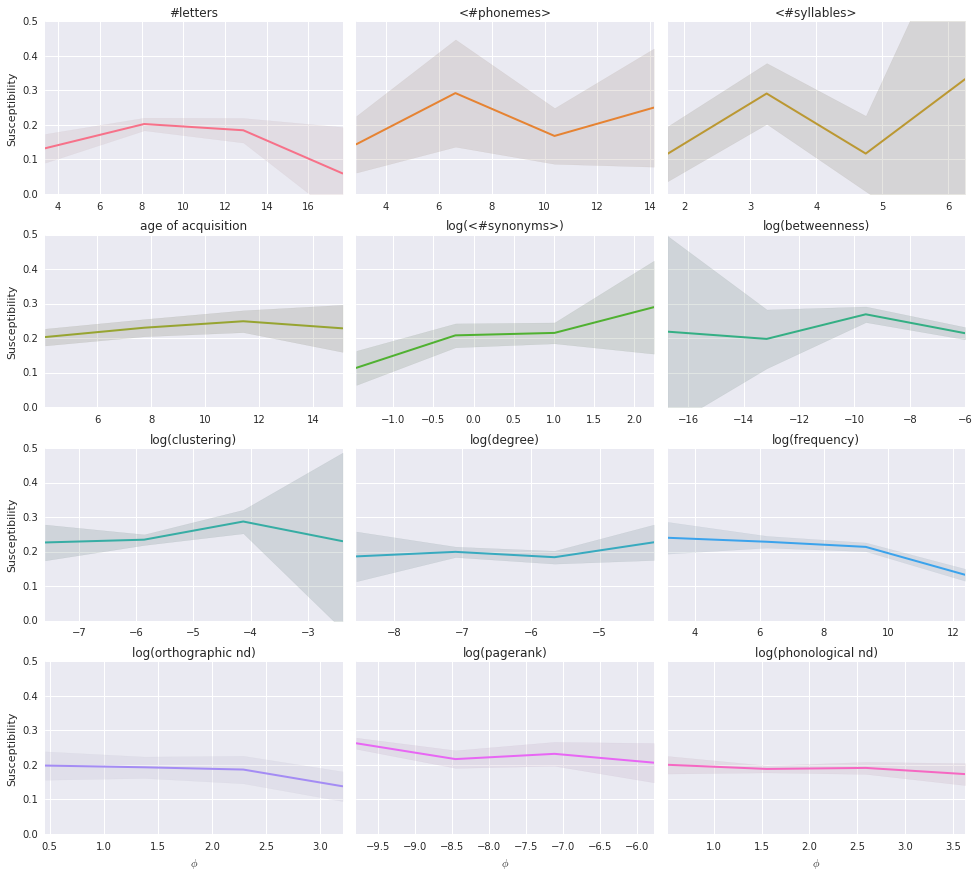

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

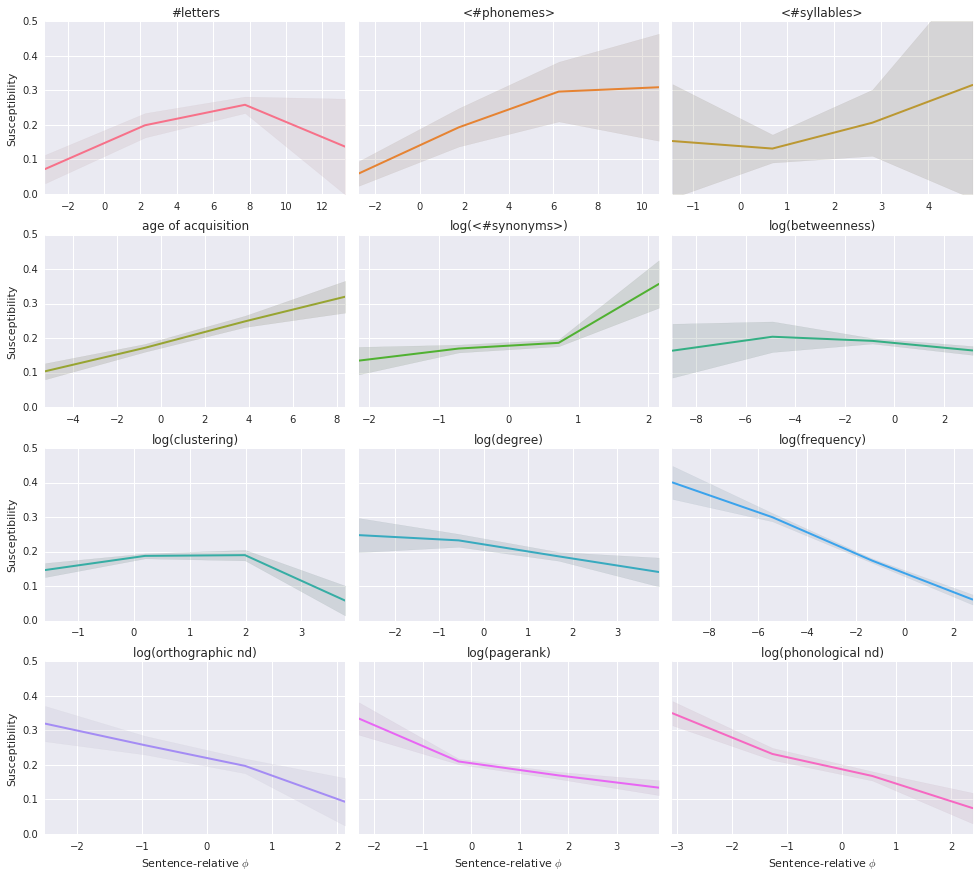

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

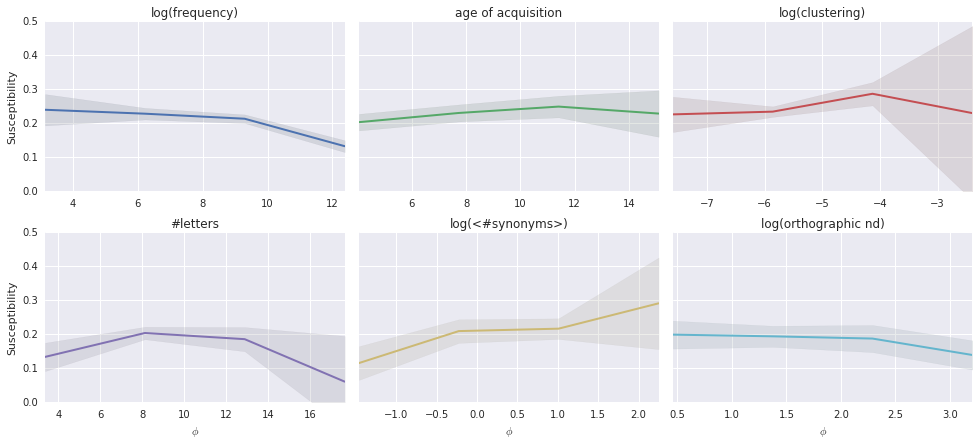

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

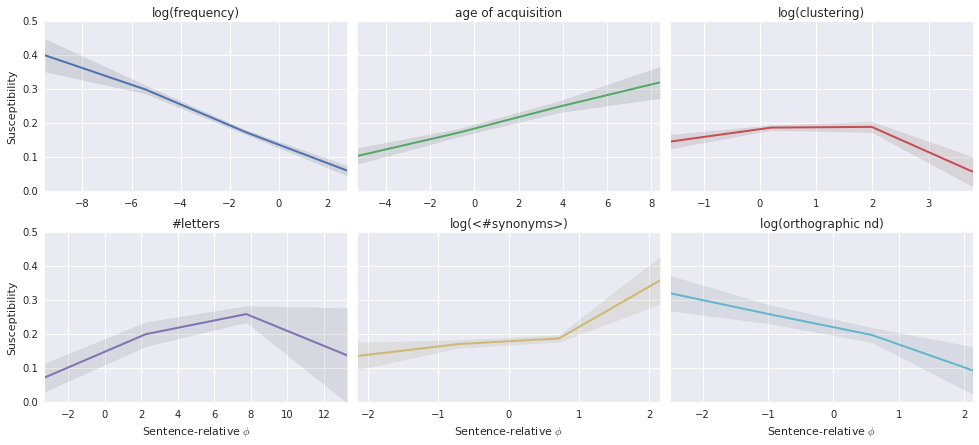

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'weight_appeared', 'word']]
# Only take first letter of POS code to denote categories,
# and group stopword-like categories together.
stop_poses = ['C', 'F', 'I', 'M', 'P', 'S', 'U']
poses['rPOS'] = poses['POS']\
    .apply(lambda x: x[0])\
    .apply(lambda x: 'Stopword-like' if x in stop_poses else x)

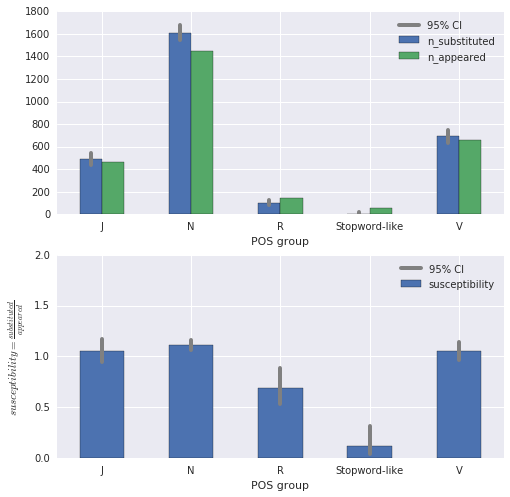

In [12]:
# Compute POS counts.
susty_pos = lambda x: ((x * poses.loc[x.index, 'weight']).sum() /
                       poses.loc[x.index, 'weight_appeared'].sum())
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty_pos,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight_appeared'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='goodman')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 2), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

**Are the appeared and substituted proportions statistically different?**

The only test we can easily do is a multinomial goodness-of-fit. This tells us if the `n_substituted` counts are significantly different from the reference `n_appeared` counts.

From there on we know a few things:
* Comparing a given POS's `n_substituted` count to its reference `n_appeared` count tells us if it's statistically different (< or >). We know this will be true individually for any POS that is out of its confidence region for the global goodness-of-fit test, since it's a weaker hypothesis (so the null rejection region will be wider, and the POS we're looking at is already in the rejection region for the global test). We don't know if it'll be true or not for POSes that are in their confidence region for the global test.
* Jointly comparing two POS's `n_substituted` counts to their reference `n_appeared` counts tells us if there is bias for one w.r.t. the other. This is also true for all pairs of POSes that are on alternate sides of their confidence region in the global test (for the same reasons as in the previous point). We don't know if it's true for the other POSes though.

In [13]:
# Test the n_substituted proportions are different from the n_appeared proportions
total_appeared = susties_pos.n_appeared.sum()
appeared_cis = multinomial_proportions_confint(susties_pos.n_appeared.round(), method='goodman')
differences = [(s < ci[0] * total_appeared) or (s > ci[1] * total_appeared)
               for s, ci in zip(susties_pos.n_substituted, appeared_cis)]
are_different = np.any(differences)
if are_different:
    print("Appeared and substituted proportions are different with p < .05")
    print("The following POS tags are out of their confidence region:",
          list(susties_pos.index[np.where(differences)[0]]))
else:
    print("Appeared and substituted proportions cannot be "
          "said different with p value better than .05")

Appeared and substituted proportions are different with p < .05
The following POS tags are out of their confidence region: ['N', 'R', 'Stopword-like']


## 4 Susceptibility in terms of absolute fractiles

In [14]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

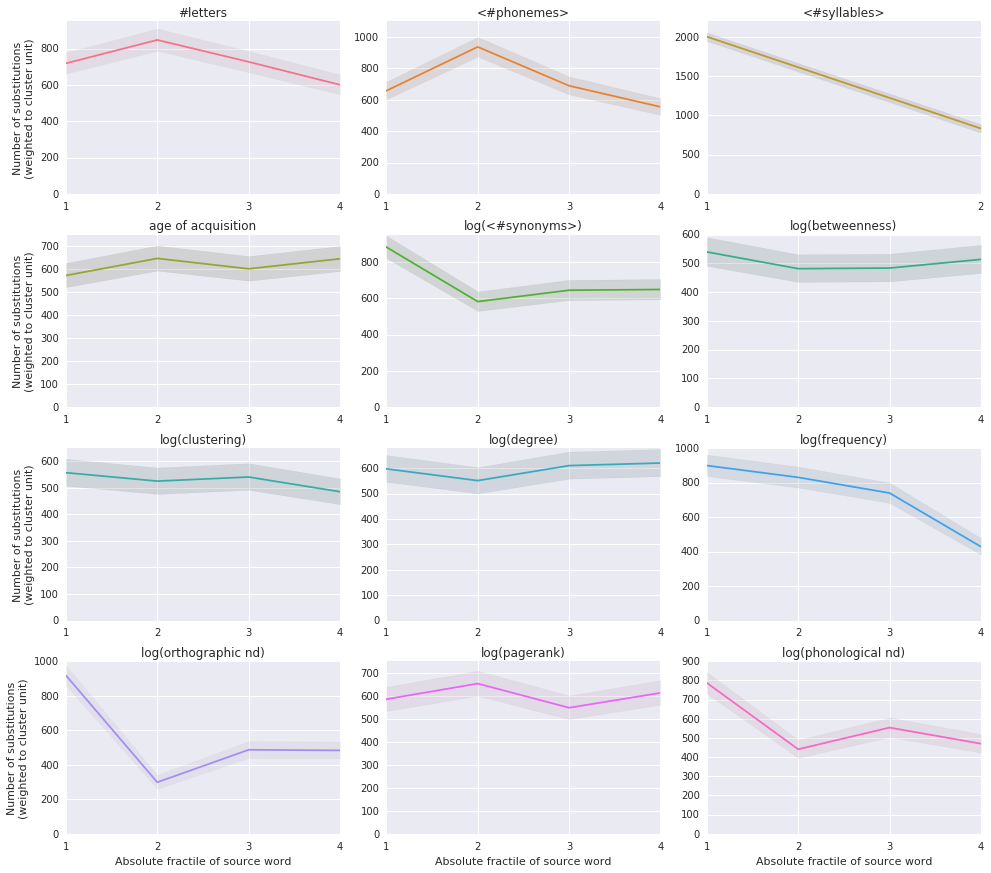

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

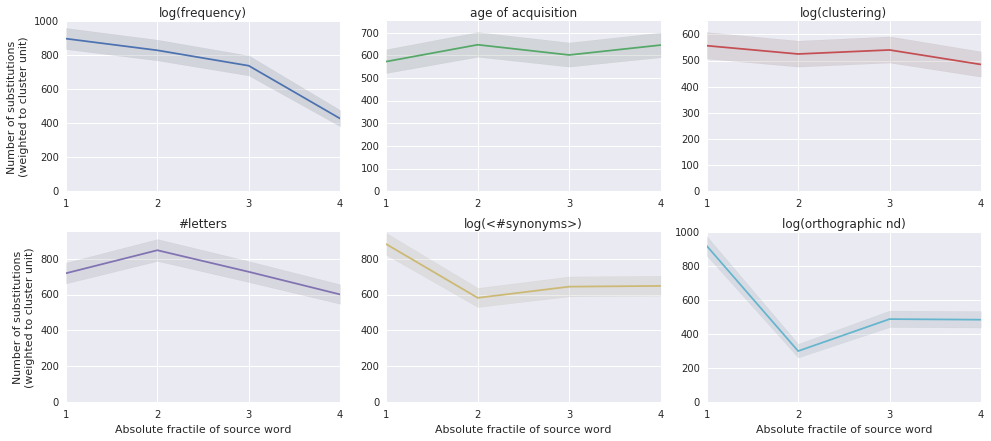

In [16]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [17]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  0% (     1 of 118071) |          | Elapsed Time: 0:00:01 ETA:  1 day, 17:19:55

  0% (     7 of 118071) |                  | Elapsed Time: 0:00:02 ETA:  5:56:02

  0% (    12 of 118071) |                  | Elapsed Time: 0:00:03 ETA:  6:19:33

  0% (    20 of 118071) |                  | Elapsed Time: 0:00:04 ETA:  5:29:47

  0% (    28 of 118071) |                  | Elapsed Time: 0:00:05 ETA:  5:12:16

  0% (    42 of 118071) |                  | Elapsed Time: 0:00:06 ETA:  4:14:28

  0% (    51 of 118071) |                  | Elapsed Time: 0:00:07 ETA:  4:12:55

  0% (    59 of 118071) |                  | Elapsed Time: 0:00:08 ETA:  4:16:22

  0% (    73 of 118071) |                  | Elapsed Time: 0:00:09 ETA:  3:54:31

  0% (    80 of 118071) |                  | Elapsed Time: 0:00:10 ETA:  4:01:35

  0% (   100 of 118071) |                  | Elapsed Time: 0:00:11 ETA:  3:23:47

  0% (   138 of 118071) |                  | Elapsed Time: 0:00:12 ETA:  2:29:50

  0% (   185 of 118071) |                  | Elapsed Time: 0:00:13 ETA:  1:53:41

  0% (   228 of 118071) |                  | Elapsed Time: 0:00:15 ETA:  1:32:59

  0% (   277 of 118071) |                  | Elapsed Time: 0:00:16 ETA:  1:18:59

  0% (   331 of 118071) |                  | Elapsed Time: 0:00:17 ETA:  1:05:24

  0% (   396 of 118071) |                  | Elapsed Time: 0:00:18 ETA:  0:53:34

  0% (   456 of 118071) |                  | Elapsed Time: 0:00:19 ETA:  0:46:58

  0% (   515 of 118071) |                  | Elapsed Time: 0:00:20 ETA:  0:40:50

  0% (   553 of 118071) |                  | Elapsed Time: 0:00:21 ETA:  0:39:23

  0% (   582 of 118071) |                  | Elapsed Time: 0:00:22 ETA:  0:40:15

  0% (   603 of 118071) |                  | Elapsed Time: 0:00:23 ETA:  0:42:57

  0% (   612 of 118071) |                  | Elapsed Time: 0:00:24 ETA:  0:47:14

  0% (   622 of 118071) |                  | Elapsed Time: 0:00:25 ETA:  0:52:41

  0% (   636 of 118071) |                  | Elapsed Time: 0:00:26 ETA:  1:00:24

  0% (   645 of 118071) |                  | Elapsed Time: 0:00:27 ETA:  1:15:13

  0% (   657 of 118071) |                  | Elapsed Time: 0:00:28 ETA:  1:33:33

  0% (   665 of 118071) |                  | Elapsed Time: 0:00:29 ETA:  2:05:31

  0% (   675 of 118071) |                  | Elapsed Time: 0:00:30 ETA:  2:33:46

  0% (   689 of 118071) |                  | Elapsed Time: 0:00:31 ETA:  2:55:22

  0% (   699 of 118071) |                  | Elapsed Time: 0:00:32 ETA:  3:14:41

  0% (   718 of 118071) |                  | Elapsed Time: 0:00:33 ETA:  2:54:41

  0% (   731 of 118071) |                  | Elapsed Time: 0:00:34 ETA:  2:50:30

  0% (   748 of 118071) |                  | Elapsed Time: 0:00:36 ETA:  2:47:36

  0% (   756 of 118071) |                  | Elapsed Time: 0:00:37 ETA:  2:47:49

  0% (   765 of 118071) |                  | Elapsed Time: 0:00:38 ETA:  2:51:59

  0% (   778 of 118071) |                  | Elapsed Time: 0:00:39 ETA:  2:47:17

  0% (   783 of 118071) |                  | Elapsed Time: 0:00:40 ETA:  3:02:49

  0% (   789 of 118071) |                  | Elapsed Time: 0:00:41 ETA:  3:19:36

  0% (   800 of 118071) |                  | Elapsed Time: 0:00:42 ETA:  3:17:34

  0% (   806 of 118071) |                  | Elapsed Time: 0:00:44 ETA:  3:50:10

  0% (   811 of 118071) |                  | Elapsed Time: 0:00:45 ETA:  4:13:26

  0% (   821 of 118071) |                  | Elapsed Time: 0:00:46 ETA:  4:32:07

  0% (   832 of 118071) |                  | Elapsed Time: 0:00:47 ETA:  4:19:18

  0% (   842 of 118071) |                  | Elapsed Time: 0:00:48 ETA:  4:17:59

  0% (   851 of 118071) |                  | Elapsed Time: 0:00:49 ETA:  4:28:33

  0% (   864 of 118071) |                  | Elapsed Time: 0:00:50 ETA:  3:52:05

  0% (   870 of 118071) |                  | Elapsed Time: 0:00:51 ETA:  3:50:27

  0% (   882 of 118071) |                  | Elapsed Time: 0:00:52 ETA:  3:48:15

  0% (   890 of 118071) |                  | Elapsed Time: 0:00:53 ETA:  3:39:25

  0% (   895 of 118071) |                  | Elapsed Time: 0:00:54 ETA:  3:41:34

  0% (   901 of 118071) |                  | Elapsed Time: 0:00:55 ETA:  3:53:25

  0% (   913 of 118071) |                  | Elapsed Time: 0:00:56 ETA:  3:51:21

  0% (   920 of 118071) |                  | Elapsed Time: 0:00:57 ETA:  3:59:49

  0% (   928 of 118071) |                  | Elapsed Time: 0:00:58 ETA:  4:02:36

  0% (   943 of 118071) |                  | Elapsed Time: 0:01:00 ETA:  3:59:47

  0% (   950 of 118071) |                  | Elapsed Time: 0:01:01 ETA:  3:55:53

  0% (   960 of 118071) |                  | Elapsed Time: 0:01:02 ETA:  4:01:14

  0% (   977 of 118071) |                  | Elapsed Time: 0:01:03 ETA:  3:36:51

  0% (   987 of 118071) |                  | Elapsed Time: 0:01:04 ETA:  3:22:48

  0% (  1003 of 118071) |                  | Elapsed Time: 0:01:05 ETA:  3:04:12

  0% (  1013 of 118071) |                  | Elapsed Time: 0:01:06 ETA:  3:07:54

  0% (  1025 of 118071) |                  | Elapsed Time: 0:01:07 ETA:  2:59:51

  0% (  1033 of 118071) |                  | Elapsed Time: 0:01:08 ETA:  2:59:47

  0% (  1043 of 118071) |                  | Elapsed Time: 0:01:09 ETA:  3:07:24

  0% (  1061 of 118071) |                  | Elapsed Time: 0:01:10 ETA:  2:48:24

  0% (  1070 of 118071) |                  | Elapsed Time: 0:01:11 ETA:  2:53:30

  0% (  1086 of 118071) |                  | Elapsed Time: 0:01:12 ETA:  2:54:15

  0% (  1094 of 118071) |                  | Elapsed Time: 0:01:14 ETA:  3:08:27

  0% (  1098 of 118071) |                  | Elapsed Time: 0:01:15 ETA:  3:31:05

  0% (  1105 of 118071) |                  | Elapsed Time: 0:01:16 ETA:  3:37:11

  0% (  1121 of 118071) |                  | Elapsed Time: 0:01:17 ETA:  3:28:22

  0% (  1130 of 118071) |                  | Elapsed Time: 0:01:18 ETA:  3:29:07

  0% (  1147 of 118071) |                  | Elapsed Time: 0:01:20 ETA:  3:15:29

  0% (  1156 of 118071) |                  | Elapsed Time: 0:01:21 ETA:  3:37:48

  0% (  1171 of 118071) |                  | Elapsed Time: 0:01:22 ETA:  3:21:59

  1% (  1182 of 118071) |                  | Elapsed Time: 0:01:23 ETA:  3:34:27

  1% (  1199 of 118071) |                  | Elapsed Time: 0:01:24 ETA:  3:04:54

  1% (  1215 of 118071) |                  | Elapsed Time: 0:01:25 ETA:  2:44:57

  1% (  1246 of 118071) |                  | Elapsed Time: 0:01:26 ETA:  2:16:47

  1% (  1282 of 118071) |                  | Elapsed Time: 0:01:27 ETA:  1:58:04

  1% (  1331 of 118071) |                  | Elapsed Time: 0:01:28 ETA:  1:32:38

  1% (  1382 of 118071) |                  | Elapsed Time: 0:01:29 ETA:  1:17:55

  1% (  1434 of 118071) |                  | Elapsed Time: 0:01:30 ETA:  1:04:30

  1% (  1476 of 118071) |                  | Elapsed Time: 0:01:31 ETA:  0:54:16

  1% (  1495 of 118071) |                  | Elapsed Time: 0:01:32 ETA:  0:54:47

  1% (  1499 of 118071) |                  | Elapsed Time: 0:01:34 ETA:  1:00:46

  1% (  1501 of 118071) |                  | Elapsed Time: 0:01:35 ETA:  1:11:09

  1% (  1502 of 118071) |                  | Elapsed Time: 0:01:36 ETA:  1:23:32

  1% (  1507 of 118071) |                  | Elapsed Time: 0:01:37 ETA:  1:44:45

  1% (  1512 of 118071) |                  | Elapsed Time: 0:01:39 ETA:  2:25:15

  1% (  1514 of 118071) |                  | Elapsed Time: 0:01:40 ETA:  4:04:59

  1% (  1516 of 118071) |                  | Elapsed Time: 0:01:42 ETA:  8:00:08

  1% (  1518 of 118071) |                  | Elapsed Time: 0:01:43 ETA:  9:18:10

  1% (  1520 of 118071) |                 | Elapsed Time: 0:01:44 ETA:  15:26:46

  1% (  1523 of 118071) |                 | Elapsed Time: 0:01:46 ETA:  16:16:42

  1% (  1525 of 118071) |                 | Elapsed Time: 0:01:47 ETA:  16:14:58

  1% (  1528 of 118071) |                 | Elapsed Time: 0:01:49 ETA:  15:42:04

  1% (  1530 of 118071) |                 | Elapsed Time: 0:01:50 ETA:  18:13:12

  1% (  1537 of 118071) |                 | Elapsed Time: 0:01:51 ETA:  16:33:44

  1% (  1541 of 118071) |                 | Elapsed Time: 0:01:52 ETA:  14:59:50

  1% (  1544 of 118071) |                 | Elapsed Time: 0:01:54 ETA:  14:08:28

  1% (  1546 of 118071) |                 | Elapsed Time: 0:01:55 ETA:  13:32:46

  1% (  1548 of 118071) |                 | Elapsed Time: 0:01:56 ETA:  13:35:29

  1% (  1549 of 118071) |                 | Elapsed Time: 0:01:57 ETA:  14:03:15

  1% (  1552 of 118071) |                 | Elapsed Time: 0:01:59 ETA:  13:47:06

  1% (  1554 of 118071) |                 | Elapsed Time: 0:02:00 ETA:  13:59:55

  1% (  1556 of 118071) |                 | Elapsed Time: 0:02:02 ETA:  14:11:32

  1% (  1558 of 118071) |                 | Elapsed Time: 0:02:03 ETA:  17:47:56

  1% (  1564 of 118071) |                 | Elapsed Time: 0:02:04 ETA:  16:09:15

  1% (  1571 of 118071) |                 | Elapsed Time: 0:02:06 ETA:  14:22:47

  1% (  1573 of 118071) |                 | Elapsed Time: 0:02:07 ETA:  14:57:22

  1% (  1575 of 118071) |                 | Elapsed Time: 0:02:09 ETA:  15:30:04

  1% (  1578 of 118071) |                 | Elapsed Time: 0:02:10 ETA:  14:40:00

  1% (  1580 of 118071) |                 | Elapsed Time: 0:02:11 ETA:  14:32:03

  1% (  1582 of 118071) |                 | Elapsed Time: 0:02:12 ETA:  14:19:02

  1% (  1584 of 118071) |                 | Elapsed Time: 0:02:14 ETA:  13:59:01

  1% (  1587 of 118071) |                 | Elapsed Time: 0:02:15 ETA:  13:35:52

  1% (  1597 of 118071) |                 | Elapsed Time: 0:02:16 ETA:  11:58:18

  1% (  1601 of 118071) |                 | Elapsed Time: 0:02:18 ETA:  13:13:07

  1% (  1604 of 118071) |                 | Elapsed Time: 0:02:19 ETA:  12:35:59

  1% (  1606 of 118071) |                 | Elapsed Time: 0:02:20 ETA:  12:16:24

  1% (  1608 of 118071) |                 | Elapsed Time: 0:02:22 ETA:  12:37:05

  1% (  1610 of 118071) |                 | Elapsed Time: 0:02:23 ETA:  12:55:55

  1% (  1613 of 118071) |                 | Elapsed Time: 0:02:24 ETA:  12:26:50

  1% (  1615 of 118071) |                 | Elapsed Time: 0:02:25 ETA:  12:30:02

  1% (  1625 of 118071) |                 | Elapsed Time: 0:02:27 ETA:  10:10:31

  1% (  1629 of 118071) |                 | Elapsed Time: 0:02:28 ETA:  12:15:34

  1% (  1632 of 118071) |                 | Elapsed Time: 0:02:30 ETA:  12:39:25

  1% (  1634 of 118071) |                 | Elapsed Time: 0:02:31 ETA:  12:52:04

  1% (  1637 of 118071) |                 | Elapsed Time: 0:02:32 ETA:  12:27:04

  1% (  1640 of 118071) |                 | Elapsed Time: 0:02:33 ETA:  11:55:40

  1% (  1642 of 118071) |                 | Elapsed Time: 0:02:34 ETA:  11:37:29

  1% (  1645 of 118071) |                 | Elapsed Time: 0:02:35 ETA:  11:32:13

  1% (  1653 of 118071) |                  | Elapsed Time: 0:02:37 ETA:  9:36:06

  1% (  1657 of 118071) |                 | Elapsed Time: 0:02:38 ETA:  11:24:15

  1% (  1660 of 118071) |                 | Elapsed Time: 0:02:40 ETA:  12:27:09

  1% (  1662 of 118071) |                 | Elapsed Time: 0:02:41 ETA:  11:58:37

  1% (  1665 of 118071) |                 | Elapsed Time: 0:02:42 ETA:  11:46:01

  1% (  1667 of 118071) |                 | Elapsed Time: 0:02:43 ETA:  12:05:23

  1% (  1669 of 118071) |                 | Elapsed Time: 0:02:44 ETA:  12:37:09

  1% (  1672 of 118071) |                 | Elapsed Time: 0:02:46 ETA:  12:19:25

  1% (  1680 of 118071) |                 | Elapsed Time: 0:02:47 ETA:  10:29:50

  1% (  1685 of 118071) |                 | Elapsed Time: 0:02:48 ETA:  11:21:27

  1% (  1688 of 118071) |                 | Elapsed Time: 0:02:49 ETA:  12:10:23

  1% (  1691 of 118071) |                 | Elapsed Time: 0:02:51 ETA:  11:35:04

  1% (  1693 of 118071) |                 | Elapsed Time: 0:02:52 ETA:  11:47:24

  1% (  1696 of 118071) |                 | Elapsed Time: 0:02:53 ETA:  11:35:24

  1% (  1699 of 118071) |                 | Elapsed Time: 0:02:54 ETA:  11:29:33

  1% (  1704 of 118071) |                 | Elapsed Time: 0:02:55 ETA:  10:15:27

  1% (  1712 of 118071) |                  | Elapsed Time: 0:02:57 ETA:  9:21:03

  1% (  1715 of 118071) |                 | Elapsed Time: 0:02:58 ETA:  10:46:13

  1% (  1717 of 118071) |                 | Elapsed Time: 0:02:59 ETA:  11:50:20

  1% (  1721 of 118071) |                 | Elapsed Time: 0:03:01 ETA:  11:05:33

  1% (  1724 of 118071) |                 | Elapsed Time: 0:03:02 ETA:  11:13:20

  1% (  1726 of 118071) |                 | Elapsed Time: 0:03:03 ETA:  11:12:07

  1% (  1729 of 118071) |                 | Elapsed Time: 0:03:04 ETA:  11:13:58

  1% (  1739 of 118071) |                  | Elapsed Time: 0:03:06 ETA:  9:02:00

  1% (  1743 of 118071) |                  | Elapsed Time: 0:03:07 ETA:  9:20:32

  1% (  1746 of 118071) |                 | Elapsed Time: 0:03:08 ETA:  10:30:23

  1% (  1750 of 118071) |                 | Elapsed Time: 0:03:10 ETA:  10:46:03

  1% (  1754 of 118071) |                 | Elapsed Time: 0:03:11 ETA:  10:21:50

  1% (  1757 of 118071) |                 | Elapsed Time: 0:03:12 ETA:  10:44:16

  1% (  1768 of 118071) |                  | Elapsed Time: 0:03:14 ETA:  8:33:12

  1% (  1771 of 118071) |                  | Elapsed Time: 0:03:15 ETA:  8:20:37

  1% (  1774 of 118071) |                  | Elapsed Time: 0:03:16 ETA:  8:20:20

  1% (  1777 of 118071) |                  | Elapsed Time: 0:03:17 ETA:  9:54:30

  1% (  1780 of 118071) |                 | Elapsed Time: 0:03:18 ETA:  10:18:51

  1% (  1783 of 118071) |                 | Elapsed Time: 0:03:20 ETA:  10:07:31

  1% (  1787 of 118071) |                  | Elapsed Time: 0:03:21 ETA:  9:33:32

  1% (  1797 of 118071) |                  | Elapsed Time: 0:03:22 ETA:  8:04:03

  1% (  1800 of 118071) |                  | Elapsed Time: 0:03:23 ETA:  7:57:14

  1% (  1803 of 118071) |                  | Elapsed Time: 0:03:24 ETA:  9:41:21

  1% (  1806 of 118071) |                  | Elapsed Time: 0:03:25 ETA:  9:38:37

  1% (  1809 of 118071) |                  | Elapsed Time: 0:03:26 ETA:  9:34:21

  1% (  1812 of 118071) |                  | Elapsed Time: 0:03:27 ETA:  9:31:06

  1% (  1816 of 118071) |                  | Elapsed Time: 0:03:28 ETA:  9:05:03

  1% (  1826 of 118071) |                  | Elapsed Time: 0:03:30 ETA:  7:53:44

  1% (  1830 of 118071) |                  | Elapsed Time: 0:03:31 ETA:  7:55:20

  1% (  1833 of 118071) |                  | Elapsed Time: 0:03:32 ETA:  9:44:59

  1% (  1837 of 118071) |                  | Elapsed Time: 0:03:34 ETA:  9:28:09

  1% (  1840 of 118071) |                  | Elapsed Time: 0:03:35 ETA:  9:47:59

  1% (  1845 of 118071) |                  | Elapsed Time: 0:03:36 ETA:  9:12:21

  1% (  1852 of 118071) |                  | Elapsed Time: 0:03:37 ETA:  8:19:59

  1% (  1856 of 118071) |                  | Elapsed Time: 0:03:38 ETA:  8:05:09

  1% (  1859 of 118071) |                  | Elapsed Time: 0:03:39 ETA:  8:17:41

  1% (  1863 of 118071) |                  | Elapsed Time: 0:03:41 ETA:  9:19:15

  1% (  1866 of 118071) |                  | Elapsed Time: 0:03:42 ETA:  9:33:56

  1% (  1869 of 118071) |                  | Elapsed Time: 0:03:43 ETA:  9:17:24

  1% (  1875 of 118071) |                  | Elapsed Time: 0:03:44 ETA:  8:42:40

  1% (  1883 of 118071) |                  | Elapsed Time: 0:03:45 ETA:  7:27:47

  1% (  1887 of 118071) |                  | Elapsed Time: 0:03:46 ETA:  7:42:40

  1% (  1892 of 118071) |                  | Elapsed Time: 0:03:48 ETA:  8:29:40

  1% (  1896 of 118071) |                  | Elapsed Time: 0:03:49 ETA:  8:38:25

  1% (  1899 of 118071) |                  | Elapsed Time: 0:03:50 ETA:  8:35:57

  1% (  1910 of 118071) |                  | Elapsed Time: 0:03:51 ETA:  7:11:36

  1% (  1914 of 118071) |                  | Elapsed Time: 0:03:52 ETA:  7:00:35

  1% (  1918 of 118071) |                  | Elapsed Time: 0:03:53 ETA:  7:00:59

  1% (  1922 of 118071) |                  | Elapsed Time: 0:03:54 ETA:  7:14:12

  1% (  1925 of 118071) |                  | Elapsed Time: 0:03:55 ETA:  8:05:37

  1% (  1931 of 118071) |                  | Elapsed Time: 0:03:56 ETA:  7:38:57

  1% (  1942 of 118071) |                  | Elapsed Time: 0:03:58 ETA:  6:27:17

  1% (  1947 of 118071) |                  | Elapsed Time: 0:03:59 ETA:  6:25:20

  1% (  1952 of 118071) |                  | Elapsed Time: 0:04:00 ETA:  6:20:43

  1% (  1956 of 118071) |                  | Elapsed Time: 0:04:01 ETA:  7:18:26

  1% (  1967 of 118071) |                  | Elapsed Time: 0:04:02 ETA:  6:19:53

  1% (  1973 of 118071) |                  | Elapsed Time: 0:04:04 ETA:  6:01:46

  1% (  1977 of 118071) |                  | Elapsed Time: 0:04:05 ETA:  6:07:30

  1% (  1981 of 118071) |                  | Elapsed Time: 0:04:06 ETA:  6:11:59

  1% (  1985 of 118071) |                  | Elapsed Time: 0:04:07 ETA:  6:36:08

  1% (  1996 of 118071) |                  | Elapsed Time: 0:04:08 ETA:  6:32:31

  1% (  2001 of 118071) |                  | Elapsed Time: 0:04:09 ETA:  6:20:08

  1% (  2005 of 118071) |                  | Elapsed Time: 0:04:11 ETA:  6:19:55

  1% (  2010 of 118071) |                  | Elapsed Time: 0:04:12 ETA:  6:21:08

  1% (  2014 of 118071) |                  | Elapsed Time: 0:04:13 ETA:  7:24:12

  1% (  2025 of 118071) |                  | Elapsed Time: 0:04:14 ETA:  6:38:34

  1% (  2030 of 118071) |                  | Elapsed Time: 0:04:15 ETA:  6:26:09

  1% (  2034 of 118071) |                  | Elapsed Time: 0:04:16 ETA:  6:13:52

  1% (  2039 of 118071) |                  | Elapsed Time: 0:04:17 ETA:  6:01:53

  1% (  2045 of 118071) |                  | Elapsed Time: 0:04:18 ETA:  6:40:02

  1% (  2061 of 118071) |                  | Elapsed Time: 0:04:20 ETA:  5:25:09

  1% (  2072 of 118071) |                  | Elapsed Time: 0:04:21 ETA:  4:48:54

  1% (  2090 of 118071) |                  | Elapsed Time: 0:04:22 ETA:  3:57:40

  1% (  2097 of 118071) |                  | Elapsed Time: 0:04:23 ETA:  3:47:37

  1% (  2101 of 118071) |                  | Elapsed Time: 0:04:24 ETA:  4:10:45

  1% (  2114 of 118071) |                  | Elapsed Time: 0:04:25 ETA:  3:45:56

  1% (  2122 of 118071) |                  | Elapsed Time: 0:04:26 ETA:  3:36:35

  1% (  2128 of 118071) |                  | Elapsed Time: 0:04:27 ETA:  3:33:49

  1% (  2143 of 118071) |                  | Elapsed Time: 0:04:29 ETA:  3:17:29

  1% (  2150 of 118071) |                  | Elapsed Time: 0:04:30 ETA:  3:41:01

  1% (  2156 of 118071) |                  | Elapsed Time: 0:04:31 ETA:  3:53:09

  1% (  2169 of 118071) |                  | Elapsed Time: 0:04:32 ETA:  4:05:07

  1% (  2180 of 118071) |                  | Elapsed Time: 0:04:33 ETA:  3:53:42

  1% (  2187 of 118071) |                  | Elapsed Time: 0:04:34 ETA:  3:43:05

  1% (  2203 of 118071) |                  | Elapsed Time: 0:04:35 ETA:  3:35:26

  1% (  2213 of 118071) |                  | Elapsed Time: 0:04:36 ETA:  3:30:43

  1% (  2232 of 118071) |                  | Elapsed Time: 0:04:37 ETA:  3:01:30

  1% (  2240 of 118071) |                  | Elapsed Time: 0:04:38 ETA:  3:13:31

  1% (  2251 of 118071) |                  | Elapsed Time: 0:04:39 ETA:  3:03:45

  1% (  2265 of 118071) |                  | Elapsed Time: 0:04:40 ETA:  2:49:46

  1% (  2280 of 118071) |                  | Elapsed Time: 0:04:41 ETA:  2:46:39

  1% (  2298 of 118071) |                  | Elapsed Time: 0:04:43 ETA:  2:35:41

  1% (  2315 of 118071) |                  | Elapsed Time: 0:04:44 ETA:  2:22:36

  1% (  2333 of 118071) |                  | Elapsed Time: 0:04:45 ETA:  2:20:38

  1% (  2357 of 118071) |                  | Elapsed Time: 0:04:46 ETA:  2:04:59

  2% (  2385 of 118071) |                  | Elapsed Time: 0:04:47 ETA:  1:57:24

  2% (  2399 of 118071) |                  | Elapsed Time: 0:04:48 ETA:  1:51:15

  2% (  2410 of 118071) |                  | Elapsed Time: 0:04:49 ETA:  1:51:49

  2% (  2429 of 118071) |                  | Elapsed Time: 0:04:50 ETA:  1:48:10

  2% (  2441 of 118071) |                  | Elapsed Time: 0:04:51 ETA:  1:50:37

  2% (  2452 of 118071) |                  | Elapsed Time: 0:04:52 ETA:  1:55:04

  2% (  2460 of 118071) |                  | Elapsed Time: 0:04:53 ETA:  2:03:09

  2% (  2463 of 118071) |                  | Elapsed Time: 0:04:54 ETA:  2:19:48

  2% (  2466 of 118071) |                  | Elapsed Time: 0:04:55 ETA:  2:47:37

  2% (  2470 of 118071) |                  | Elapsed Time: 0:04:57 ETA:  3:49:23

  2% (  2473 of 118071) |                  | Elapsed Time: 0:04:58 ETA:  4:23:17

  2% (  2483 of 118071) |                  | Elapsed Time: 0:04:59 ETA:  4:25:04

  2% (  2491 of 118071) |                  | Elapsed Time: 0:05:00 ETA:  5:13:03

  2% (  2496 of 118071) |                  | Elapsed Time: 0:05:01 ETA:  5:55:01

  2% (  2501 of 118071) |                  | Elapsed Time: 0:05:02 ETA:  6:42:05

  2% (  2511 of 118071) |                  | Elapsed Time: 0:05:03 ETA:  6:23:36

  2% (  2521 of 118071) |                  | Elapsed Time: 0:05:04 ETA:  5:35:58

  2% (  2528 of 118071) |                  | Elapsed Time: 0:05:05 ETA:  5:14:57

  2% (  2533 of 118071) |                  | Elapsed Time: 0:05:06 ETA:  4:52:07

  2% (  2547 of 118071) |                  | Elapsed Time: 0:05:08 ETA:  4:19:11

  2% (  2552 of 118071) |                  | Elapsed Time: 0:05:09 ETA:  4:46:18

  2% (  2557 of 118071) |                  | Elapsed Time: 0:05:10 ETA:  4:59:57

  2% (  2562 of 118071) |                  | Elapsed Time: 0:05:11 ETA:  4:59:27

  2% (  2576 of 118071) |                  | Elapsed Time: 0:05:12 ETA:  4:22:25

  2% (  2583 of 118071) |                  | Elapsed Time: 0:05:13 ETA:  4:33:40

  2% (  2592 of 118071) |                  | Elapsed Time: 0:05:14 ETA:  4:34:27

  2% (  2607 of 118071) |                  | Elapsed Time: 0:05:16 ETA:  4:11:09

  2% (  2614 of 118071) |                  | Elapsed Time: 0:05:17 ETA:  4:09:21

  2% (  2619 of 118071) |                  | Elapsed Time: 0:05:18 ETA:  4:30:15

  2% (  2633 of 118071) |                  | Elapsed Time: 0:05:19 ETA:  3:54:25

  2% (  2660 of 118071) |                  | Elapsed Time: 0:05:20 ETA:  3:03:08

  2% (  2688 of 118071) |                  | Elapsed Time: 0:05:21 ETA:  2:28:14

  2% (  2720 of 118071) |                  | Elapsed Time: 0:05:22 ETA:  2:07:55

  2% (  2766 of 118071) |                  | Elapsed Time: 0:05:23 ETA:  1:39:01

  2% (  2808 of 118071) |                  | Elapsed Time: 0:05:24 ETA:  1:22:53

  2% (  2858 of 118071) |                  | Elapsed Time: 0:05:25 ETA:  1:08:58

  2% (  2875 of 118071) |                  | Elapsed Time: 0:05:26 ETA:  1:04:29

  2% (  2889 of 118071) |                  | Elapsed Time: 0:05:27 ETA:  1:02:01

  2% (  2913 of 118071) |                  | Elapsed Time: 0:05:28 ETA:  0:58:56

  2% (  2952 of 118071) |                  | Elapsed Time: 0:05:29 ETA:  0:55:50

  2% (  2995 of 118071) |                  | Elapsed Time: 0:05:30 ETA:  0:52:45

  2% (  3061 of 118071) |                  | Elapsed Time: 0:05:31 ETA:  0:47:01

  2% (  3129 of 118071) |                  | Elapsed Time: 0:05:32 ETA:  0:43:50

  2% (  3195 of 118071) |                  | Elapsed Time: 0:05:33 ETA:  0:40:43

  2% (  3271 of 118071) |                  | Elapsed Time: 0:05:34 ETA:  0:37:35

  2% (  3359 of 118071) |                  | Elapsed Time: 0:05:35 ETA:  0:31:12

  2% (  3426 of 118071) |                  | Elapsed Time: 0:05:36 ETA:  0:27:39

  2% (  3479 of 118071) |                  | Elapsed Time: 0:05:37 ETA:  0:25:55

  2% (  3535 of 118071) |                  | Elapsed Time: 0:05:38 ETA:  0:25:05

  3% (  3569 of 118071) |                  | Elapsed Time: 0:05:39 ETA:  0:25:32

  3% (  3605 of 118071) |                  | Elapsed Time: 0:05:40 ETA:  0:27:11

  3% (  3649 of 118071) |                  | Elapsed Time: 0:05:41 ETA:  0:28:41

  3% (  3715 of 118071) |                  | Elapsed Time: 0:05:42 ETA:  0:28:48

  3% (  3771 of 118071) |                  | Elapsed Time: 0:05:43 ETA:  0:30:10

  3% (  3825 of 118071) |                  | Elapsed Time: 0:05:44 ETA:  0:32:48

  3% (  3878 of 118071) |                  | Elapsed Time: 0:05:45 ETA:  0:33:54

  3% (  3935 of 118071) |                  | Elapsed Time: 0:05:46 ETA:  0:33:44

  3% (  3983 of 118071) |                  | Elapsed Time: 0:05:47 ETA:  0:34:23

  3% (  4026 of 118071) |                  | Elapsed Time: 0:05:48 ETA:  0:33:30

  3% (  4076 of 118071) |                  | Elapsed Time: 0:05:49 ETA:  0:32:19

  3% (  4137 of 118071) |                  | Elapsed Time: 0:05:50 ETA:  0:31:02

  3% (  4205 of 118071) |                  | Elapsed Time: 0:05:51 ETA:  0:30:45

  3% (  4260 of 118071) |                  | Elapsed Time: 0:05:52 ETA:  0:30:50

  3% (  4319 of 118071) |                  | Elapsed Time: 0:05:53 ETA:  0:30:27

  3% (  4370 of 118071) |                  | Elapsed Time: 0:05:54 ETA:  0:30:32

  3% (  4428 of 118071) |                  | Elapsed Time: 0:05:56 ETA:  0:30:17

  3% (  4475 of 118071) |                  | Elapsed Time: 0:05:57 ETA:  0:29:56

  3% (  4536 of 118071) |                  | Elapsed Time: 0:05:58 ETA:  0:29:05

  3% (  4602 of 118071) |                  | Elapsed Time: 0:05:59 ETA:  0:28:38

  3% (  4689 of 118071) |                  | Elapsed Time: 0:06:00 ETA:  0:27:15

  4% (  4769 of 118071) |                  | Elapsed Time: 0:06:01 ETA:  0:25:35

  4% (  4857 of 118071) |                  | Elapsed Time: 0:06:02 ETA:  0:23:49

  4% (  4928 of 118071) |                  | Elapsed Time: 0:06:03 ETA:  0:22:44

  4% (  5003 of 118071) |                  | Elapsed Time: 0:06:04 ETA:  0:21:30

  4% (  5070 of 118071) |                  | Elapsed Time: 0:06:05 ETA:  0:21:39

  4% (  5163 of 118071) |                  | Elapsed Time: 0:06:06 ETA:  0:19:47

  4% (  5257 of 118071) |                  | Elapsed Time: 0:06:07 ETA:  0:18:35

  4% (  5351 of 118071) |                  | Elapsed Time: 0:06:08 ETA:  0:17:39

  4% (  5435 of 118071) |                  | Elapsed Time: 0:06:09 ETA:  0:17:43

  4% (  5526 of 118071) |                  | Elapsed Time: 0:06:10 ETA:  0:17:22

  4% (  5619 of 118071) |                  | Elapsed Time: 0:06:11 ETA:  0:17:13

  4% (  5706 of 118071) |                  | Elapsed Time: 0:06:12 ETA:  0:16:43

  4% (  5800 of 118071) |                  | Elapsed Time: 0:06:13 ETA:  0:16:08

  5% (  5904 of 118071) |                  | Elapsed Time: 0:06:14 ETA:  0:15:39

  5% (  5992 of 118071) |                  | Elapsed Time: 0:06:15 ETA:  0:15:50

  5% (  6080 of 118071) |                  | Elapsed Time: 0:06:16 ETA:  0:16:02

  5% (  6152 of 118071) |                  | Elapsed Time: 0:06:17 ETA:  0:16:23

  5% (  6222 of 118071) |                  | Elapsed Time: 0:06:18 ETA:  0:17:02

  5% (  6291 of 118071) |                  | Elapsed Time: 0:06:19 ETA:  0:17:50

  5% (  6362 of 118071) |                  | Elapsed Time: 0:06:20 ETA:  0:18:24

  5% (  6435 of 118071) |                  | Elapsed Time: 0:06:21 ETA:  0:19:13

  5% (  6505 of 118071) |                  | Elapsed Time: 0:06:22 ETA:  0:19:56

  5% (  6574 of 118071) |#                 | Elapsed Time: 0:06:23 ETA:  0:20:15

  5% (  6645 of 118071) |#                 | Elapsed Time: 0:06:24 ETA:  0:20:52

  5% (  6718 of 118071) |#                 | Elapsed Time: 0:06:25 ETA:  0:21:27

  5% (  6788 of 118071) |#                 | Elapsed Time: 0:06:26 ETA:  0:21:34

  5% (  6859 of 118071) |#                 | Elapsed Time: 0:06:27 ETA:  0:21:31

  5% (  6927 of 118071) |#                 | Elapsed Time: 0:06:28 ETA:  0:21:33

  5% (  7007 of 118071) |#                 | Elapsed Time: 0:06:29 ETA:  0:21:08

  6% (  7092 of 118071) |#                 | Elapsed Time: 0:06:30 ETA:  0:20:35

  6% (  7182 of 118071) |#                 | Elapsed Time: 0:06:31 ETA:  0:19:46

  6% (  7270 of 118071) |#                 | Elapsed Time: 0:06:32 ETA:  0:19:01

  6% (  7337 of 118071) |#                 | Elapsed Time: 0:06:33 ETA:  0:19:09

  6% (  7380 of 118071) |#                 | Elapsed Time: 0:06:34 ETA:  0:19:10

  6% (  7448 of 118071) |#                 | Elapsed Time: 0:06:35 ETA:  0:19:12

  6% (  7516 of 118071) |#                 | Elapsed Time: 0:06:36 ETA:  0:19:17

  6% (  7589 of 118071) |#                 | Elapsed Time: 0:06:37 ETA:  0:19:05

  6% (  7660 of 118071) |#                 | Elapsed Time: 0:06:38 ETA:  0:19:25

  6% (  7730 of 118071) |#                 | Elapsed Time: 0:06:39 ETA:  0:20:02

  6% (  7820 of 118071) |#                 | Elapsed Time: 0:06:40 ETA:  0:20:00

  6% (  7899 of 118071) |#                 | Elapsed Time: 0:06:41 ETA:  0:20:24

  6% (  7972 of 118071) |#                 | Elapsed Time: 0:06:42 ETA:  0:20:09

  6% (  8046 of 118071) |#                 | Elapsed Time: 0:06:43 ETA:  0:20:01

  6% (  8118 of 118071) |#                 | Elapsed Time: 0:06:44 ETA:  0:19:51

  6% (  8193 of 118071) |#                 | Elapsed Time: 0:06:45 ETA:  0:19:34

  7% (  8270 of 118071) |#                 | Elapsed Time: 0:06:46 ETA:  0:19:24

  7% (  8347 of 118071) |#                 | Elapsed Time: 0:06:47 ETA:  0:19:11

  7% (  8423 of 118071) |#                 | Elapsed Time: 0:06:48 ETA:  0:18:57

  7% (  8502 of 118071) |#                 | Elapsed Time: 0:06:49 ETA:  0:19:23

  7% (  8571 of 118071) |#                 | Elapsed Time: 0:06:50 ETA:  0:19:43

  7% (  8650 of 118071) |#                 | Elapsed Time: 0:06:51 ETA:  0:19:29

  7% (  8728 of 118071) |#                 | Elapsed Time: 0:06:52 ETA:  0:19:18

  7% (  8806 of 118071) |#                 | Elapsed Time: 0:06:53 ETA:  0:19:03

  7% (  8856 of 118071) |#                 | Elapsed Time: 0:06:53 ETA:  0:18:54

  7% (  8927 of 118071) |#                 | Elapsed Time: 0:06:54 ETA:  0:19:07

  7% (  8997 of 118071) |#                 | Elapsed Time: 0:06:55 ETA:  0:19:22

  7% (  9073 of 118071) |#                 | Elapsed Time: 0:06:56 ETA:  0:19:22

  7% (  9148 of 118071) |#                 | Elapsed Time: 0:06:57 ETA:  0:19:30

  7% (  9224 of 118071) |#                 | Elapsed Time: 0:06:58 ETA:  0:19:14

  7% (  9304 of 118071) |#                 | Elapsed Time: 0:06:59 ETA:  0:19:09

  7% (  9379 of 118071) |#                 | Elapsed Time: 0:07:00 ETA:  0:19:16

  8% (  9459 of 118071) |#                 | Elapsed Time: 0:07:01 ETA:  0:19:14

  8% (  9537 of 118071) |#                 | Elapsed Time: 0:07:02 ETA:  0:19:14

  8% (  9618 of 118071) |#                 | Elapsed Time: 0:07:03 ETA:  0:18:49

  8% (  9698 of 118071) |#                 | Elapsed Time: 0:07:04 ETA:  0:18:25

  8% (  9774 of 118071) |#                 | Elapsed Time: 0:07:05 ETA:  0:18:23

  8% (  9847 of 118071) |#                 | Elapsed Time: 0:07:06 ETA:  0:18:26

  8% (  9931 of 118071) |#                 | Elapsed Time: 0:07:07 ETA:  0:18:08

  8% ( 10017 of 118071) |#                 | Elapsed Time: 0:07:08 ETA:  0:17:53

  8% ( 10093 of 118071) |#                 | Elapsed Time: 0:07:09 ETA:  0:17:50

  8% ( 10174 of 118071) |#                 | Elapsed Time: 0:07:10 ETA:  0:17:43

  8% ( 10283 of 118071) |#                 | Elapsed Time: 0:07:11 ETA:  0:16:39

  8% ( 10332 of 118071) |#                 | Elapsed Time: 0:07:12 ETA:  0:16:23

  8% ( 10418 of 118071) |#                 | Elapsed Time: 0:07:13 ETA:  0:16:10

  8% ( 10529 of 118071) |#                 | Elapsed Time: 0:07:14 ETA:  0:15:03

  8% ( 10606 of 118071) |#                 | Elapsed Time: 0:07:15 ETA:  0:14:56

  9% ( 10683 of 118071) |#                 | Elapsed Time: 0:07:16 ETA:  0:15:07

  9% ( 10760 of 118071) |#                 | Elapsed Time: 0:07:17 ETA:  0:15:24

  9% ( 10835 of 118071) |#                 | Elapsed Time: 0:07:18 ETA:  0:15:24

  9% ( 10912 of 118071) |#                 | Elapsed Time: 0:07:19 ETA:  0:15:31

  9% ( 10995 of 118071) |#                 | Elapsed Time: 0:07:20 ETA:  0:16:20

  9% ( 11078 of 118071) |#                 | Elapsed Time: 0:07:21 ETA:  0:16:32

  9% ( 11157 of 118071) |#                 | Elapsed Time: 0:07:22 ETA:  0:16:45

  9% ( 11241 of 118071) |#                 | Elapsed Time: 0:07:23 ETA:  0:17:39

  9% ( 11326 of 118071) |#                 | Elapsed Time: 0:07:24 ETA:  0:17:22

  9% ( 11422 of 118071) |#                 | Elapsed Time: 0:07:25 ETA:  0:16:42

  9% ( 11499 of 118071) |#                 | Elapsed Time: 0:07:26 ETA:  0:16:40

  9% ( 11568 of 118071) |#                 | Elapsed Time: 0:07:27 ETA:  0:16:51

  9% ( 11645 of 118071) |#                 | Elapsed Time: 0:07:28 ETA:  0:16:49

  9% ( 11727 of 118071) |#                 | Elapsed Time: 0:07:29 ETA:  0:16:51

 10% ( 11808 of 118071) |#                 | Elapsed Time: 0:07:30 ETA:  0:16:14

 10% ( 11902 of 118071) |#                 | Elapsed Time: 0:07:31 ETA:  0:15:46

 10% ( 11976 of 118071) |#                 | Elapsed Time: 0:07:32 ETA:  0:16:05

 10% ( 12061 of 118071) |#                 | Elapsed Time: 0:07:33 ETA:  0:16:02

 10% ( 12134 of 118071) |#                 | Elapsed Time: 0:07:34 ETA:  0:16:46

 10% ( 12213 of 118071) |#                 | Elapsed Time: 0:07:35 ETA:  0:16:42

 10% ( 12295 of 118071) |#                 | Elapsed Time: 0:07:36 ETA:  0:16:16

 10% ( 12372 of 118071) |#                 | Elapsed Time: 0:07:37 ETA:  0:16:15

 10% ( 12453 of 118071) |#                 | Elapsed Time: 0:07:38 ETA:  0:16:15

 10% ( 12530 of 118071) |#                 | Elapsed Time: 0:07:39 ETA:  0:17:01

 10% ( 12609 of 118071) |#                 | Elapsed Time: 0:07:40 ETA:  0:17:29

 10% ( 12696 of 118071) |#                 | Elapsed Time: 0:07:41 ETA:  0:17:01

 10% ( 12774 of 118071) |#                 | Elapsed Time: 0:07:42 ETA:  0:17:15

 10% ( 12896 of 118071) |#                 | Elapsed Time: 0:07:43 ETA:  0:15:39

 11% ( 13005 of 118071) |#                 | Elapsed Time: 0:07:44 ETA:  0:14:45

 11% ( 13105 of 118071) |#                 | Elapsed Time: 0:07:45 ETA:  0:14:13

 11% ( 13175 of 118071) |##                | Elapsed Time: 0:07:46 ETA:  0:14:23

 11% ( 13238 of 118071) |##                | Elapsed Time: 0:07:47 ETA:  0:14:54

 11% ( 13283 of 118071) |##                | Elapsed Time: 0:07:48 ETA:  0:14:49

 11% ( 13354 of 118071) |##                | Elapsed Time: 0:07:49 ETA:  0:15:02

 11% ( 13427 of 118071) |##                | Elapsed Time: 0:07:50 ETA:  0:15:28

 11% ( 13506 of 118071) |##                | Elapsed Time: 0:07:51 ETA:  0:15:24

 11% ( 13582 of 118071) |##                | Elapsed Time: 0:07:52 ETA:  0:16:57

 11% ( 13656 of 118071) |##                | Elapsed Time: 0:07:53 ETA:  0:18:14

 11% ( 13733 of 118071) |##                | Elapsed Time: 0:07:54 ETA:  0:19:10

 11% ( 13812 of 118071) |##                | Elapsed Time: 0:07:55 ETA:  0:18:46

 11% ( 13892 of 118071) |##                | Elapsed Time: 0:07:56 ETA:  0:18:03

 11% ( 13966 of 118071) |##                | Elapsed Time: 0:07:57 ETA:  0:18:07

 11% ( 14043 of 118071) |##                | Elapsed Time: 0:07:58 ETA:  0:17:52

 11% ( 14121 of 118071) |##                | Elapsed Time: 0:07:59 ETA:  0:17:39

 12% ( 14197 of 118071) |##                | Elapsed Time: 0:08:00 ETA:  0:17:46

 12% ( 14278 of 118071) |##                | Elapsed Time: 0:08:01 ETA:  0:17:34

 12% ( 14355 of 118071) |##                | Elapsed Time: 0:08:02 ETA:  0:17:28

 12% ( 14432 of 118071) |##                | Elapsed Time: 0:08:03 ETA:  0:17:26

 12% ( 14511 of 118071) |##                | Elapsed Time: 0:08:04 ETA:  0:17:26

 12% ( 14587 of 118071) |##                | Elapsed Time: 0:08:05 ETA:  0:17:34

 12% ( 14663 of 118071) |##                | Elapsed Time: 0:08:06 ETA:  0:17:26

 12% ( 14739 of 118071) |##                | Elapsed Time: 0:08:07 ETA:  0:17:28

 12% ( 14759 of 118071) |##                | Elapsed Time: 0:08:07 ETA:  0:17:29

 12% ( 14836 of 118071) |##                | Elapsed Time: 0:08:08 ETA:  0:17:25

 12% ( 14910 of 118071) |##                | Elapsed Time: 0:08:09 ETA:  0:17:40

 12% ( 14988 of 118071) |##                | Elapsed Time: 0:08:10 ETA:  0:17:37

 12% ( 15064 of 118071) |##                | Elapsed Time: 0:08:11 ETA:  0:17:38

 12% ( 15146 of 118071) |##                | Elapsed Time: 0:08:12 ETA:  0:17:30

 12% ( 15224 of 118071) |##                | Elapsed Time: 0:08:13 ETA:  0:17:25

 12% ( 15304 of 118071) |##                | Elapsed Time: 0:08:14 ETA:  0:17:15

 13% ( 15382 of 118071) |##                | Elapsed Time: 0:08:15 ETA:  0:17:08

 13% ( 15465 of 118071) |##                | Elapsed Time: 0:08:16 ETA:  0:16:55

 13% ( 15544 of 118071) |##                | Elapsed Time: 0:08:17 ETA:  0:16:51

 13% ( 15624 of 118071) |##                | Elapsed Time: 0:08:18 ETA:  0:16:37

 13% ( 15702 of 118071) |##                | Elapsed Time: 0:08:19 ETA:  0:16:34

 13% ( 15782 of 118071) |##                | Elapsed Time: 0:08:20 ETA:  0:16:26

 13% ( 15860 of 118071) |##                | Elapsed Time: 0:08:21 ETA:  0:16:34

 13% ( 15934 of 118071) |##                | Elapsed Time: 0:08:22 ETA:  0:16:40

 13% ( 16011 of 118071) |##                | Elapsed Time: 0:08:23 ETA:  0:16:46

 13% ( 16091 of 118071) |##                | Elapsed Time: 0:08:24 ETA:  0:16:41

 13% ( 16173 of 118071) |##                | Elapsed Time: 0:08:25 ETA:  0:16:43

 13% ( 16235 of 118071) |##                | Elapsed Time: 0:08:26 ETA:  0:16:44

 13% ( 16313 of 118071) |##                | Elapsed Time: 0:08:27 ETA:  0:16:49

 13% ( 16392 of 118071) |##                | Elapsed Time: 0:08:28 ETA:  0:16:47

 13% ( 16478 of 118071) |##                | Elapsed Time: 0:08:29 ETA:  0:16:33

 14% ( 16570 of 118071) |##                | Elapsed Time: 0:08:30 ETA:  0:16:01

 14% ( 16648 of 118071) |##                | Elapsed Time: 0:08:31 ETA:  0:15:53

 14% ( 16733 of 118071) |##                | Elapsed Time: 0:08:32 ETA:  0:15:34

 14% ( 16811 of 118071) |##                | Elapsed Time: 0:08:33 ETA:  0:15:38

 14% ( 16893 of 118071) |##                | Elapsed Time: 0:08:34 ETA:  0:15:37

 14% ( 16981 of 118071) |##                | Elapsed Time: 0:08:35 ETA:  0:15:18

 14% ( 17069 of 118071) |##                | Elapsed Time: 0:08:36 ETA:  0:14:56

 14% ( 17159 of 118071) |##                | Elapsed Time: 0:08:37 ETA:  0:14:34

 14% ( 17246 of 118071) |##                | Elapsed Time: 0:08:38 ETA:  0:14:31

 14% ( 17337 of 118071) |##                | Elapsed Time: 0:08:39 ETA:  0:14:31

 14% ( 17424 of 118071) |##                | Elapsed Time: 0:08:40 ETA:  0:14:13

 14% ( 17499 of 118071) |##                | Elapsed Time: 0:08:41 ETA:  0:14:31

 14% ( 17583 of 118071) |##                | Elapsed Time: 0:08:42 ETA:  0:14:18

 14% ( 17666 of 118071) |##                | Elapsed Time: 0:08:43 ETA:  0:14:16

 15% ( 17711 of 118071) |##                | Elapsed Time: 0:08:43 ETA:  0:14:25

 15% ( 17790 of 118071) |##                | Elapsed Time: 0:08:44 ETA:  0:14:42

 15% ( 17875 of 118071) |##                | Elapsed Time: 0:08:45 ETA:  0:14:52

 15% ( 17958 of 118071) |##                | Elapsed Time: 0:08:46 ETA:  0:14:59

 15% ( 18038 of 118071) |##                | Elapsed Time: 0:08:47 ETA:  0:15:21

 15% ( 18108 of 118071) |##                | Elapsed Time: 0:08:48 ETA:  0:15:56

 15% ( 18184 of 118071) |##                | Elapsed Time: 0:08:49 ETA:  0:15:54

 15% ( 18261 of 118071) |##                | Elapsed Time: 0:08:50 ETA:  0:16:08

 15% ( 18341 of 118071) |##                | Elapsed Time: 0:08:51 ETA:  0:16:14

 15% ( 18414 of 118071) |##                | Elapsed Time: 0:08:53 ETA:  0:16:27

 15% ( 18492 of 118071) |##                | Elapsed Time: 0:08:54 ETA:  0:16:29

 15% ( 18567 of 118071) |##                | Elapsed Time: 0:08:55 ETA:  0:16:50

 15% ( 18644 of 118071) |##                | Elapsed Time: 0:08:56 ETA:  0:17:03

 15% ( 18727 of 118071) |##                | Elapsed Time: 0:08:57 ETA:  0:16:54

 15% ( 18818 of 118071) |##                | Elapsed Time: 0:08:58 ETA:  0:16:09

 16% ( 18906 of 118071) |##                | Elapsed Time: 0:08:59 ETA:  0:15:42

 16% ( 18989 of 118071) |##                | Elapsed Time: 0:09:00 ETA:  0:15:30

 16% ( 19072 of 118071) |##                | Elapsed Time: 0:09:01 ETA:  0:15:22

 16% ( 19160 of 118071) |##                | Elapsed Time: 0:09:02 ETA:  0:14:51

 16% ( 19187 of 118071) |##                | Elapsed Time: 0:09:02 ETA:  0:14:36

 16% ( 19272 of 118071) |##                | Elapsed Time: 0:09:03 ETA:  0:14:14

 16% ( 19360 of 118071) |##                | Elapsed Time: 0:09:04 ETA:  0:13:51

 16% ( 19450 of 118071) |##                | Elapsed Time: 0:09:05 ETA:  0:13:37

 16% ( 19536 of 118071) |##                | Elapsed Time: 0:09:06 ETA:  0:13:45

 16% ( 19627 of 118071) |##                | Elapsed Time: 0:09:07 ETA:  0:13:38

 16% ( 19723 of 118071) |###               | Elapsed Time: 0:09:08 ETA:  0:13:13

 16% ( 19807 of 118071) |###               | Elapsed Time: 0:09:09 ETA:  0:13:10

 16% ( 19899 of 118071) |###               | Elapsed Time: 0:09:10 ETA:  0:13:01

 16% ( 19993 of 118071) |###               | Elapsed Time: 0:09:11 ETA:  0:12:52

 17% ( 20082 of 118071) |###               | Elapsed Time: 0:09:12 ETA:  0:12:44

 17% ( 20173 of 118071) |###               | Elapsed Time: 0:09:13 ETA:  0:12:39

 17% ( 20267 of 118071) |###               | Elapsed Time: 0:09:14 ETA:  0:12:32

 17% ( 20352 of 118071) |###               | Elapsed Time: 0:09:15 ETA:  0:12:32

 17% ( 20437 of 118071) |###               | Elapsed Time: 0:09:16 ETA:  0:12:41

 17% ( 20527 of 118071) |###               | Elapsed Time: 0:09:17 ETA:  0:12:49

 17% ( 20616 of 118071) |###               | Elapsed Time: 0:09:18 ETA:  0:12:41

 17% ( 20663 of 118071) |###               | Elapsed Time: 0:09:18 ETA:  0:12:44

 17% ( 20754 of 118071) |###               | Elapsed Time: 0:09:19 ETA:  0:12:49

 17% ( 20847 of 118071) |###               | Elapsed Time: 0:09:20 ETA:  0:12:43

 17% ( 20940 of 118071) |###               | Elapsed Time: 0:09:21 ETA:  0:12:37

 17% ( 21036 of 118071) |###               | Elapsed Time: 0:09:22 ETA:  0:12:32

 17% ( 21124 of 118071) |###               | Elapsed Time: 0:09:23 ETA:  0:12:27

 17% ( 21217 of 118071) |###               | Elapsed Time: 0:09:25 ETA:  0:12:13

 18% ( 21308 of 118071) |###               | Elapsed Time: 0:09:26 ETA:  0:12:10

 18% ( 21400 of 118071) |###               | Elapsed Time: 0:09:27 ETA:  0:12:04

 18% ( 21492 of 118071) |###               | Elapsed Time: 0:09:28 ETA:  0:12:03

 18% ( 21585 of 118071) |###               | Elapsed Time: 0:09:29 ETA:  0:11:58

 18% ( 21675 of 118071) |###               | Elapsed Time: 0:09:30 ETA:  0:12:01

 18% ( 21769 of 118071) |###               | Elapsed Time: 0:09:31 ETA:  0:11:59

 18% ( 21858 of 118071) |###               | Elapsed Time: 0:09:32 ETA:  0:12:09

 18% ( 21953 of 118071) |###               | Elapsed Time: 0:09:33 ETA:  0:11:57

 18% ( 22043 of 118071) |###               | Elapsed Time: 0:09:34 ETA:  0:12:00

 18% ( 22139 of 118071) |###               | Elapsed Time: 0:09:35 ETA:  0:11:55

 18% ( 22233 of 118071) |###               | Elapsed Time: 0:09:36 ETA:  0:11:50

 18% ( 22328 of 118071) |###               | Elapsed Time: 0:09:37 ETA:  0:11:47

 18% ( 22424 of 118071) |###               | Elapsed Time: 0:09:38 ETA:  0:11:36

 19% ( 22514 of 118071) |###               | Elapsed Time: 0:09:39 ETA:  0:11:41

 19% ( 22608 of 118071) |###               | Elapsed Time: 0:09:40 ETA:  0:11:32

 19% ( 22696 of 118071) |###               | Elapsed Time: 0:09:41 ETA:  0:11:43

 19% ( 22787 of 118071) |###               | Elapsed Time: 0:09:42 ETA:  0:11:39

 19% ( 22878 of 118071) |###               | Elapsed Time: 0:09:43 ETA:  0:11:42

 19% ( 22972 of 118071) |###               | Elapsed Time: 0:09:44 ETA:  0:11:38

 19% ( 23066 of 118071) |###               | Elapsed Time: 0:09:45 ETA:  0:11:37

 19% ( 23160 of 118071) |###               | Elapsed Time: 0:09:46 ETA:  0:11:37

 19% ( 23255 of 118071) |###               | Elapsed Time: 0:09:47 ETA:  0:11:37

 19% ( 23348 of 118071) |###               | Elapsed Time: 0:09:48 ETA:  0:11:31

 19% ( 23432 of 118071) |###               | Elapsed Time: 0:09:49 ETA:  0:11:45

 19% ( 23528 of 118071) |###               | Elapsed Time: 0:09:50 ETA:  0:11:33

 20% ( 23615 of 118071) |###               | Elapsed Time: 0:09:51 ETA:  0:11:35

 20% ( 23703 of 118071) |###               | Elapsed Time: 0:09:52 ETA:  0:11:38

 20% ( 23795 of 118071) |###               | Elapsed Time: 0:09:53 ETA:  0:11:40

 20% ( 23885 of 118071) |###               | Elapsed Time: 0:09:54 ETA:  0:11:46

 20% ( 23973 of 118071) |###               | Elapsed Time: 0:09:55 ETA:  0:11:55

 20% ( 24066 of 118071) |###               | Elapsed Time: 0:09:56 ETA:  0:11:57

 20% ( 24160 of 118071) |###               | Elapsed Time: 0:09:57 ETA:  0:11:55

 20% ( 24254 of 118071) |###               | Elapsed Time: 0:09:58 ETA:  0:11:38

 20% ( 24346 of 118071) |###               | Elapsed Time: 0:09:59 ETA:  0:11:42

 20% ( 24443 of 118071) |###               | Elapsed Time: 0:10:00 ETA:  0:11:30

 20% ( 24539 of 118071) |###               | Elapsed Time: 0:10:01 ETA:  0:11:16

 20% ( 24634 of 118071) |###               | Elapsed Time: 0:10:02 ETA:  0:11:12

 20% ( 24722 of 118071) |###               | Elapsed Time: 0:10:03 ETA:  0:11:14

 21% ( 24809 of 118071) |###               | Elapsed Time: 0:10:04 ETA:  0:11:14

 21% ( 24906 of 118071) |###               | Elapsed Time: 0:10:05 ETA:  0:11:07

 21% ( 25001 of 118071) |###               | Elapsed Time: 0:10:06 ETA:  0:11:05

 21% ( 25091 of 118071) |###               | Elapsed Time: 0:10:07 ETA:  0:11:15

 21% ( 25155 of 118071) |###               | Elapsed Time: 0:10:08 ETA:  0:12:14

 21% ( 25249 of 118071) |###               | Elapsed Time: 0:10:09 ETA:  0:12:18

 21% ( 25364 of 118071) |###               | Elapsed Time: 0:10:10 ETA:  0:11:39

 21% ( 25458 of 118071) |###               | Elapsed Time: 0:10:11 ETA:  0:11:28

 21% ( 25535 of 118071) |###               | Elapsed Time: 0:10:12 ETA:  0:11:44

 21% ( 25614 of 118071) |###               | Elapsed Time: 0:10:13 ETA:  0:12:16

 21% ( 25690 of 118071) |###               | Elapsed Time: 0:10:14 ETA:  0:12:51

 21% ( 25770 of 118071) |###               | Elapsed Time: 0:10:15 ETA:  0:13:03

 21% ( 25825 of 118071) |###               | Elapsed Time: 0:10:46 ETA:  1:34:55

 21% ( 25902 of 118071) |###               | Elapsed Time: 0:10:47 ETA:  1:33:11

 22% ( 25977 of 118071) |###               | Elapsed Time: 0:10:48 ETA:  1:35:53

 22% ( 26053 of 118071) |###               | Elapsed Time: 0:10:49 ETA:  1:41:54

 22% ( 26140 of 118071) |###               | Elapsed Time: 0:10:50 ETA:  1:43:02

 22% ( 26223 of 118071) |###               | Elapsed Time: 0:10:51 ETA:  1:42:02

 22% ( 26313 of 118071) |####              | Elapsed Time: 0:10:52 ETA:  1:40:15

 22% ( 26399 of 118071) |####              | Elapsed Time: 0:10:53 ETA:  1:38:45

 22% ( 26480 of 118071) |####              | Elapsed Time: 0:10:54 ETA:  1:38:35

 22% ( 26566 of 118071) |####              | Elapsed Time: 0:10:55 ETA:  0:13:15

 22% ( 26638 of 118071) |####              | Elapsed Time: 0:10:56 ETA:  0:13:16

 22% ( 26708 of 118071) |####              | Elapsed Time: 0:10:57 ETA:  0:13:24

 22% ( 26776 of 118071) |####              | Elapsed Time: 0:10:58 ETA:  0:13:41

 22% ( 26843 of 118071) |####              | Elapsed Time: 0:10:59 ETA:  0:14:23

 22% ( 26915 of 118071) |####              | Elapsed Time: 0:11:00 ETA:  0:14:46

 22% ( 26999 of 118071) |####              | Elapsed Time: 0:11:01 ETA:  0:14:58

 22% ( 27090 of 118071) |####              | Elapsed Time: 0:11:02 ETA:  0:14:42

 23% ( 27182 of 118071) |####              | Elapsed Time: 0:11:03 ETA:  0:14:15

 23% ( 27273 of 118071) |####              | Elapsed Time: 0:11:04 ETA:  0:14:09

 23% ( 27363 of 118071) |####              | Elapsed Time: 0:11:05 ETA:  0:13:29

 23% ( 27456 of 118071) |####              | Elapsed Time: 0:11:06 ETA:  0:12:44

 23% ( 27545 of 118071) |####              | Elapsed Time: 0:11:07 ETA:  0:12:02

 23% ( 27637 of 118071) |####              | Elapsed Time: 0:11:08 ETA:  0:11:16

 23% ( 27725 of 118071) |####              | Elapsed Time: 0:11:09 ETA:  0:10:49

 23% ( 27816 of 118071) |####              | Elapsed Time: 0:11:10 ETA:  0:10:37

 23% ( 27906 of 118071) |####              | Elapsed Time: 0:11:11 ETA:  0:10:36

 23% ( 27984 of 118071) |####              | Elapsed Time: 0:11:12 ETA:  0:11:00

 23% ( 28042 of 118071) |####              | Elapsed Time: 0:11:13 ETA:  0:11:51

 23% ( 28103 of 118071) |####              | Elapsed Time: 0:11:14 ETA:  0:12:47

 23% ( 28190 of 118071) |####              | Elapsed Time: 0:11:15 ETA:  0:12:56

 23% ( 28261 of 118071) |####              | Elapsed Time: 0:11:16 ETA:  0:13:33

 23% ( 28335 of 118071) |####              | Elapsed Time: 0:11:17 ETA:  0:14:11

 24% ( 28403 of 118071) |####              | Elapsed Time: 0:11:18 ETA:  0:14:54

 24% ( 28477 of 118071) |####              | Elapsed Time: 0:11:19 ETA:  0:15:33

 24% ( 28547 of 118071) |####              | Elapsed Time: 0:11:20 ETA:  0:16:24

 24% ( 28667 of 118071) |####              | Elapsed Time: 0:11:21 ETA:  0:14:39

 24% ( 28765 of 118071) |####              | Elapsed Time: 0:11:22 ETA:  0:13:16

 24% ( 28862 of 118071) |####              | Elapsed Time: 0:11:23 ETA:  0:12:04

 24% ( 28943 of 118071) |####              | Elapsed Time: 0:11:24 ETA:  0:12:15

 24% ( 29027 of 118071) |####              | Elapsed Time: 0:11:26 ETA:  0:11:49

 24% ( 29112 of 118071) |####              | Elapsed Time: 0:11:27 ETA:  0:11:27

 24% ( 29171 of 118071) |####              | Elapsed Time: 0:11:28 ETA:  0:11:43

 24% ( 29236 of 118071) |####              | Elapsed Time: 0:11:29 ETA:  0:11:58

 24% ( 29320 of 118071) |####              | Elapsed Time: 0:11:30 ETA:  0:11:31

 24% ( 29404 of 118071) |####              | Elapsed Time: 0:11:31 ETA:  0:12:38

 24% ( 29491 of 118071) |####              | Elapsed Time: 0:11:32 ETA:  0:12:59

 25% ( 29518 of 118071) |####              | Elapsed Time: 0:11:32 ETA:  0:13:46

 25% ( 29600 of 118071) |####              | Elapsed Time: 0:11:33 ETA:  0:13:42

 25% ( 29673 of 118071) |####              | Elapsed Time: 0:11:34 ETA:  0:14:07

 25% ( 29747 of 118071) |####              | Elapsed Time: 0:11:35 ETA:  0:14:34

 25% ( 29825 of 118071) |####              | Elapsed Time: 0:11:36 ETA:  0:13:47

 25% ( 29919 of 118071) |####              | Elapsed Time: 0:11:37 ETA:  0:12:41

 25% ( 30016 of 118071) |####              | Elapsed Time: 0:11:38 ETA:  0:12:12

 25% ( 30111 of 118071) |####              | Elapsed Time: 0:11:39 ETA:  0:11:50

 25% ( 30199 of 118071) |####              | Elapsed Time: 0:11:40 ETA:  0:11:47

 25% ( 30283 of 118071) |####              | Elapsed Time: 0:11:41 ETA:  0:11:35

 25% ( 30363 of 118071) |####              | Elapsed Time: 0:11:42 ETA:  0:11:39

 25% ( 30445 of 118071) |####              | Elapsed Time: 0:11:43 ETA:  0:11:21

 25% ( 30516 of 118071) |####              | Elapsed Time: 0:11:44 ETA:  0:11:25

 25% ( 30586 of 118071) |####              | Elapsed Time: 0:11:45 ETA:  0:11:38

 25% ( 30656 of 118071) |####              | Elapsed Time: 0:11:46 ETA:  0:12:23

 26% ( 30730 of 118071) |####              | Elapsed Time: 0:11:47 ETA:  0:13:09

 26% ( 30801 of 118071) |####              | Elapsed Time: 0:11:48 ETA:  0:14:01

 26% ( 30876 of 118071) |####              | Elapsed Time: 0:11:49 ETA:  0:14:28

 26% ( 30994 of 118071) |####              | Elapsed Time: 0:11:50 ETA:  0:13:11

 26% ( 31073 of 118071) |####              | Elapsed Time: 0:11:51 ETA:  0:13:11

 26% ( 31158 of 118071) |####              | Elapsed Time: 0:11:52 ETA:  0:13:06

 26% ( 31246 of 118071) |####              | Elapsed Time: 0:11:53 ETA:  0:12:29

 26% ( 31334 of 118071) |####              | Elapsed Time: 0:11:54 ETA:  0:11:53

 26% ( 31421 of 118071) |####              | Elapsed Time: 0:11:55 ETA:  0:11:21

 26% ( 31508 of 118071) |####              | Elapsed Time: 0:11:56 ETA:  0:10:56

 26% ( 31590 of 118071) |####              | Elapsed Time: 0:11:57 ETA:  0:10:35

 26% ( 31677 of 118071) |####              | Elapsed Time: 0:11:58 ETA:  0:10:14

 26% ( 31760 of 118071) |####              | Elapsed Time: 0:11:59 ETA:  0:11:15

 26% ( 31838 of 118071) |####              | Elapsed Time: 0:12:00 ETA:  0:11:15

 27% ( 31916 of 118071) |####              | Elapsed Time: 0:12:01 ETA:  0:11:26

 27% ( 32002 of 118071) |####              | Elapsed Time: 0:12:02 ETA:  0:11:30

 27% ( 32088 of 118071) |####              | Elapsed Time: 0:12:03 ETA:  0:11:32

 27% ( 32176 of 118071) |####              | Elapsed Time: 0:12:04 ETA:  0:11:29

 27% ( 32261 of 118071) |####              | Elapsed Time: 0:12:05 ETA:  0:11:33

 27% ( 32344 of 118071) |####              | Elapsed Time: 0:12:06 ETA:  0:11:30

 27% ( 32425 of 118071) |####              | Elapsed Time: 0:12:07 ETA:  0:11:41

 27% ( 32470 of 118071) |####              | Elapsed Time: 0:12:08 ETA:  0:11:42

 27% ( 32548 of 118071) |####              | Elapsed Time: 0:12:09 ETA:  0:11:42

 27% ( 32626 of 118071) |####              | Elapsed Time: 0:12:10 ETA:  0:11:42

 27% ( 32711 of 118071) |####              | Elapsed Time: 0:12:11 ETA:  0:11:42

 27% ( 32799 of 118071) |#####             | Elapsed Time: 0:12:12 ETA:  0:11:37

 27% ( 32901 of 118071) |#####             | Elapsed Time: 0:12:13 ETA:  0:11:09

 27% ( 32994 of 118071) |#####             | Elapsed Time: 0:12:14 ETA:  0:10:52

 28% ( 33093 of 118071) |#####             | Elapsed Time: 0:12:15 ETA:  0:10:26

 28% ( 33183 of 118071) |#####             | Elapsed Time: 0:12:16 ETA:  0:10:08

 28% ( 33272 of 118071) |#####             | Elapsed Time: 0:12:17 ETA:  0:10:00

 28% ( 33361 of 118071) |#####             | Elapsed Time: 0:12:18 ETA:  0:09:40

 28% ( 33452 of 118071) |#####             | Elapsed Time: 0:12:19 ETA:  0:09:18

 28% ( 33549 of 118071) |#####             | Elapsed Time: 0:12:20 ETA:  0:08:58

 28% ( 33647 of 118071) |#####             | Elapsed Time: 0:12:21 ETA:  0:08:42

 28% ( 33747 of 118071) |#####             | Elapsed Time: 0:12:22 ETA:  0:08:45

 28% ( 33837 of 118071) |#####             | Elapsed Time: 0:12:23 ETA:  0:08:49

 28% ( 33912 of 118071) |#####             | Elapsed Time: 0:12:24 ETA:  0:09:23

 28% ( 33946 of 118071) |#####             | Elapsed Time: 0:12:24 ETA:  0:09:25

 28% ( 34039 of 118071) |#####             | Elapsed Time: 0:12:25 ETA:  0:09:16

 28% ( 34165 of 118071) |#####             | Elapsed Time: 0:12:26 ETA:  0:08:15

 29% ( 34248 of 118071) |#####             | Elapsed Time: 0:12:27 ETA:  0:08:27

 29% ( 34326 of 118071) |#####             | Elapsed Time: 0:12:28 ETA:  0:08:57

 29% ( 34432 of 118071) |#####             | Elapsed Time: 0:12:29 ETA:  0:08:43

 29% ( 34530 of 118071) |#####             | Elapsed Time: 0:12:30 ETA:  0:08:44

 29% ( 34623 of 118071) |#####             | Elapsed Time: 0:12:31 ETA:  0:08:37

 29% ( 34728 of 118071) |#####             | Elapsed Time: 0:12:32 ETA:  0:07:48

 29% ( 34832 of 118071) |#####             | Elapsed Time: 0:12:33 ETA:  0:07:31

 29% ( 34942 of 118071) |#####             | Elapsed Time: 0:12:34 ETA:  0:07:07

 29% ( 35046 of 118071) |#####             | Elapsed Time: 0:12:35 ETA:  0:07:36

 29% ( 35148 of 118071) |#####             | Elapsed Time: 0:12:36 ETA:  0:07:08

 29% ( 35256 of 118071) |#####             | Elapsed Time: 0:12:37 ETA:  0:06:29

 29% ( 35340 of 118071) |#####             | Elapsed Time: 0:12:38 ETA:  0:06:57

 30% ( 35422 of 118071) |#####             | Elapsed Time: 0:12:39 ETA:  0:07:17

 30% ( 35509 of 118071) |#####             | Elapsed Time: 0:12:40 ETA:  0:07:25

 30% ( 35598 of 118071) |#####             | Elapsed Time: 0:12:41 ETA:  0:07:46

 30% ( 35690 of 118071) |#####             | Elapsed Time: 0:12:42 ETA:  0:08:05

 30% ( 35809 of 118071) |#####             | Elapsed Time: 0:12:43 ETA:  0:07:51

 30% ( 35928 of 118071) |#####             | Elapsed Time: 0:12:44 ETA:  0:07:29

 30% ( 36025 of 118071) |#####             | Elapsed Time: 0:12:45 ETA:  0:07:36

 30% ( 36101 of 118071) |#####             | Elapsed Time: 0:12:46 ETA:  0:08:21

 30% ( 36184 of 118071) |#####             | Elapsed Time: 0:12:47 ETA:  0:08:20

 30% ( 36271 of 118071) |#####             | Elapsed Time: 0:12:48 ETA:  0:08:13

 30% ( 36368 of 118071) |#####             | Elapsed Time: 0:12:49 ETA:  0:07:57

 30% ( 36464 of 118071) |#####             | Elapsed Time: 0:12:50 ETA:  0:07:45

 30% ( 36579 of 118071) |#####             | Elapsed Time: 0:12:51 ETA:  0:07:11

 31% ( 36656 of 118071) |#####             | Elapsed Time: 0:12:52 ETA:  0:08:09

 31% ( 36732 of 118071) |#####             | Elapsed Time: 0:12:53 ETA:  0:09:15

 31% ( 36808 of 118071) |#####             | Elapsed Time: 0:12:54 ETA:  0:09:50

 31% ( 36898 of 118071) |#####             | Elapsed Time: 0:12:55 ETA:  0:09:21

 31% ( 37000 of 118071) |#####             | Elapsed Time: 0:12:56 ETA:  0:08:51

 31% ( 37102 of 118071) |#####             | Elapsed Time: 0:12:57 ETA:  0:08:42

 31% ( 37202 of 118071) |#####             | Elapsed Time: 0:12:58 ETA:  0:08:35

 31% ( 37299 of 118071) |#####             | Elapsed Time: 0:12:59 ETA:  0:09:06

 31% ( 37399 of 118071) |#####             | Elapsed Time: 0:13:00 ETA:  0:08:25

 31% ( 37494 of 118071) |#####             | Elapsed Time: 0:13:01 ETA:  0:07:52

 31% ( 37611 of 118071) |#####             | Elapsed Time: 0:13:03 ETA:  0:06:47

 31% ( 37734 of 118071) |#####             | Elapsed Time: 0:13:04 ETA:  0:05:53

 32% ( 37817 of 118071) |#####             | Elapsed Time: 0:13:05 ETA:  0:06:19

 32% ( 37919 of 118071) |#####             | Elapsed Time: 0:13:06 ETA:  0:06:18

 32% ( 38063 of 118071) |#####             | Elapsed Time: 0:13:07 ETA:  0:05:25

 32% ( 38206 of 118071) |#####             | Elapsed Time: 0:13:08 ETA:  0:04:36

 32% ( 38305 of 118071) |#####             | Elapsed Time: 0:13:09 ETA:  0:04:33

 32% ( 38374 of 118071) |#####             | Elapsed Time: 0:13:09 ETA:  0:04:41

 32% ( 38455 of 118071) |#####             | Elapsed Time: 0:13:10 ETA:  0:04:55

 32% ( 38540 of 118071) |#####             | Elapsed Time: 0:13:11 ETA:  0:05:31

 32% ( 38623 of 118071) |#####             | Elapsed Time: 0:13:12 ETA:  0:06:20

 32% ( 38712 of 118071) |#####             | Elapsed Time: 0:13:13 ETA:  0:06:11

 32% ( 38818 of 118071) |#####             | Elapsed Time: 0:13:14 ETA:  0:06:05

 32% ( 38925 of 118071) |#####             | Elapsed Time: 0:13:15 ETA:  0:06:54

 33% ( 39027 of 118071) |#####             | Elapsed Time: 0:13:16 ETA:  0:07:53

 33% ( 39135 of 118071) |#####             | Elapsed Time: 0:13:17 ETA:  0:07:38

 33% ( 39211 of 118071) |#####             | Elapsed Time: 0:13:18 ETA:  0:07:56

 33% ( 39299 of 118071) |#####             | Elapsed Time: 0:13:19 ETA:  0:07:46

 33% ( 39370 of 118071) |######            | Elapsed Time: 0:13:20 ETA:  0:08:07

 33% ( 39449 of 118071) |######            | Elapsed Time: 0:13:21 ETA:  0:08:12

 33% ( 39521 of 118071) |######            | Elapsed Time: 0:13:22 ETA:  0:08:39

 33% ( 39589 of 118071) |######            | Elapsed Time: 0:13:23 ETA:  0:09:43

 33% ( 39658 of 118071) |######            | Elapsed Time: 0:13:24 ETA:  0:10:55

 33% ( 39730 of 118071) |######            | Elapsed Time: 0:13:25 ETA:  0:11:56

 33% ( 39826 of 118071) |######            | Elapsed Time: 0:13:26 ETA:  0:12:21

 33% ( 39849 of 118071) |######            | Elapsed Time: 0:13:27 ETA:  0:12:06

 33% ( 39947 of 118071) |######            | Elapsed Time: 0:13:28 ETA:  0:11:43

 33% ( 40034 of 118071) |######            | Elapsed Time: 0:13:29 ETA:  0:11:04

 33% ( 40120 of 118071) |######            | Elapsed Time: 0:13:30 ETA:  0:10:50

 34% ( 40198 of 118071) |######            | Elapsed Time: 0:13:31 ETA:  0:10:34

 34% ( 40285 of 118071) |######            | Elapsed Time: 0:13:32 ETA:  0:09:54

 34% ( 40366 of 118071) |######            | Elapsed Time: 0:13:33 ETA:  0:09:28

 34% ( 40450 of 118071) |######            | Elapsed Time: 0:13:34 ETA:  0:09:03

 34% ( 40534 of 118071) |######            | Elapsed Time: 0:13:35 ETA:  0:09:25

 34% ( 40608 of 118071) |######            | Elapsed Time: 0:13:36 ETA:  0:09:52

 34% ( 40696 of 118071) |######            | Elapsed Time: 0:13:37 ETA:  0:10:08

 34% ( 40776 of 118071) |######            | Elapsed Time: 0:13:38 ETA:  0:10:20

 34% ( 40871 of 118071) |######            | Elapsed Time: 0:13:39 ETA:  0:10:02

 34% ( 40961 of 118071) |######            | Elapsed Time: 0:13:40 ETA:  0:09:38

 34% ( 41053 of 118071) |######            | Elapsed Time: 0:13:41 ETA:  0:09:29

 34% ( 41145 of 118071) |######            | Elapsed Time: 0:13:42 ETA:  0:09:08

 34% ( 41209 of 118071) |######            | Elapsed Time: 0:13:43 ETA:  0:09:44

 34% ( 41279 of 118071) |######            | Elapsed Time: 0:13:44 ETA:  0:10:11

 35% ( 41325 of 118071) |######            | Elapsed Time: 0:13:44 ETA:  0:10:15

 35% ( 41387 of 118071) |######            | Elapsed Time: 0:13:45 ETA:  0:11:10

 35% ( 41452 of 118071) |######            | Elapsed Time: 0:13:47 ETA:  0:11:43

 35% ( 41516 of 118071) |######            | Elapsed Time: 0:13:48 ETA:  0:12:56

 35% ( 41608 of 118071) |######            | Elapsed Time: 0:13:49 ETA:  0:12:51

 35% ( 41699 of 118071) |######            | Elapsed Time: 0:13:50 ETA:  0:12:51

 35% ( 41790 of 118071) |######            | Elapsed Time: 0:13:51 ETA:  0:12:54

 35% ( 41889 of 118071) |######            | Elapsed Time: 0:13:52 ETA:  0:11:29

 35% ( 41967 of 118071) |######            | Elapsed Time: 0:13:53 ETA:  0:11:09

 35% ( 42035 of 118071) |######            | Elapsed Time: 0:13:54 ETA:  0:11:12

 35% ( 42109 of 118071) |######            | Elapsed Time: 0:13:55 ETA:  0:10:44

 35% ( 42183 of 118071) |######            | Elapsed Time: 0:13:56 ETA:  0:10:24

 35% ( 42258 of 118071) |######            | Elapsed Time: 0:13:57 ETA:  0:10:01

 35% ( 42343 of 118071) |######            | Elapsed Time: 0:13:58 ETA:  0:10:13

 35% ( 42423 of 118071) |######            | Elapsed Time: 0:13:59 ETA:  0:10:36

 35% ( 42505 of 118071) |######            | Elapsed Time: 0:14:00 ETA:  0:10:54

 36% ( 42587 of 118071) |######            | Elapsed Time: 0:14:01 ETA:  0:11:30

 36% ( 42671 of 118071) |######            | Elapsed Time: 0:14:02 ETA:  0:11:15

 36% ( 42760 of 118071) |######            | Elapsed Time: 0:14:03 ETA:  0:10:30

 36% ( 42801 of 118071) |######            | Elapsed Time: 0:14:03 ETA:  0:10:28

 36% ( 42873 of 118071) |######            | Elapsed Time: 0:14:04 ETA:  0:10:32

 36% ( 42951 of 118071) |######            | Elapsed Time: 0:14:05 ETA:  0:10:24

 36% ( 43036 of 118071) |######            | Elapsed Time: 0:14:06 ETA:  0:10:23

 36% ( 43114 of 118071) |######            | Elapsed Time: 0:14:07 ETA:  0:10:35

 36% ( 43203 of 118071) |######            | Elapsed Time: 0:14:08 ETA:  0:10:18

 36% ( 43295 of 118071) |######            | Elapsed Time: 0:14:09 ETA:  0:09:56

 36% ( 43390 of 118071) |######            | Elapsed Time: 0:14:10 ETA:  0:09:33

 36% ( 43488 of 118071) |######            | Elapsed Time: 0:14:11 ETA:  0:09:15

 36% ( 43589 of 118071) |######            | Elapsed Time: 0:14:12 ETA:  0:08:31

 36% ( 43659 of 118071) |######            | Elapsed Time: 0:14:13 ETA:  0:08:34

 37% ( 43744 of 118071) |######            | Elapsed Time: 0:14:14 ETA:  0:08:22

 37% ( 43821 of 118071) |######            | Elapsed Time: 0:14:15 ETA:  0:08:34

 37% ( 43917 of 118071) |######            | Elapsed Time: 0:14:16 ETA:  0:07:54

 37% ( 44014 of 118071) |######            | Elapsed Time: 0:14:17 ETA:  0:07:40

 37% ( 44108 of 118071) |######            | Elapsed Time: 0:14:18 ETA:  0:07:35

 37% ( 44191 of 118071) |######            | Elapsed Time: 0:14:19 ETA:  0:07:54

 37% ( 44277 of 118071) |######            | Elapsed Time: 0:14:20 ETA:  0:08:44

 37% ( 44358 of 118071) |######            | Elapsed Time: 0:14:21 ETA:  0:08:21

 37% ( 44437 of 118071) |######            | Elapsed Time: 0:14:22 ETA:  0:08:31

 37% ( 44501 of 118071) |######            | Elapsed Time: 0:14:24 ETA:  0:09:43

 37% ( 44592 of 118071) |######            | Elapsed Time: 0:14:25 ETA:  0:09:53

 37% ( 44673 of 118071) |######            | Elapsed Time: 0:14:26 ETA:  0:10:28

 37% ( 44753 of 118071) |######            | Elapsed Time: 0:14:27 ETA:  0:11:00

 37% ( 44829 of 118071) |######            | Elapsed Time: 0:14:28 ETA:  0:11:16

 38% ( 44905 of 118071) |######            | Elapsed Time: 0:14:29 ETA:  0:11:34

 38% ( 44972 of 118071) |######            | Elapsed Time: 0:14:30 ETA:  0:11:54

 38% ( 45039 of 118071) |######            | Elapsed Time: 0:14:31 ETA:  0:12:24

 38% ( 45117 of 118071) |######            | Elapsed Time: 0:14:32 ETA:  0:12:25

 38% ( 45203 of 118071) |######            | Elapsed Time: 0:14:33 ETA:  0:10:47

 38% ( 45278 of 118071) |######            | Elapsed Time: 0:14:34 ETA:  0:11:22

 38% ( 45346 of 118071) |######            | Elapsed Time: 0:14:35 ETA:  0:11:52

 38% ( 45415 of 118071) |######            | Elapsed Time: 0:14:36 ETA:  0:12:17

 38% ( 45482 of 118071) |######            | Elapsed Time: 0:14:37 ETA:  0:12:38

 38% ( 45551 of 118071) |######            | Elapsed Time: 0:14:38 ETA:  0:12:55

 38% ( 45616 of 118071) |######            | Elapsed Time: 0:14:39 ETA:  0:12:58

 38% ( 45676 of 118071) |######            | Elapsed Time: 0:14:40 ETA:  0:13:16

 38% ( 45753 of 118071) |######            | Elapsed Time: 0:14:41 ETA:  0:14:39

 38% ( 45832 of 118071) |######            | Elapsed Time: 0:14:42 ETA:  0:14:26

 38% ( 45901 of 118071) |######            | Elapsed Time: 0:14:43 ETA:  0:14:20

 38% ( 45977 of 118071) |#######           | Elapsed Time: 0:14:44 ETA:  0:13:58

 39% ( 46071 of 118071) |#######           | Elapsed Time: 0:14:45 ETA:  0:12:38

 39% ( 46155 of 118071) |#######           | Elapsed Time: 0:14:46 ETA:  0:11:57

 39% ( 46263 of 118071) |#######           | Elapsed Time: 0:14:47 ETA:  0:10:10

 39% ( 46369 of 118071) |#######           | Elapsed Time: 0:14:48 ETA:  0:08:31

 39% ( 46454 of 118071) |#######           | Elapsed Time: 0:14:49 ETA:  0:07:53

 39% ( 46529 of 118071) |#######           | Elapsed Time: 0:14:50 ETA:  0:08:08

 39% ( 46601 of 118071) |#######           | Elapsed Time: 0:14:51 ETA:  0:08:20

 39% ( 46679 of 118071) |#######           | Elapsed Time: 0:14:52 ETA:  0:08:05

 39% ( 46753 of 118071) |#######           | Elapsed Time: 0:14:53 ETA:  0:08:06

 39% ( 46833 of 118071) |#######           | Elapsed Time: 0:14:54 ETA:  0:08:32

 39% ( 46913 of 118071) |#######           | Elapsed Time: 0:14:55 ETA:  0:08:38

 39% ( 46995 of 118071) |#######           | Elapsed Time: 0:14:56 ETA:  0:09:27

 39% ( 47058 of 118071) |#######           | Elapsed Time: 0:14:57 ETA:  0:10:57

 39% ( 47129 of 118071) |#######           | Elapsed Time: 0:14:58 ETA:  0:11:29

 39% ( 47196 of 118071) |#######           | Elapsed Time: 0:14:59 ETA:  0:11:47

 40% ( 47229 of 118071) |#######           | Elapsed Time: 0:14:59 ETA:  0:11:47

 40% ( 47297 of 118071) |#######           | Elapsed Time: 0:15:01 ETA:  0:12:09

 40% ( 47359 of 118071) |#######           | Elapsed Time: 0:15:02 ETA:  0:12:45

 40% ( 47421 of 118071) |#######           | Elapsed Time: 0:15:03 ETA:  0:13:31

 40% ( 47494 of 118071) |#######           | Elapsed Time: 0:15:04 ETA:  0:13:50

 40% ( 47658 of 118071) |#######           | Elapsed Time: 0:15:05 ETA:  0:10:16

 40% ( 47841 of 118071) |#######           | Elapsed Time: 0:15:06 ETA:  0:06:21

 40% ( 47945 of 118071) |#######           | Elapsed Time: 0:15:07 ETA:  0:05:27

 40% ( 48040 of 118071) |#######           | Elapsed Time: 0:15:08 ETA:  0:04:45

 40% ( 48113 of 118071) |#######           | Elapsed Time: 0:15:09 ETA:  0:05:00

 40% ( 48191 of 118071) |#######           | Elapsed Time: 0:15:10 ETA:  0:04:47

 40% ( 48266 of 118071) |#######           | Elapsed Time: 0:15:11 ETA:  0:04:26

 40% ( 48338 of 118071) |#######           | Elapsed Time: 0:15:12 ETA:  0:04:13

 41% ( 48415 of 118071) |#######           | Elapsed Time: 0:15:13 ETA:  0:04:07

 41% ( 48502 of 118071) |#######           | Elapsed Time: 0:15:14 ETA:  0:05:51

 41% ( 48577 of 118071) |#######           | Elapsed Time: 0:15:15 ETA:  0:08:57

 41% ( 48654 of 118071) |#######           | Elapsed Time: 0:15:16 ETA:  0:09:52

 41% ( 48705 of 118071) |#######           | Elapsed Time: 0:15:16 ETA:  0:10:33

 41% ( 48782 of 118071) |#######           | Elapsed Time: 0:15:17 ETA:  0:10:22

 41% ( 48866 of 118071) |#######           | Elapsed Time: 0:15:18 ETA:  0:10:06

 41% ( 48946 of 118071) |#######           | Elapsed Time: 0:15:19 ETA:  0:09:54

 41% ( 49034 of 118071) |#######           | Elapsed Time: 0:15:20 ETA:  0:09:17

 41% ( 49107 of 118071) |#######           | Elapsed Time: 0:15:21 ETA:  0:09:26

 41% ( 49175 of 118071) |#######           | Elapsed Time: 0:15:22 ETA:  0:10:08

 41% ( 49248 of 118071) |#######           | Elapsed Time: 0:15:23 ETA:  0:10:11

 41% ( 49321 of 118071) |#######           | Elapsed Time: 0:15:24 ETA:  0:10:20

 41% ( 49402 of 118071) |#######           | Elapsed Time: 0:15:25 ETA:  0:10:08

 41% ( 49480 of 118071) |#######           | Elapsed Time: 0:15:26 ETA:  0:10:05

 41% ( 49562 of 118071) |#######           | Elapsed Time: 0:15:27 ETA:  0:10:09

 42% ( 49648 of 118071) |#######           | Elapsed Time: 0:15:28 ETA:  0:09:54

 42% ( 49742 of 118071) |#######           | Elapsed Time: 0:15:29 ETA:  0:09:42

 42% ( 49822 of 118071) |#######           | Elapsed Time: 0:15:30 ETA:  0:09:24

 42% ( 49922 of 118071) |#######           | Elapsed Time: 0:15:31 ETA:  0:08:18

 42% ( 50000 of 118071) |#######           | Elapsed Time: 0:15:32 ETA:  0:08:06

 42% ( 50065 of 118071) |#######           | Elapsed Time: 0:15:33 ETA:  0:08:20

 42% ( 50142 of 118071) |#######           | Elapsed Time: 0:15:34 ETA:  0:08:27

 42% ( 50181 of 118071) |#######           | Elapsed Time: 0:15:35 ETA:  0:08:02

 42% ( 50292 of 118071) |#######           | Elapsed Time: 0:15:36 ETA:  0:07:05

 42% ( 50397 of 118071) |#######           | Elapsed Time: 0:15:37 ETA:  0:06:30

 42% ( 50492 of 118071) |#######           | Elapsed Time: 0:15:38 ETA:  0:06:26

 42% ( 50592 of 118071) |#######           | Elapsed Time: 0:15:39 ETA:  0:05:51

 42% ( 50745 of 118071) |#######           | Elapsed Time: 0:15:40 ETA:  0:04:27

 43% ( 50891 of 118071) |#######           | Elapsed Time: 0:15:41 ETA:  0:02:54

 43% ( 50965 of 118071) |#######           | Elapsed Time: 0:15:42 ETA:  0:02:42

 43% ( 51039 of 118071) |#######           | Elapsed Time: 0:15:43 ETA:  0:02:45

 43% ( 51113 of 118071) |#######           | Elapsed Time: 0:15:44 ETA:  0:03:22

 43% ( 51194 of 118071) |#######           | Elapsed Time: 0:15:45 ETA:  0:03:59

 43% ( 51271 of 118071) |#######           | Elapsed Time: 0:15:46 ETA:  0:04:36

 43% ( 51352 of 118071) |#######           | Elapsed Time: 0:15:47 ETA:  0:04:55

 43% ( 51430 of 118071) |#######           | Elapsed Time: 0:15:48 ETA:  0:05:26

 43% ( 51530 of 118071) |#######           | Elapsed Time: 0:15:49 ETA:  0:06:52

 43% ( 51623 of 118071) |#######           | Elapsed Time: 0:15:50 ETA:  0:08:29

 43% ( 51657 of 118071) |#######           | Elapsed Time: 0:15:50 ETA:  0:08:05

 43% ( 51737 of 118071) |#######           | Elapsed Time: 0:15:51 ETA:  0:07:51

 43% ( 51804 of 118071) |#######           | Elapsed Time: 0:15:52 ETA:  0:08:04

 43% ( 51882 of 118071) |#######           | Elapsed Time: 0:15:53 ETA:  0:08:09

 44% ( 51962 of 118071) |#######           | Elapsed Time: 0:15:54 ETA:  0:08:01

 44% ( 52056 of 118071) |#######           | Elapsed Time: 0:15:55 ETA:  0:07:33

 44% ( 52152 of 118071) |#######           | Elapsed Time: 0:15:56 ETA:  0:06:58

 44% ( 52233 of 118071) |#######           | Elapsed Time: 0:15:57 ETA:  0:07:34

 44% ( 52311 of 118071) |#######           | Elapsed Time: 0:15:58 ETA:  0:08:05

 44% ( 52389 of 118071) |#######           | Elapsed Time: 0:15:59 ETA:  0:08:18

 44% ( 52463 of 118071) |#######           | Elapsed Time: 0:16:00 ETA:  0:08:29

 44% ( 52544 of 118071) |########          | Elapsed Time: 0:16:01 ETA:  0:08:01

 44% ( 52626 of 118071) |########          | Elapsed Time: 0:16:02 ETA:  0:07:53

 44% ( 52699 of 118071) |########          | Elapsed Time: 0:16:03 ETA:  0:08:10

 44% ( 52768 of 118071) |########          | Elapsed Time: 0:16:04 ETA:  0:09:00

 44% ( 52854 of 118071) |########          | Elapsed Time: 0:16:05 ETA:  0:09:20

 44% ( 52944 of 118071) |########          | Elapsed Time: 0:16:06 ETA:  0:09:00

 44% ( 53028 of 118071) |########          | Elapsed Time: 0:16:07 ETA:  0:08:47

 44% ( 53110 of 118071) |########          | Elapsed Time: 0:16:08 ETA:  0:08:38

 45% ( 53132 of 118071) |########          | Elapsed Time: 0:16:09 ETA:  0:08:20

 45% ( 53217 of 118071) |########          | Elapsed Time: 0:16:10 ETA:  0:08:10

 45% ( 53295 of 118071) |########          | Elapsed Time: 0:16:11 ETA:  0:08:18

 45% ( 53376 of 118071) |########          | Elapsed Time: 0:16:12 ETA:  0:07:55

 45% ( 53437 of 118071) |########          | Elapsed Time: 0:16:13 ETA:  0:08:12

 45% ( 53474 of 118071) |########          | Elapsed Time: 0:16:14 ETA:  0:10:08

 45% ( 53512 of 118071) |########          | Elapsed Time: 0:16:15 ETA:  0:12:33

 45% ( 53559 of 118071) |########          | Elapsed Time: 0:16:16 ETA:  0:14:32

 45% ( 53613 of 118071) |########          | Elapsed Time: 0:16:17 ETA:  0:16:14

 45% ( 53682 of 118071) |########          | Elapsed Time: 0:16:18 ETA:  0:16:07

 45% ( 53736 of 118071) |########          | Elapsed Time: 0:16:19 ETA:  0:18:02

 45% ( 53789 of 118071) |########          | Elapsed Time: 0:16:20 ETA:  0:19:45

 45% ( 53833 of 118071) |########          | Elapsed Time: 0:16:21 ETA:  0:22:42

 45% ( 53877 of 118071) |########          | Elapsed Time: 0:16:22 ETA:  0:24:12

 45% ( 53916 of 118071) |########          | Elapsed Time: 0:16:23 ETA:  0:23:59

 45% ( 53971 of 118071) |########          | Elapsed Time: 0:16:24 ETA:  0:22:29

 45% ( 54016 of 118071) |########          | Elapsed Time: 0:16:25 ETA:  0:22:37

 45% ( 54067 of 118071) |########          | Elapsed Time: 0:16:26 ETA:  0:22:58

 45% ( 54098 of 118071) |########          | Elapsed Time: 0:16:27 ETA:  0:26:52

 45% ( 54125 of 118071) |########          | Elapsed Time: 0:16:28 ETA:  0:29:58

 45% ( 54146 of 118071) |########          | Elapsed Time: 0:16:29 ETA:  0:34:27

 45% ( 54161 of 118071) |########          | Elapsed Time: 0:16:30 ETA:  0:39:36

 45% ( 54182 of 118071) |########          | Elapsed Time: 0:16:31 ETA:  0:43:57

 45% ( 54205 of 118071) |########          | Elapsed Time: 0:16:32 ETA:  0:47:19

 45% ( 54248 of 118071) |########          | Elapsed Time: 0:16:33 ETA:  0:50:07

 45% ( 54296 of 118071) |########          | Elapsed Time: 0:16:34 ETA:  0:49:23

 46% ( 54325 of 118071) |########          | Elapsed Time: 0:16:35 ETA:  0:54:51

 46% ( 54377 of 118071) |########          | Elapsed Time: 0:16:36 ETA:  0:49:04

 46% ( 54411 of 118071) |########          | Elapsed Time: 0:16:37 ETA:  0:47:23

 46% ( 54482 of 118071) |########          | Elapsed Time: 0:16:38 ETA:  0:37:31

 46% ( 54559 of 118071) |########          | Elapsed Time: 0:16:39 ETA:  0:28:31

 46% ( 54608 of 118071) |########          | Elapsed Time: 0:16:40 ETA:  0:23:46

 46% ( 54679 of 118071) |########          | Elapsed Time: 0:16:41 ETA:  0:19:39

 46% ( 54750 of 118071) |########          | Elapsed Time: 0:16:42 ETA:  0:17:35

 46% ( 54837 of 118071) |########          | Elapsed Time: 0:16:43 ETA:  0:15:06

 46% ( 54916 of 118071) |########          | Elapsed Time: 0:16:44 ETA:  0:12:22

 46% ( 54960 of 118071) |########          | Elapsed Time: 0:16:45 ETA:  0:12:44

 46% ( 54992 of 118071) |########          | Elapsed Time: 0:16:46 ETA:  0:12:53

 46% ( 55017 of 118071) |########          | Elapsed Time: 0:16:47 ETA:  0:15:25

 46% ( 55092 of 118071) |########          | Elapsed Time: 0:16:48 ETA:  0:15:29

 46% ( 55173 of 118071) |########          | Elapsed Time: 0:16:49 ETA:  0:14:51

 46% ( 55252 of 118071) |########          | Elapsed Time: 0:16:50 ETA:  0:14:24

 46% ( 55335 of 118071) |########          | Elapsed Time: 0:16:51 ETA:  0:13:47

 46% ( 55421 of 118071) |########          | Elapsed Time: 0:16:52 ETA:  0:13:48

 47% ( 55500 of 118071) |########          | Elapsed Time: 0:16:53 ETA:  0:13:49

 47% ( 55582 of 118071) |########          | Elapsed Time: 0:16:54 ETA:  0:11:54

 47% ( 55639 of 118071) |########          | Elapsed Time: 0:16:55 ETA:  0:10:42

 47% ( 55712 of 118071) |########          | Elapsed Time: 0:16:56 ETA:  0:08:46

 47% ( 55807 of 118071) |########          | Elapsed Time: 0:16:57 ETA:  0:08:04

 47% ( 55903 of 118071) |########          | Elapsed Time: 0:16:58 ETA:  0:07:32

 47% ( 56012 of 118071) |########          | Elapsed Time: 0:16:59 ETA:  0:06:31

 47% ( 56084 of 118071) |########          | Elapsed Time: 0:17:00 ETA:  0:07:05

 47% ( 56151 of 118071) |########          | Elapsed Time: 0:17:01 ETA:  0:07:30

 47% ( 56214 of 118071) |########          | Elapsed Time: 0:17:02 ETA:  0:08:13

 47% ( 56295 of 118071) |########          | Elapsed Time: 0:17:03 ETA:  0:07:16

 47% ( 56370 of 118071) |########          | Elapsed Time: 0:17:04 ETA:  0:07:11

 47% ( 56457 of 118071) |########          | Elapsed Time: 0:17:05 ETA:  0:07:27

 47% ( 56552 of 118071) |########          | Elapsed Time: 0:17:06 ETA:  0:07:30

 47% ( 56630 of 118071) |########          | Elapsed Time: 0:17:07 ETA:  0:08:44

 48% ( 56705 of 118071) |########          | Elapsed Time: 0:17:08 ETA:  0:08:25

 48% ( 56783 of 118071) |########          | Elapsed Time: 0:17:09 ETA:  0:08:21

 48% ( 56859 of 118071) |########          | Elapsed Time: 0:17:10 ETA:  0:08:02

 48% ( 56918 of 118071) |########          | Elapsed Time: 0:17:11 ETA:  0:08:12

 48% ( 56976 of 118071) |########          | Elapsed Time: 0:17:12 ETA:  0:09:04

 48% ( 57050 of 118071) |########          | Elapsed Time: 0:17:13 ETA:  0:09:04

 48% ( 57146 of 118071) |########          | Elapsed Time: 0:17:14 ETA:  0:08:41

 48% ( 57235 of 118071) |########          | Elapsed Time: 0:17:15 ETA:  0:08:54

 48% ( 57320 of 118071) |########          | Elapsed Time: 0:17:16 ETA:  0:08:36

 48% ( 57402 of 118071) |########          | Elapsed Time: 0:17:17 ETA:  0:08:21

 48% ( 57481 of 118071) |########          | Elapsed Time: 0:17:18 ETA:  0:08:18

 48% ( 57560 of 118071) |########          | Elapsed Time: 0:17:19 ETA:  0:07:37

 48% ( 57633 of 118071) |########          | Elapsed Time: 0:17:20 ETA:  0:07:03

 48% ( 57707 of 118071) |########          | Elapsed Time: 0:17:21 ETA:  0:07:02

 48% ( 57778 of 118071) |########          | Elapsed Time: 0:17:22 ETA:  0:07:59

 48% ( 57851 of 118071) |########          | Elapsed Time: 0:17:23 ETA:  0:08:35

 49% ( 57922 of 118071) |########          | Elapsed Time: 0:17:24 ETA:  0:09:11

 49% ( 57994 of 118071) |########          | Elapsed Time: 0:17:25 ETA:  0:09:38

 49% ( 58064 of 118071) |########          | Elapsed Time: 0:17:26 ETA:  0:10:01

 49% ( 58140 of 118071) |########          | Elapsed Time: 0:17:27 ETA:  0:09:48

 49% ( 58215 of 118071) |########          | Elapsed Time: 0:17:28 ETA:  0:09:42

 49% ( 58287 of 118071) |########          | Elapsed Time: 0:17:29 ETA:  0:09:43

 49% ( 58371 of 118071) |########          | Elapsed Time: 0:17:30 ETA:  0:09:18

 49% ( 58457 of 118071) |########          | Elapsed Time: 0:17:31 ETA:  0:08:42

 49% ( 58542 of 118071) |########          | Elapsed Time: 0:17:32 ETA:  0:08:15

 49% ( 58639 of 118071) |########          | Elapsed Time: 0:17:33 ETA:  0:07:18

 49% ( 58723 of 118071) |########          | Elapsed Time: 0:17:34 ETA:  0:06:52

 49% ( 58797 of 118071) |########          | Elapsed Time: 0:17:35 ETA:  0:06:43

 49% ( 58836 of 118071) |########          | Elapsed Time: 0:17:41 ETA:  0:21:20

 49% ( 58920 of 118071) |########          | Elapsed Time: 0:17:42 ETA:  0:20:50

 49% ( 59007 of 118071) |########          | Elapsed Time: 0:17:43 ETA:  0:20:01

 50% ( 59036 of 118071) |#########         | Elapsed Time: 0:17:44 ETA:  0:21:05

 50% ( 59110 of 118071) |#########         | Elapsed Time: 0:17:45 ETA:  0:21:47

 50% ( 59183 of 118071) |#########         | Elapsed Time: 0:17:46 ETA:  0:22:30

 50% ( 59258 of 118071) |#########         | Elapsed Time: 0:17:47 ETA:  0:23:55

 50% ( 59331 of 118071) |#########         | Elapsed Time: 0:17:48 ETA:  0:24:39

 50% ( 59405 of 118071) |#########         | Elapsed Time: 0:17:49 ETA:  0:24:39

 50% ( 59477 of 118071) |#########         | Elapsed Time: 0:17:50 ETA:  0:07:53

 50% ( 59550 of 118071) |#########         | Elapsed Time: 0:17:51 ETA:  0:08:18

 50% ( 59625 of 118071) |#########         | Elapsed Time: 0:17:52 ETA:  0:08:49

 50% ( 59715 of 118071) |#########         | Elapsed Time: 0:17:53 ETA:  0:08:23

 50% ( 59821 of 118071) |#########         | Elapsed Time: 0:17:54 ETA:  0:07:10

 50% ( 59933 of 118071) |#########         | Elapsed Time: 0:17:55 ETA:  0:05:50

 50% ( 60041 of 118071) |#########         | Elapsed Time: 0:17:56 ETA:  0:04:50

 50% ( 60104 of 118071) |#########         | Elapsed Time: 0:17:57 ETA:  0:05:05

 50% ( 60169 of 118071) |#########         | Elapsed Time: 0:17:58 ETA:  0:05:20

 51% ( 60261 of 118071) |#########         | Elapsed Time: 0:17:59 ETA:  0:04:43

 51% ( 60364 of 118071) |#########         | Elapsed Time: 0:18:00 ETA:  0:03:52

 51% ( 60472 of 118071) |#########         | Elapsed Time: 0:18:01 ETA:  0:02:59

 51% ( 60512 of 118071) |#########         | Elapsed Time: 0:18:01 ETA:  0:02:45

 51% ( 60617 of 118071) |#########         | Elapsed Time: 0:18:02 ETA:  0:02:45

 51% ( 60687 of 118071) |#########         | Elapsed Time: 0:18:03 ETA:  0:03:54

 51% ( 60778 of 118071) |#########         | Elapsed Time: 0:18:04 ETA:  0:04:22

 51% ( 60880 of 118071) |#########         | Elapsed Time: 0:18:05 ETA:  0:03:14

 51% ( 60982 of 118071) |#########         | Elapsed Time: 0:18:06 ETA:  0:02:16

 51% ( 61069 of 118071) |#########         | Elapsed Time: 0:18:07 ETA:  0:02:23

 51% ( 61169 of 118071) |#########         | Elapsed Time: 0:18:08 ETA:  0:02:25

 51% ( 61243 of 118071) |#########         | Elapsed Time: 0:18:09 ETA:  0:03:20

 51% ( 61318 of 118071) |#########         | Elapsed Time: 0:18:10 ETA:  0:03:55

 52% ( 61408 of 118071) |#########         | Elapsed Time: 0:18:11 ETA:  0:04:20

 52% ( 61498 of 118071) |#########         | Elapsed Time: 0:18:12 ETA:  0:03:46

 52% ( 61583 of 118071) |#########         | Elapsed Time: 0:18:13 ETA:  0:03:55

 52% ( 61651 of 118071) |#########         | Elapsed Time: 0:18:14 ETA:  0:04:55

 52% ( 61735 of 118071) |#########         | Elapsed Time: 0:18:15 ETA:  0:05:25

 52% ( 61825 of 118071) |#########         | Elapsed Time: 0:18:16 ETA:  0:05:18

 52% ( 61924 of 118071) |#########         | Elapsed Time: 0:18:17 ETA:  0:05:19

 52% ( 61988 of 118071) |#########         | Elapsed Time: 0:18:18 ETA:  0:04:26

 52% ( 62083 of 118071) |#########         | Elapsed Time: 0:18:19 ETA:  0:03:48

 52% ( 62172 of 118071) |#########         | Elapsed Time: 0:18:20 ETA:  0:03:50

 52% ( 62249 of 118071) |#########         | Elapsed Time: 0:18:21 ETA:  0:04:11

 52% ( 62318 of 118071) |#########         | Elapsed Time: 0:18:22 ETA:  0:04:39

 52% ( 62456 of 118071) |#########         | Elapsed Time: 0:18:23 ETA:  0:02:37

 52% ( 62527 of 118071) |#########         | Elapsed Time: 0:18:24 ETA:  0:02:56

 53% ( 62596 of 118071) |#########         | Elapsed Time: 0:18:25 ETA:  0:03:31

 53% ( 62677 of 118071) |#########         | Elapsed Time: 0:18:26 ETA:  0:04:03

 53% ( 62749 of 118071) |#########         | Elapsed Time: 0:18:27 ETA:  0:04:57

 53% ( 62837 of 118071) |#########         | Elapsed Time: 0:18:28 ETA:  0:05:09

 53% ( 62932 of 118071) |#########         | Elapsed Time: 0:18:29 ETA:  0:04:56

 53% ( 63033 of 118071) |#########         | Elapsed Time: 0:18:30 ETA:  0:04:12

 53% ( 63117 of 118071) |#########         | Elapsed Time: 0:18:31 ETA:  0:03:46

 53% ( 63189 of 118071) |#########         | Elapsed Time: 0:18:32 ETA:  0:05:45

 53% ( 63272 of 118071) |#########         | Elapsed Time: 0:18:33 ETA:  0:05:21

 53% ( 63360 of 118071) |#########         | Elapsed Time: 0:18:34 ETA:  0:04:46

 53% ( 63445 of 118071) |#########         | Elapsed Time: 0:18:35 ETA:  0:04:38

 53% ( 63464 of 118071) |#########         | Elapsed Time: 0:18:35 ETA:  0:04:13

 53% ( 63555 of 118071) |#########         | Elapsed Time: 0:18:36 ETA:  0:04:07

 53% ( 63646 of 118071) |#########         | Elapsed Time: 0:18:37 ETA:  0:04:13

 53% ( 63729 of 118071) |#########         | Elapsed Time: 0:18:38 ETA:  0:04:47

 54% ( 63811 of 118071) |#########         | Elapsed Time: 0:18:39 ETA:  0:04:50

 54% ( 63888 of 118071) |#########         | Elapsed Time: 0:18:40 ETA:  0:04:39

 54% ( 63969 of 118071) |#########         | Elapsed Time: 0:18:41 ETA:  0:04:44

 54% ( 64046 of 118071) |#########         | Elapsed Time: 0:18:42 ETA:  0:05:04

 54% ( 64143 of 118071) |#########         | Elapsed Time: 0:18:43 ETA:  0:04:38

 54% ( 64234 of 118071) |#########         | Elapsed Time: 0:18:44 ETA:  0:04:25

 54% ( 64310 of 118071) |#########         | Elapsed Time: 0:18:45 ETA:  0:04:52

 54% ( 64381 of 118071) |#########         | Elapsed Time: 0:18:46 ETA:  0:05:30

 54% ( 64458 of 118071) |#########         | Elapsed Time: 0:18:47 ETA:  0:05:43

 54% ( 64537 of 118071) |#########         | Elapsed Time: 0:18:48 ETA:  0:05:48

 54% ( 64613 of 118071) |#########         | Elapsed Time: 0:18:49 ETA:  0:05:49

 54% ( 64694 of 118071) |#########         | Elapsed Time: 0:18:50 ETA:  0:05:46

 54% ( 64769 of 118071) |#########         | Elapsed Time: 0:18:51 ETA:  0:05:50

 54% ( 64861 of 118071) |#########         | Elapsed Time: 0:18:52 ETA:  0:05:58

 55% ( 64940 of 118071) |#########         | Elapsed Time: 0:18:53 ETA:  0:06:02

 55% ( 65036 of 118071) |#########         | Elapsed Time: 0:18:54 ETA:  0:05:19

 55% ( 65123 of 118071) |#########         | Elapsed Time: 0:18:55 ETA:  0:04:46

 55% ( 65209 of 118071) |#########         | Elapsed Time: 0:18:56 ETA:  0:04:26

 55% ( 65317 of 118071) |#########         | Elapsed Time: 0:18:57 ETA:  0:03:32

 55% ( 65394 of 118071) |#########         | Elapsed Time: 0:18:58 ETA:  0:03:30

 55% ( 65464 of 118071) |#########         | Elapsed Time: 0:18:59 ETA:  0:03:49

 55% ( 65536 of 118071) |#########         | Elapsed Time: 0:19:00 ETA:  0:03:54

 55% ( 65622 of 118071) |##########        | Elapsed Time: 0:19:01 ETA:  0:04:04

 55% ( 65719 of 118071) |##########        | Elapsed Time: 0:19:02 ETA:  0:03:50

 55% ( 65806 of 118071) |##########        | Elapsed Time: 0:19:03 ETA:  0:04:06

 55% ( 65892 of 118071) |##########        | Elapsed Time: 0:19:04 ETA:  0:04:07

 55% ( 65972 of 118071) |##########        | Elapsed Time: 0:19:05 ETA:  0:04:17

 55% ( 66068 of 118071) |##########        | Elapsed Time: 0:19:06 ETA:  0:04:39

 56% ( 66160 of 118071) |##########        | Elapsed Time: 0:19:07 ETA:  0:04:09

 56% ( 66238 of 118071) |##########        | Elapsed Time: 0:19:08 ETA:  0:03:53

 56% ( 66323 of 118071) |##########        | Elapsed Time: 0:19:09 ETA:  0:03:29

 56% ( 66415 of 118071) |##########        | Elapsed Time: 0:19:10 ETA:  0:04:10

 56% ( 66501 of 118071) |##########        | Elapsed Time: 0:19:11 ETA:  0:04:10

 56% ( 66581 of 118071) |##########        | Elapsed Time: 0:19:12 ETA:  0:04:21

 56% ( 66660 of 118071) |##########        | Elapsed Time: 0:19:13 ETA:  0:04:23

 56% ( 66737 of 118071) |##########        | Elapsed Time: 0:19:14 ETA:  0:05:04

 56% ( 66817 of 118071) |##########        | Elapsed Time: 0:19:15 ETA:  0:05:30

 56% ( 66886 of 118071) |##########        | Elapsed Time: 0:19:16 ETA:  0:05:50

 56% ( 66954 of 118071) |##########        | Elapsed Time: 0:19:17 ETA:  0:06:28

 56% ( 67035 of 118071) |##########        | Elapsed Time: 0:19:18 ETA:  0:06:20

 56% ( 67068 of 118071) |##########        | Elapsed Time: 0:19:19 ETA:  0:08:14

 56% ( 67114 of 118071) |##########        | Elapsed Time: 0:19:20 ETA:  0:10:02

 56% ( 67183 of 118071) |##########        | Elapsed Time: 0:19:21 ETA:  0:10:32

 56% ( 67269 of 118071) |##########        | Elapsed Time: 0:19:22 ETA:  0:10:10

 57% ( 67346 of 118071) |##########        | Elapsed Time: 0:19:24 ETA:  0:10:10

 57% ( 67443 of 118071) |##########        | Elapsed Time: 0:19:25 ETA:  0:09:20

 57% ( 67539 of 118071) |##########        | Elapsed Time: 0:19:26 ETA:  0:08:08

 57% ( 67632 of 118071) |##########        | Elapsed Time: 0:19:27 ETA:  0:07:06

 57% ( 67721 of 118071) |##########        | Elapsed Time: 0:19:28 ETA:  0:06:46

 57% ( 67797 of 118071) |##########        | Elapsed Time: 0:19:29 ETA:  0:05:00

 57% ( 67870 of 118071) |##########        | Elapsed Time: 0:19:30 ETA:  0:04:06

 57% ( 67891 of 118071) |##########        | Elapsed Time: 0:19:30 ETA:  0:03:33

 57% ( 67975 of 118071) |##########        | Elapsed Time: 0:19:31 ETA:  0:03:35

 57% ( 68057 of 118071) |##########        | Elapsed Time: 0:19:32 ETA:  0:03:22

 57% ( 68131 of 118071) |##########        | Elapsed Time: 0:19:33 ETA:  0:04:07

 57% ( 68198 of 118071) |##########        | Elapsed Time: 0:19:34 ETA:  0:05:09

 57% ( 68302 of 118071) |##########        | Elapsed Time: 0:19:35 ETA:  0:04:44

 57% ( 68396 of 118071) |##########        | Elapsed Time: 0:19:36 ETA:  0:04:31

 57% ( 68481 of 118071) |##########        | Elapsed Time: 0:19:37 ETA:  0:04:10

 58% ( 68579 of 118071) |##########        | Elapsed Time: 0:19:38 ETA:  0:03:18

 58% ( 68664 of 118071) |##########        | Elapsed Time: 0:19:39 ETA:  0:03:21

 58% ( 68734 of 118071) |##########        | Elapsed Time: 0:19:40 ETA:  0:03:47

 58% ( 68817 of 118071) |##########        | Elapsed Time: 0:19:41 ETA:  0:03:43

 58% ( 68900 of 118071) |##########        | Elapsed Time: 0:19:42 ETA:  0:03:26

 58% ( 68981 of 118071) |##########        | Elapsed Time: 0:19:43 ETA:  0:02:59

 58% ( 69034 of 118071) |##########        | Elapsed Time: 0:19:44 ETA:  0:04:34

 58% ( 69061 of 118071) |##########        | Elapsed Time: 0:19:45 ETA:  0:06:59

 58% ( 69125 of 118071) |##########        | Elapsed Time: 0:19:46 ETA:  0:07:50

 58% ( 69213 of 118071) |##########        | Elapsed Time: 0:19:47 ETA:  0:08:15

 58% ( 69300 of 118071) |##########        | Elapsed Time: 0:19:48 ETA:  0:08:10

 58% ( 69367 of 118071) |##########        | Elapsed Time: 0:19:48 ETA:  0:06:55

 58% ( 69464 of 118071) |##########        | Elapsed Time: 0:19:49 ETA:  0:06:20

 58% ( 69531 of 118071) |##########        | Elapsed Time: 0:19:50 ETA:  0:06:59

 58% ( 69566 of 118071) |##########        | Elapsed Time: 0:19:51 ETA:  0:09:04

 58% ( 69616 of 118071) |##########        | Elapsed Time: 0:19:52 ETA:  0:09:11

 59% ( 69662 of 118071) |##########        | Elapsed Time: 0:19:53 ETA:  0:08:18

 59% ( 69704 of 118071) |##########        | Elapsed Time: 0:19:54 ETA:  0:09:23

 59% ( 69744 of 118071) |##########        | Elapsed Time: 0:19:55 ETA:  0:11:59

 59% ( 69781 of 118071) |##########        | Elapsed Time: 0:19:56 ETA:  0:15:19

 59% ( 69818 of 118071) |##########        | Elapsed Time: 0:19:58 ETA:  0:19:42

 59% ( 69847 of 118071) |##########        | Elapsed Time: 0:19:59 ETA:  0:26:44

 59% ( 69871 of 118071) |##########        | Elapsed Time: 0:20:00 ETA:  0:32:59

 59% ( 69884 of 118071) |##########        | Elapsed Time: 0:20:01 ETA:  0:37:10

 59% ( 69918 of 118071) |##########        | Elapsed Time: 0:20:02 ETA:  0:40:09

 59% ( 69959 of 118071) |##########        | Elapsed Time: 0:20:03 ETA:  0:41:13

 59% ( 69997 of 118071) |##########        | Elapsed Time: 0:20:04 ETA:  0:42:07

 59% ( 70030 of 118071) |##########        | Elapsed Time: 0:20:05 ETA:  0:44:08

 59% ( 70045 of 118071) |##########        | Elapsed Time: 0:20:06 ETA:  0:49:27

 59% ( 70057 of 118071) |##########        | Elapsed Time: 0:20:07 ETA:  0:56:31

 59% ( 70076 of 118071) |##########        | Elapsed Time: 0:20:08 ETA:  1:01:01

 59% ( 70090 of 118071) |##########        | Elapsed Time: 0:20:09 ETA:  1:05:03

 59% ( 70106 of 118071) |##########        | Elapsed Time: 0:20:10 ETA:  1:03:41

 59% ( 70122 of 118071) |##########        | Elapsed Time: 0:20:11 ETA:  1:11:20

 59% ( 70136 of 118071) |##########        | Elapsed Time: 0:20:12 ETA:  1:25:08

 59% ( 70163 of 118071) |##########        | Elapsed Time: 0:20:13 ETA:  1:32:15

 59% ( 70223 of 118071) |##########        | Elapsed Time: 0:20:14 ETA:  1:15:44

 59% ( 70279 of 118071) |##########        | Elapsed Time: 0:20:15 ETA:  0:58:53

 59% ( 70325 of 118071) |##########        | Elapsed Time: 0:20:16 ETA:  0:48:49

 59% ( 70363 of 118071) |##########        | Elapsed Time: 0:20:17 ETA:  0:43:16

 59% ( 70404 of 118071) |##########        | Elapsed Time: 0:20:18 ETA:  0:37:21

 59% ( 70439 of 118071) |##########        | Elapsed Time: 0:20:19 ETA:  0:33:43

 59% ( 70483 of 118071) |##########        | Elapsed Time: 0:20:20 ETA:  0:29:24

 59% ( 70528 of 118071) |##########        | Elapsed Time: 0:20:21 ETA:  0:25:34

 59% ( 70567 of 118071) |##########        | Elapsed Time: 0:20:22 ETA:  0:24:02

 59% ( 70610 of 118071) |##########        | Elapsed Time: 0:20:23 ETA:  0:26:05

 59% ( 70649 of 118071) |##########        | Elapsed Time: 0:20:24 ETA:  0:28:37

 59% ( 70690 of 118071) |##########        | Elapsed Time: 0:20:25 ETA:  0:29:25

 59% ( 70730 of 118071) |##########        | Elapsed Time: 0:20:27 ETA:  0:29:12

 59% ( 70775 of 118071) |##########        | Elapsed Time: 0:20:28 ETA:  0:28:34

 59% ( 70813 of 118071) |##########        | Elapsed Time: 0:20:29 ETA:  0:28:11

 60% ( 70843 of 118071) |##########        | Elapsed Time: 0:20:29 ETA:  0:28:57

 60% ( 70875 of 118071) |##########        | Elapsed Time: 0:20:30 ETA:  0:30:40

 60% ( 70895 of 118071) |##########        | Elapsed Time: 0:20:31 ETA:  0:33:37

 60% ( 70915 of 118071) |##########        | Elapsed Time: 0:20:32 ETA:  0:37:34

 60% ( 70942 of 118071) |##########        | Elapsed Time: 0:20:33 ETA:  0:39:34

 60% ( 70968 of 118071) |##########        | Elapsed Time: 0:20:34 ETA:  0:42:43

 60% ( 70991 of 118071) |##########        | Elapsed Time: 0:20:35 ETA:  0:46:58

 60% ( 71013 of 118071) |##########        | Elapsed Time: 0:20:36 ETA:  0:53:21

 60% ( 71041 of 118071) |##########        | Elapsed Time: 0:20:38 ETA:  0:56:49

 60% ( 71070 of 118071) |##########        | Elapsed Time: 0:20:39 ETA:  0:59:01

 60% ( 71094 of 118071) |##########        | Elapsed Time: 0:20:40 ETA:  1:02:19

 60% ( 71124 of 118071) |##########        | Elapsed Time: 0:20:41 ETA:  0:58:40

 60% ( 71161 of 118071) |##########        | Elapsed Time: 0:20:42 ETA:  0:53:13

 60% ( 71195 of 118071) |##########        | Elapsed Time: 0:20:43 ETA:  0:51:05

 60% ( 71228 of 118071) |##########        | Elapsed Time: 0:20:44 ETA:  0:49:03

 60% ( 71269 of 118071) |##########        | Elapsed Time: 0:20:45 ETA:  0:44:18

 60% ( 71307 of 118071) |##########        | Elapsed Time: 0:20:46 ETA:  0:40:46

 60% ( 71354 of 118071) |##########        | Elapsed Time: 0:20:47 ETA:  0:36:48

 60% ( 71413 of 118071) |##########        | Elapsed Time: 0:20:48 ETA:  0:31:54

 60% ( 71467 of 118071) |##########        | Elapsed Time: 0:20:49 ETA:  0:27:20

 60% ( 71519 of 118071) |##########        | Elapsed Time: 0:20:50 ETA:  0:24:44

 60% ( 71561 of 118071) |##########        | Elapsed Time: 0:20:51 ETA:  0:24:11

 60% ( 71635 of 118071) |##########        | Elapsed Time: 0:20:52 ETA:  0:20:03

 60% ( 71656 of 118071) |##########        | Elapsed Time: 0:20:53 ETA:  0:21:10

 60% ( 71689 of 118071) |##########        | Elapsed Time: 0:20:54 ETA:  0:22:06

 60% ( 71726 of 118071) |##########        | Elapsed Time: 0:20:55 ETA:  0:22:30

 60% ( 71749 of 118071) |##########        | Elapsed Time: 0:20:56 ETA:  0:25:21

 60% ( 71779 of 118071) |##########        | Elapsed Time: 0:20:57 ETA:  0:28:45

 60% ( 71827 of 118071) |##########        | Elapsed Time: 0:20:58 ETA:  0:29:40

 60% ( 71872 of 118071) |##########        | Elapsed Time: 0:20:59 ETA:  0:30:40

 60% ( 71917 of 118071) |##########        | Elapsed Time: 0:21:00 ETA:  0:30:18

 60% ( 71963 of 118071) |##########        | Elapsed Time: 0:21:01 ETA:  0:34:35

 60% ( 72012 of 118071) |##########        | Elapsed Time: 0:21:02 ETA:  0:30:08

 61% ( 72057 of 118071) |##########        | Elapsed Time: 0:21:03 ETA:  0:28:20

 61% ( 72098 of 118071) |##########        | Elapsed Time: 0:21:04 ETA:  0:27:26

 61% ( 72139 of 118071) |##########        | Elapsed Time: 0:21:05 ETA:  0:24:57

 61% ( 72188 of 118071) |###########       | Elapsed Time: 0:21:06 ETA:  0:22:49

 61% ( 72245 of 118071) |###########       | Elapsed Time: 0:21:07 ETA:  0:21:52

 61% ( 72295 of 118071) |###########       | Elapsed Time: 0:21:08 ETA:  0:21:15

 61% ( 72319 of 118071) |###########       | Elapsed Time: 0:21:09 ETA:  0:20:23

 61% ( 72393 of 118071) |###########       | Elapsed Time: 0:21:10 ETA:  0:17:38

 61% ( 72479 of 118071) |###########       | Elapsed Time: 0:21:11 ETA:  0:14:33

 61% ( 72553 of 118071) |###########       | Elapsed Time: 0:21:12 ETA:  0:12:24

 61% ( 72658 of 118071) |###########       | Elapsed Time: 0:21:13 ETA:  0:08:30

 61% ( 72767 of 118071) |###########       | Elapsed Time: 0:21:14 ETA:  0:05:15

 61% ( 72839 of 118071) |###########       | Elapsed Time: 0:21:15 ETA:  0:04:19

 61% ( 72906 of 118071) |###########       | Elapsed Time: 0:21:16 ETA:  0:03:51

 61% ( 72970 of 118071) |###########       | Elapsed Time: 0:21:17 ETA:  0:03:19

 61% ( 73037 of 118071) |###########       | Elapsed Time: 0:21:18 ETA:  0:03:31

 61% ( 73133 of 118071) |###########       | Elapsed Time: 0:21:19 ETA:  0:02:46

 62% ( 73221 of 118071) |###########       | Elapsed Time: 0:21:20 ETA:  0:02:42

 62% ( 73303 of 118071) |###########       | Elapsed Time: 0:21:21 ETA:  0:02:25

 62% ( 73367 of 118071) |###########       | Elapsed Time: 0:21:22 ETA:  0:03:47

 62% ( 73428 of 118071) |###########       | Elapsed Time: 0:21:23 ETA:  0:05:35

 62% ( 73494 of 118071) |###########       | Elapsed Time: 0:21:24 ETA:  0:05:47

 62% ( 73564 of 118071) |###########       | Elapsed Time: 0:21:25 ETA:  0:05:39

 62% ( 73633 of 118071) |###########       | Elapsed Time: 0:21:26 ETA:  0:05:26

 62% ( 73703 of 118071) |###########       | Elapsed Time: 0:21:27 ETA:  0:05:13

 62% ( 73765 of 118071) |###########       | Elapsed Time: 0:21:28 ETA:  0:06:38

 62% ( 73795 of 118071) |###########       | Elapsed Time: 0:21:28 ETA:  0:07:52

 62% ( 73855 of 118071) |###########       | Elapsed Time: 0:21:29 ETA:  0:09:04

 62% ( 73923 of 118071) |###########       | Elapsed Time: 0:21:30 ETA:  0:08:50

 62% ( 73986 of 118071) |###########       | Elapsed Time: 0:21:31 ETA:  0:08:43

 62% ( 74061 of 118071) |###########       | Elapsed Time: 0:21:32 ETA:  0:08:14

 62% ( 74130 of 118071) |###########       | Elapsed Time: 0:21:33 ETA:  0:08:18

 62% ( 74204 of 118071) |###########       | Elapsed Time: 0:21:34 ETA:  0:08:01

 62% ( 74285 of 118071) |###########       | Elapsed Time: 0:21:35 ETA:  0:07:27

 62% ( 74370 of 118071) |###########       | Elapsed Time: 0:21:36 ETA:  0:06:19

 63% ( 74439 of 118071) |###########       | Elapsed Time: 0:21:37 ETA:  0:06:02

 63% ( 74503 of 118071) |###########       | Elapsed Time: 0:21:38 ETA:  0:05:49

 63% ( 74527 of 118071) |###########       | Elapsed Time: 0:21:39 ETA:  0:07:56

 63% ( 74553 of 118071) |###########       | Elapsed Time: 0:21:40 ETA:  0:10:11

 63% ( 74573 of 118071) |###########       | Elapsed Time: 0:21:41 ETA:  0:13:38

 63% ( 74591 of 118071) |###########       | Elapsed Time: 0:21:42 ETA:  0:17:30

 63% ( 74618 of 118071) |###########       | Elapsed Time: 0:21:43 ETA:  0:22:00

 63% ( 74688 of 118071) |###########       | Elapsed Time: 0:21:44 ETA:  0:23:12

 63% ( 74761 of 118071) |###########       | Elapsed Time: 0:21:45 ETA:  0:24:35

 63% ( 74825 of 118071) |###########       | Elapsed Time: 0:21:46 ETA:  0:25:11

 63% ( 74895 of 118071) |###########       | Elapsed Time: 0:21:47 ETA:  0:24:24

 63% ( 74966 of 118071) |###########       | Elapsed Time: 0:21:48 ETA:  0:19:16

 63% ( 75050 of 118071) |###########       | Elapsed Time: 0:21:49 ETA:  0:14:06

 63% ( 75121 of 118071) |###########       | Elapsed Time: 0:21:50 ETA:  0:10:43

 63% ( 75181 of 118071) |###########       | Elapsed Time: 0:21:51 ETA:  0:08:23

 63% ( 75243 of 118071) |###########       | Elapsed Time: 0:21:52 ETA:  0:06:39

 63% ( 75271 of 118071) |###########       | Elapsed Time: 0:21:53 ETA:  0:06:33

 63% ( 75330 of 118071) |###########       | Elapsed Time: 0:21:54 ETA:  0:07:15

 63% ( 75405 of 118071) |###########       | Elapsed Time: 0:21:55 ETA:  0:06:41

 63% ( 75480 of 118071) |###########       | Elapsed Time: 0:21:56 ETA:  0:06:27

 63% ( 75553 of 118071) |###########       | Elapsed Time: 0:21:57 ETA:  0:06:28

 64% ( 75642 of 118071) |###########       | Elapsed Time: 0:21:58 ETA:  0:06:11

 64% ( 75712 of 118071) |###########       | Elapsed Time: 0:21:59 ETA:  0:06:11

 64% ( 75785 of 118071) |###########       | Elapsed Time: 0:22:00 ETA:  0:05:34

 64% ( 75854 of 118071) |###########       | Elapsed Time: 0:22:01 ETA:  0:05:14

 64% ( 75922 of 118071) |###########       | Elapsed Time: 0:22:02 ETA:  0:05:28

 64% ( 76000 of 118071) |###########       | Elapsed Time: 0:22:03 ETA:  0:04:39

 64% ( 76072 of 118071) |###########       | Elapsed Time: 0:22:04 ETA:  0:04:44

 64% ( 76159 of 118071) |###########       | Elapsed Time: 0:22:05 ETA:  0:04:12

 64% ( 76232 of 118071) |###########       | Elapsed Time: 0:22:06 ETA:  0:04:05

 64% ( 76328 of 118071) |###########       | Elapsed Time: 0:22:07 ETA:  0:03:50

 64% ( 76411 of 118071) |###########       | Elapsed Time: 0:22:08 ETA:  0:03:21

 64% ( 76497 of 118071) |###########       | Elapsed Time: 0:22:09 ETA:  0:02:52

 64% ( 76569 of 118071) |###########       | Elapsed Time: 0:22:10 ETA:  0:02:44

 64% ( 76658 of 118071) |###########       | Elapsed Time: 0:22:11 ETA:  0:02:01

 65% ( 76747 of 118071) |###########       | Elapsed Time: 0:22:12 ETA:  0:01:36

 65% ( 76847 of 118071) |###########       | Elapsed Time: 0:22:13 ETA:  0:01:08

 65% ( 76933 of 118071) |###########       | Elapsed Time: 0:22:14 ETA:  0:00:41

 65% ( 77019 of 118071) |###########       | Elapsed Time: 0:22:15 ETA:  0:00:58

 65% ( 77107 of 118071) |###########       | Elapsed Time: 0:22:16 ETA:  0:00:47

 65% ( 77183 of 118071) |###########       | Elapsed Time: 0:22:17 ETA:  0:01:05

 65% ( 77264 of 118071) |###########       | Elapsed Time: 0:22:18 ETA:  0:00:47

 65% ( 77348 of 118071) |###########       | Elapsed Time: 0:22:19 ETA:  0:00:55

 65% ( 77432 of 118071) |###########       | Elapsed Time: 0:22:20 ETA:  0:00:44

 65% ( 77513 of 118071) |###########       | Elapsed Time: 0:22:21 ETA:  0:00:51

 65% ( 77592 of 118071) |###########       | Elapsed Time: 0:22:22 ETA:  0:01:31

 65% ( 77654 of 118071) |###########       | Elapsed Time: 0:22:23 ETA:  0:02:19

 65% ( 77729 of 118071) |###########       | Elapsed Time: 0:22:24 ETA:  0:02:42

 65% ( 77805 of 118071) |###########       | Elapsed Time: 0:22:25 ETA:  0:03:07

 65% ( 77887 of 118071) |###########       | Elapsed Time: 0:22:26 ETA:  0:02:52

 66% ( 78007 of 118071) |###########       | Elapsed Time: 0:22:27 ETA:  0:01:30

 66% ( 78079 of 118071) |###########       | Elapsed Time: 0:22:28 ETA:  0:01:55

 66% ( 78168 of 118071) |###########       | Elapsed Time: 0:22:29 ETA:  0:01:43

 66% ( 78223 of 118071) |###########       | Elapsed Time: 0:22:30 ETA:  0:02:12

 66% ( 78289 of 118071) |###########       | Elapsed Time: 0:22:31 ETA:  0:02:38

 66% ( 78332 of 118071) |###########       | Elapsed Time: 0:22:32 ETA:  0:03:18

 66% ( 78399 of 118071) |###########       | Elapsed Time: 0:22:33 ETA:  0:03:35

 66% ( 78494 of 118071) |###########       | Elapsed Time: 0:22:34 ETA:  0:02:51

 66% ( 78615 of 118071) |###########       | Elapsed Time: 0:22:35 ETA:  0:01:30

 66% ( 78691 of 118071) |###########       | Elapsed Time: 0:22:36 ETA:  0:03:02

 66% ( 78763 of 118071) |############      | Elapsed Time: 0:22:37 ETA:  0:02:59

 66% ( 78831 of 118071) |############      | Elapsed Time: 0:22:38 ETA:  0:03:48

 66% ( 78895 of 118071) |############      | Elapsed Time: 0:22:39 ETA:  0:03:53

 66% ( 78982 of 118071) |############      | Elapsed Time: 0:22:40 ETA:  0:03:05

 66% ( 79082 of 118071) |############      | Elapsed Time: 0:22:41 ETA:  0:01:06

 67% ( 79177 of 118071) |############      | Elapsed Time: 0:22:42 ETA:  0:00:13

 67% ( 79256 of 118071) |############      | Elapsed Time: 0:22:43 ETA:  0:00:41

 67% ( 79354 of 118071) |############      | Elapsed Time: 0:22:44 ETA:  0:01:22

 67% ( 79447 of 118071) |############      | Elapsed Time: 0:22:45 ETA:  0:00:49

 67% ( 79540 of 118071) |############      | Elapsed Time: 0:22:46 ETA:  0:00:10

 67% ( 79624 of 118071) |############      | Elapsed Time: 0:22:47 ETA:  0:00:00

 67% ( 79698 of 118071) |############      | Elapsed Time: 0:22:48 ETA:  0:00:00

 67% ( 79783 of 118071) |############      | Elapsed Time: 0:22:49 ETA:  0:00:00

 67% ( 79852 of 118071) |############      | Elapsed Time: 0:22:50 ETA:  0:00:00

 67% ( 79948 of 118071) |############      | Elapsed Time: 0:22:51 ETA:  0:00:00

 67% ( 79975 of 118071) |############      | Elapsed Time: 0:22:52 ETA:  0:01:24

 67% ( 80023 of 118071) |############      | Elapsed Time: 0:22:53 ETA:  0:03:23

 67% ( 80066 of 118071) |############      | Elapsed Time: 0:22:54 ETA:  0:05:37

 67% ( 80125 of 118071) |############      | Elapsed Time: 0:22:55 ETA:  0:07:17

 67% ( 80210 of 118071) |############      | Elapsed Time: 0:22:56 ETA:  0:07:19

 68% ( 80301 of 118071) |############      | Elapsed Time: 0:22:57 ETA:  0:07:06

 68% ( 80391 of 118071) |############      | Elapsed Time: 0:22:58 ETA:  0:06:50

 68% ( 80474 of 118071) |############      | Elapsed Time: 0:22:59 ETA:  0:06:10

 68% ( 80569 of 118071) |############      | Elapsed Time: 0:23:00 ETA:  0:06:09

 68% ( 80655 of 118071) |############      | Elapsed Time: 0:23:01 ETA:  0:03:32

 68% ( 80745 of 118071) |############      | Elapsed Time: 0:23:02 ETA:  0:01:50

 68% ( 80826 of 118071) |############      | Elapsed Time: 0:23:03 ETA:  0:00:29

 68% ( 80913 of 118071) |############      | Elapsed Time: 0:23:04 ETA:  0:00:00

 68% ( 80999 of 118071) |############      | Elapsed Time: 0:23:05 ETA:  0:00:00

 68% ( 81075 of 118071) |############      | Elapsed Time: 0:23:06 ETA:  0:00:00

 68% ( 81174 of 118071) |############      | Elapsed Time: 0:23:07 ETA:  0:00:00

 68% ( 81255 of 118071) |############      | Elapsed Time: 0:23:08 ETA:  0:00:02

 68% ( 81321 of 118071) |############      | Elapsed Time: 0:23:09 ETA:  0:00:44

 68% ( 81396 of 118071) |############      | Elapsed Time: 0:23:10 ETA:  0:01:15

 69% ( 81475 of 118071) |############      | Elapsed Time: 0:23:11 ETA:  0:01:18

 69% ( 81550 of 118071) |############      | Elapsed Time: 0:23:12 ETA:  0:01:45

 69% ( 81650 of 118071) |############      | Elapsed Time: 0:23:13 ETA:  0:01:12

 69% ( 81745 of 118071) |############      | Elapsed Time: 0:23:14 ETA:  0:00:28

 69% ( 81830 of 118071) |############      | Elapsed Time: 0:23:15 ETA:  0:00:51

 69% ( 81914 of 118071) |############      | Elapsed Time: 0:23:16 ETA:  0:00:47

 69% ( 82002 of 118071) |############      | Elapsed Time: 0:23:17 ETA:  0:00:31

 69% ( 82092 of 118071) |############      | Elapsed Time: 0:23:18 ETA:  0:00:00

 69% ( 82171 of 118071) |############      | Elapsed Time: 0:23:19 ETA:  0:00:00

 69% ( 82259 of 118071) |############      | Elapsed Time: 0:23:20 ETA:  0:00:00

 69% ( 82349 of 118071) |############      | Elapsed Time: 0:23:21 ETA:  0:00:00

 69% ( 82443 of 118071) |############      | Elapsed Time: 0:23:22 ETA:  0:00:00

 69% ( 82532 of 118071) |############      | Elapsed Time: 0:23:23 ETA:  0:00:00

 69% ( 82607 of 118071) |############      | Elapsed Time: 0:23:24 ETA:  0:00:00

 70% ( 82650 of 118071) |############      | Elapsed Time: 0:23:25 ETA:  0:00:00

 70% ( 82724 of 118071) |############      | Elapsed Time: 0:23:26 ETA:  0:00:07

 70% ( 82791 of 118071) |############      | Elapsed Time: 0:23:27 ETA:  0:00:53

 70% ( 82883 of 118071) |############      | Elapsed Time: 0:23:28 ETA:  0:00:25

 70% ( 82962 of 118071) |############      | Elapsed Time: 0:23:29 ETA:  0:00:42

 70% ( 83058 of 118071) |############      | Elapsed Time: 0:23:30 ETA:  0:00:32

 70% ( 83149 of 118071) |############      | Elapsed Time: 0:23:31 ETA:  0:00:37

 70% ( 83237 of 118071) |############      | Elapsed Time: 0:23:32 ETA:  0:00:37

 70% ( 83309 of 118071) |############      | Elapsed Time: 0:23:33 ETA:  0:00:41

 70% ( 83403 of 118071) |############      | Elapsed Time: 0:23:34 ETA:  0:00:05

 70% ( 83488 of 118071) |############      | Elapsed Time: 0:23:35 ETA:  0:00:00

 70% ( 83566 of 118071) |############      | Elapsed Time: 0:23:36 ETA:  0:00:00

 70% ( 83643 of 118071) |############      | Elapsed Time: 0:23:37 ETA:  0:00:00

 70% ( 83715 of 118071) |############      | Elapsed Time: 0:23:38 ETA:  0:00:02

 70% ( 83744 of 118071) |############      | Elapsed Time: 0:23:39 ETA:  0:02:16

 70% ( 83787 of 118071) |############      | Elapsed Time: 0:23:40 ETA:  0:04:15

 71% ( 83872 of 118071) |############      | Elapsed Time: 0:23:41 ETA:  0:04:25

 71% ( 83956 of 118071) |############      | Elapsed Time: 0:23:42 ETA:  0:03:53

 71% ( 84028 of 118071) |############      | Elapsed Time: 0:23:43 ETA:  0:04:51

 71% ( 84114 of 118071) |############      | Elapsed Time: 0:23:44 ETA:  0:04:47

 71% ( 84126 of 118071) |############      | Elapsed Time: 0:23:44 ETA:  0:05:21

 71% ( 84228 of 118071) |############      | Elapsed Time: 0:23:45 ETA:  0:04:04

 71% ( 84280 of 118071) |############      | Elapsed Time: 0:23:46 ETA:  0:05:08

 71% ( 84322 of 118071) |############      | Elapsed Time: 0:23:47 ETA:  0:04:30

 71% ( 84353 of 118071) |############      | Elapsed Time: 0:23:48 ETA:  0:05:11

 71% ( 84390 of 118071) |############      | Elapsed Time: 0:23:49 ETA:  0:07:52

 71% ( 84438 of 118071) |############      | Elapsed Time: 0:23:50 ETA:  0:10:11

 71% ( 84479 of 118071) |############      | Elapsed Time: 0:23:52 ETA:  0:12:37

 71% ( 84514 of 118071) |############      | Elapsed Time: 0:23:53 ETA:  0:17:18

 71% ( 84559 of 118071) |############      | Elapsed Time: 0:23:54 ETA:  0:17:49

 71% ( 84610 of 118071) |############      | Elapsed Time: 0:23:55 ETA:  0:23:26

 71% ( 84673 of 118071) |############      | Elapsed Time: 0:23:56 ETA:  0:21:54

 71% ( 84738 of 118071) |############      | Elapsed Time: 0:23:57 ETA:  0:19:22

 71% ( 84786 of 118071) |############      | Elapsed Time: 0:23:58 ETA:  0:17:27

 71% ( 84862 of 118071) |############      | Elapsed Time: 0:23:59 ETA:  0:14:05

 71% ( 84932 of 118071) |############      | Elapsed Time: 0:24:00 ETA:  0:12:24

 71% ( 84979 of 118071) |############      | Elapsed Time: 0:24:01 ETA:  0:11:50

 72% ( 85045 of 118071) |############      | Elapsed Time: 0:24:02 ETA:  0:09:41

 72% ( 85078 of 118071) |############      | Elapsed Time: 0:24:03 ETA:  0:10:26

 72% ( 85112 of 118071) |############      | Elapsed Time: 0:24:04 ETA:  0:11:37

 72% ( 85145 of 118071) |############      | Elapsed Time: 0:24:05 ETA:  0:13:54

 72% ( 85191 of 118071) |############      | Elapsed Time: 0:24:06 ETA:  0:15:30

 72% ( 85247 of 118071) |############      | Elapsed Time: 0:24:07 ETA:  0:14:49

 72% ( 85274 of 118071) |#############     | Elapsed Time: 0:24:08 ETA:  0:19:19

 72% ( 85305 of 118071) |#############     | Elapsed Time: 0:24:09 ETA:  0:23:53

 72% ( 85361 of 118071) |#############     | Elapsed Time: 0:24:10 ETA:  0:22:46

 72% ( 85448 of 118071) |#############     | Elapsed Time: 0:24:11 ETA:  0:20:18

 72% ( 85512 of 118071) |#############     | Elapsed Time: 0:24:12 ETA:  0:17:05

 72% ( 85564 of 118071) |#############     | Elapsed Time: 0:24:13 ETA:  0:15:47

 72% ( 85602 of 118071) |#############     | Elapsed Time: 0:24:14 ETA:  0:15:43

 72% ( 85655 of 118071) |#############     | Elapsed Time: 0:24:15 ETA:  0:16:06

 72% ( 85706 of 118071) |#############     | Elapsed Time: 0:24:16 ETA:  0:14:05

 72% ( 85739 of 118071) |#############     | Elapsed Time: 0:24:17 ETA:  0:14:01

 72% ( 85775 of 118071) |#############     | Elapsed Time: 0:24:18 ETA:  0:15:49

 72% ( 85825 of 118071) |#############     | Elapsed Time: 0:24:19 ETA:  0:19:45

 72% ( 85892 of 118071) |#############     | Elapsed Time: 0:24:20 ETA:  0:19:21

 72% ( 85951 of 118071) |#############     | Elapsed Time: 0:24:21 ETA:  0:18:04

 72% ( 85999 of 118071) |#############     | Elapsed Time: 0:24:22 ETA:  0:16:14

 72% ( 86053 of 118071) |#############     | Elapsed Time: 0:24:23 ETA:  0:15:36

 72% ( 86121 of 118071) |#############     | Elapsed Time: 0:24:24 ETA:  0:14:11

 73% ( 86219 of 118071) |#############     | Elapsed Time: 0:24:25 ETA:  0:10:24

 73% ( 86290 of 118071) |#############     | Elapsed Time: 0:24:26 ETA:  0:07:52

 73% ( 86372 of 118071) |#############     | Elapsed Time: 0:24:27 ETA:  0:05:23

 73% ( 86451 of 118071) |#############     | Elapsed Time: 0:24:28 ETA:  0:03:59

 73% ( 86540 of 118071) |#############     | Elapsed Time: 0:24:29 ETA:  0:03:01

 73% ( 86620 of 118071) |#############     | Elapsed Time: 0:24:30 ETA:  0:02:08

 73% ( 86704 of 118071) |#############     | Elapsed Time: 0:24:31 ETA:  0:00:44

 73% ( 86789 of 118071) |#############     | Elapsed Time: 0:24:32 ETA:  0:00:00

 73% ( 86877 of 118071) |#############     | Elapsed Time: 0:24:33 ETA:  0:00:00

 73% ( 86944 of 118071) |#############     | Elapsed Time: 0:24:34 ETA:  0:00:01

 73% ( 87027 of 118071) |#############     | Elapsed Time: 0:24:35 ETA:  0:00:00

 73% ( 87078 of 118071) |#############     | Elapsed Time: 0:24:36 ETA:  0:00:00

 73% ( 87147 of 118071) |#############     | Elapsed Time: 0:24:37 ETA:  0:00:14

 73% ( 87228 of 118071) |#############     | Elapsed Time: 0:24:38 ETA:  0:00:29

 73% ( 87326 of 118071) |#############     | Elapsed Time: 0:24:39 ETA:  0:00:00

 74% ( 87404 of 118071) |#############     | Elapsed Time: 0:24:40 ETA:  0:00:03

 74% ( 87489 of 118071) |#############     | Elapsed Time: 0:24:41 ETA:  0:00:03

 74% ( 87579 of 118071) |#############     | Elapsed Time: 0:24:42 ETA:  0:00:00

 74% ( 87658 of 118071) |#############     | Elapsed Time: 0:24:43 ETA:  0:00:00

 74% ( 87734 of 118071) |#############     | Elapsed Time: 0:24:44 ETA:  0:00:00

 74% ( 87815 of 118071) |#############     | Elapsed Time: 0:24:45 ETA:  0:00:00

 74% ( 87891 of 118071) |#############     | Elapsed Time: 0:24:46 ETA:  0:00:00

 74% ( 87953 of 118071) |#############     | Elapsed Time: 0:24:47 ETA:  0:00:00

 74% ( 88019 of 118071) |#############     | Elapsed Time: 0:24:48 ETA:  0:00:53

 74% ( 88069 of 118071) |#############     | Elapsed Time: 0:24:49 ETA:  0:02:06

 74% ( 88154 of 118071) |#############     | Elapsed Time: 0:24:50 ETA:  0:02:22

 74% ( 88226 of 118071) |#############     | Elapsed Time: 0:24:51 ETA:  0:03:07

 74% ( 88281 of 118071) |#############     | Elapsed Time: 0:24:52 ETA:  0:04:13

 74% ( 88343 of 118071) |#############     | Elapsed Time: 0:24:53 ETA:  0:04:54

 74% ( 88421 of 118071) |#############     | Elapsed Time: 0:24:54 ETA:  0:05:02

 74% ( 88503 of 118071) |#############     | Elapsed Time: 0:24:55 ETA:  0:04:43

 75% ( 88554 of 118071) |#############     | Elapsed Time: 0:24:56 ETA:  0:03:33

 75% ( 88641 of 118071) |#############     | Elapsed Time: 0:24:57 ETA:  0:02:33

 75% ( 88765 of 118071) |#############     | Elapsed Time: 0:24:58 ETA:  0:00:00

 75% ( 88873 of 118071) |#############     | Elapsed Time: 0:24:59 ETA:  0:00:00

 75% ( 88952 of 118071) |#############     | Elapsed Time: 0:25:00 ETA:  0:00:00

 75% ( 89040 of 118071) |#############     | Elapsed Time: 0:25:01 ETA:  0:00:00

 75% ( 89131 of 118071) |#############     | Elapsed Time: 0:25:02 ETA:  0:00:00

 75% ( 89225 of 118071) |#############     | Elapsed Time: 0:25:03 ETA:  0:00:00

 75% ( 89313 of 118071) |#############     | Elapsed Time: 0:25:04 ETA:  0:00:00

 75% ( 89400 of 118071) |#############     | Elapsed Time: 0:25:05 ETA:  0:00:00

 75% ( 89499 of 118071) |#############     | Elapsed Time: 0:25:06 ETA:  0:00:00

 75% ( 89590 of 118071) |#############     | Elapsed Time: 0:25:07 ETA:  0:00:00

 75% ( 89677 of 118071) |#############     | Elapsed Time: 0:25:08 ETA:  0:00:00

 76% ( 89788 of 118071) |#############     | Elapsed Time: 0:25:09 ETA:  0:00:00

 76% ( 89884 of 118071) |#############     | Elapsed Time: 0:25:10 ETA:  0:00:00

 76% ( 89986 of 118071) |#############     | Elapsed Time: 0:25:11 ETA:  0:00:00

 76% ( 90030 of 118071) |#############     | Elapsed Time: 0:25:11 ETA:  0:00:00

 76% ( 90129 of 118071) |#############     | Elapsed Time: 0:25:12 ETA:  0:00:00

 76% ( 90211 of 118071) |#############     | Elapsed Time: 0:25:13 ETA:  0:00:00

 76% ( 90298 of 118071) |#############     | Elapsed Time: 0:25:14 ETA:  0:00:00

 76% ( 90370 of 118071) |#############     | Elapsed Time: 0:25:15 ETA:  0:00:00

 76% ( 90446 of 118071) |#############     | Elapsed Time: 0:25:16 ETA:  0:00:00

 76% ( 90532 of 118071) |#############     | Elapsed Time: 0:25:17 ETA:  0:00:00

 76% ( 90624 of 118071) |#############     | Elapsed Time: 0:25:18 ETA:  0:00:00

 76% ( 90722 of 118071) |#############     | Elapsed Time: 0:25:19 ETA:  0:00:00

 76% ( 90811 of 118071) |#############     | Elapsed Time: 0:25:20 ETA:  0:00:00

 76% ( 90881 of 118071) |#############     | Elapsed Time: 0:25:21 ETA:  0:00:00

 77% ( 90966 of 118071) |#############     | Elapsed Time: 0:25:22 ETA:  0:00:00

 77% ( 91048 of 118071) |#############     | Elapsed Time: 0:25:23 ETA:  0:00:00

 77% ( 91133 of 118071) |#############     | Elapsed Time: 0:25:24 ETA:  0:00:00

 77% ( 91222 of 118071) |#############     | Elapsed Time: 0:25:25 ETA:  0:00:00

 77% ( 91316 of 118071) |#############     | Elapsed Time: 0:25:26 ETA:  0:00:00

 77% ( 91402 of 118071) |#############     | Elapsed Time: 0:25:28 ETA:  0:00:00

 77% ( 91506 of 118071) |#############     | Elapsed Time: 0:25:29 ETA:  0:00:00

 77% ( 91595 of 118071) |#############     | Elapsed Time: 0:25:30 ETA:  0:00:00

 77% ( 91689 of 118071) |#############     | Elapsed Time: 0:25:31 ETA:  0:00:00

 77% ( 91769 of 118071) |#############     | Elapsed Time: 0:25:32 ETA:  0:00:00

 77% ( 91859 of 118071) |##############    | Elapsed Time: 0:25:33 ETA:  0:00:00

 77% ( 91940 of 118071) |##############    | Elapsed Time: 0:25:34 ETA:  0:00:00

 77% ( 92011 of 118071) |##############    | Elapsed Time: 0:25:35 ETA:  0:00:00

 78% ( 92097 of 118071) |##############    | Elapsed Time: 0:25:36 ETA:  0:00:00

 78% ( 92195 of 118071) |##############    | Elapsed Time: 0:25:37 ETA:  0:00:00

 78% ( 92286 of 118071) |##############    | Elapsed Time: 0:25:38 ETA:  0:00:00

 78% ( 92363 of 118071) |##############    | Elapsed Time: 0:25:39 ETA:  0:00:00

 78% ( 92446 of 118071) |##############    | Elapsed Time: 0:25:40 ETA:  0:00:00

 78% ( 92515 of 118071) |##############    | Elapsed Time: 0:25:41 ETA:  0:00:00

 78% ( 92597 of 118071) |##############    | Elapsed Time: 0:25:42 ETA:  0:00:00

 78% ( 92674 of 118071) |##############    | Elapsed Time: 0:25:43 ETA:  0:00:00

 78% ( 92766 of 118071) |##############    | Elapsed Time: 0:25:44 ETA:  0:00:00

 78% ( 92869 of 118071) |##############    | Elapsed Time: 0:25:45 ETA:  0:00:00

 78% ( 92957 of 118071) |##############    | Elapsed Time: 0:25:46 ETA:  0:00:00

 78% ( 92981 of 118071) |##############    | Elapsed Time: 0:25:46 ETA:  0:00:00

 78% ( 93059 of 118071) |##############    | Elapsed Time: 0:25:47 ETA:  0:00:00

 78% ( 93136 of 118071) |##############    | Elapsed Time: 0:25:48 ETA:  0:00:00

 78% ( 93221 of 118071) |##############    | Elapsed Time: 0:25:49 ETA:  0:00:00

 79% ( 93299 of 118071) |##############    | Elapsed Time: 0:25:50 ETA:  0:00:00

 79% ( 93380 of 118071) |##############    | Elapsed Time: 0:25:51 ETA:  0:00:00

 79% ( 93461 of 118071) |##############    | Elapsed Time: 0:25:52 ETA:  0:00:00

 79% ( 93539 of 118071) |##############    | Elapsed Time: 0:25:53 ETA:  0:00:00

 79% ( 93593 of 118071) |##############    | Elapsed Time: 0:25:54 ETA:  0:00:00

 79% ( 93661 of 118071) |##############    | Elapsed Time: 0:25:55 ETA:  0:00:22

 79% ( 93747 of 118071) |##############    | Elapsed Time: 0:25:56 ETA:  0:00:02

 79% ( 93840 of 118071) |##############    | Elapsed Time: 0:25:57 ETA:  0:00:00

 79% ( 93924 of 118071) |##############    | Elapsed Time: 0:25:58 ETA:  0:00:00

 79% ( 94009 of 118071) |##############    | Elapsed Time: 0:25:59 ETA:  0:00:00

 79% ( 94103 of 118071) |##############    | Elapsed Time: 0:26:00 ETA:  0:00:00

 79% ( 94187 of 118071) |##############    | Elapsed Time: 0:26:01 ETA:  0:00:00

 79% ( 94266 of 118071) |##############    | Elapsed Time: 0:26:02 ETA:  0:00:00

 79% ( 94354 of 118071) |##############    | Elapsed Time: 0:26:03 ETA:  0:00:00

 79% ( 94436 of 118071) |##############    | Elapsed Time: 0:26:04 ETA:  0:00:00

 80% ( 94457 of 118071) |##############    | Elapsed Time: 0:26:04 ETA:  0:00:00

 80% ( 94553 of 118071) |##############    | Elapsed Time: 0:26:05 ETA:  0:00:00

 80% ( 94647 of 118071) |##############    | Elapsed Time: 0:26:06 ETA:  0:00:00

 80% ( 94737 of 118071) |##############    | Elapsed Time: 0:26:07 ETA:  0:00:00

 80% ( 94832 of 118071) |##############    | Elapsed Time: 0:26:08 ETA:  0:00:00

 80% ( 94918 of 118071) |##############    | Elapsed Time: 0:26:09 ETA:  0:00:00

 80% ( 94994 of 118071) |##############    | Elapsed Time: 0:26:10 ETA:  0:00:00

 80% ( 95083 of 118071) |##############    | Elapsed Time: 0:26:11 ETA:  0:00:00

 80% ( 95170 of 118071) |##############    | Elapsed Time: 0:26:12 ETA:  0:00:00

 80% ( 95193 of 118071) |##############    | Elapsed Time: 0:26:14 ETA:  0:00:00

 80% ( 95269 of 118071) |##############    | Elapsed Time: 0:26:15 ETA:  0:00:00

 80% ( 95354 of 118071) |##############    | Elapsed Time: 0:26:16 ETA:  0:00:00

 80% ( 95444 of 118071) |##############    | Elapsed Time: 0:26:17 ETA:  0:00:00

 80% ( 95515 of 118071) |##############    | Elapsed Time: 0:26:18 ETA:  0:00:00

 80% ( 95557 of 118071) |##############    | Elapsed Time: 0:26:19 ETA:  0:01:43

 80% ( 95620 of 118071) |##############    | Elapsed Time: 0:26:20 ETA:  0:02:22

 81% ( 95647 of 118071) |##############    | Elapsed Time: 0:26:21 ETA:  0:05:36

 81% ( 95682 of 118071) |##############    | Elapsed Time: 0:26:22 ETA:  0:09:08

 81% ( 95700 of 118071) |##############    | Elapsed Time: 0:26:23 ETA:  0:09:31

 81% ( 95726 of 118071) |##############    | Elapsed Time: 0:26:24 ETA:  0:13:32

 81% ( 95757 of 118071) |##############    | Elapsed Time: 0:26:25 ETA:  0:18:57

 81% ( 95784 of 118071) |##############    | Elapsed Time: 0:26:26 ETA:  0:27:28

 81% ( 95814 of 118071) |##############    | Elapsed Time: 0:26:27 ETA:  0:34:59

 81% ( 95845 of 118071) |##############    | Elapsed Time: 0:26:28 ETA:  0:37:13

 81% ( 95877 of 118071) |##############    | Elapsed Time: 0:26:29 ETA:  0:44:47

 81% ( 95905 of 118071) |##############    | Elapsed Time: 0:26:30 ETA:  0:44:27

 81% ( 95933 of 118071) |##############    | Elapsed Time: 0:26:30 ETA:  0:42:13

 81% ( 95967 of 118071) |##############    | Elapsed Time: 0:26:32 ETA:  0:37:53

 81% ( 96002 of 118071) |##############    | Elapsed Time: 0:26:33 ETA:  0:35:32

 81% ( 96053 of 118071) |##############    | Elapsed Time: 0:26:34 ETA:  0:31:15

 81% ( 96094 of 118071) |##############    | Elapsed Time: 0:26:35 ETA:  0:28:28

 81% ( 96139 of 118071) |##############    | Elapsed Time: 0:26:36 ETA:  0:25:47

 81% ( 96194 of 118071) |##############    | Elapsed Time: 0:26:37 ETA:  0:22:01

 81% ( 96238 of 118071) |##############    | Elapsed Time: 0:26:38 ETA:  0:20:21

 81% ( 96267 of 118071) |##############    | Elapsed Time: 0:26:39 ETA:  0:20:07

 81% ( 96295 of 118071) |##############    | Elapsed Time: 0:26:40 ETA:  0:22:30

 81% ( 96326 of 118071) |##############    | Elapsed Time: 0:26:41 ETA:  0:22:54

 81% ( 96345 of 118071) |##############    | Elapsed Time: 0:26:42 ETA:  0:25:14

 81% ( 96361 of 118071) |##############    | Elapsed Time: 0:26:43 ETA:  0:31:05

 81% ( 96392 of 118071) |##############    | Elapsed Time: 0:26:44 ETA:  0:33:09

 81% ( 96418 of 118071) |##############    | Elapsed Time: 0:26:45 ETA:  0:37:15

 81% ( 96441 of 118071) |##############    | Elapsed Time: 0:26:46 ETA:  0:46:14

 81% ( 96448 of 118071) |##############    | Elapsed Time: 0:26:47 ETA:  1:00:24

 81% ( 96460 of 118071) |##############    | Elapsed Time: 0:26:48 ETA:  1:08:17

 81% ( 96473 of 118071) |##############    | Elapsed Time: 0:26:49 ETA:  1:16:43

 81% ( 96488 of 118071) |##############    | Elapsed Time: 0:26:50 ETA:  1:26:56

 81% ( 96502 of 118071) |##############    | Elapsed Time: 0:26:51 ETA:  1:31:11

 81% ( 96515 of 118071) |##############    | Elapsed Time: 0:26:52 ETA:  1:33:29

 81% ( 96534 of 118071) |##############    | Elapsed Time: 0:26:53 ETA:  1:43:51

 81% ( 96549 of 118071) |##############    | Elapsed Time: 0:26:54 ETA:  1:54:49

 81% ( 96560 of 118071) |##############    | Elapsed Time: 0:26:55 ETA:  2:07:59

 81% ( 96564 of 118071) |##############    | Elapsed Time: 0:26:57 ETA:  2:19:47

 81% ( 96587 of 118071) |##############    | Elapsed Time: 0:26:58 ETA:  2:05:49

 81% ( 96612 of 118071) |##############    | Elapsed Time: 0:26:59 ETA:  1:53:09

 81% ( 96635 of 118071) |##############    | Elapsed Time: 0:27:00 ETA:  1:46:19

 81% ( 96647 of 118071) |##############    | Elapsed Time: 0:27:01 ETA:  1:47:57

 81% ( 96683 of 118071) |##############    | Elapsed Time: 0:27:02 ETA:  1:29:49

 81% ( 96731 of 118071) |##############    | Elapsed Time: 0:27:03 ETA:  1:12:19

 81% ( 96771 of 118071) |##############    | Elapsed Time: 0:27:04 ETA:  1:01:02

 81% ( 96806 of 118071) |##############    | Elapsed Time: 0:27:05 ETA:  0:52:19

 82% ( 96835 of 118071) |##############    | Elapsed Time: 0:27:06 ETA:  0:40:34

 82% ( 96861 of 118071) |##############    | Elapsed Time: 0:27:07 ETA:  0:39:44

 82% ( 96886 of 118071) |##############    | Elapsed Time: 0:27:08 ETA:  0:39:19

 82% ( 96897 of 118071) |##############    | Elapsed Time: 0:27:09 ETA:  0:42:55

 82% ( 96944 of 118071) |##############    | Elapsed Time: 0:27:10 ETA:  0:34:23

 82% ( 96995 of 118071) |##############    | Elapsed Time: 0:27:11 ETA:  0:31:15

 82% ( 97019 of 118071) |##############    | Elapsed Time: 0:27:12 ETA:  0:36:57

 82% ( 97041 of 118071) |##############    | Elapsed Time: 0:27:13 ETA:  0:41:13

 82% ( 97086 of 118071) |##############    | Elapsed Time: 0:27:14 ETA:  0:38:48

 82% ( 97122 of 118071) |##############    | Elapsed Time: 0:27:15 ETA:  0:37:08

 82% ( 97197 of 118071) |##############    | Elapsed Time: 0:27:16 ETA:  0:27:47

 82% ( 97221 of 118071) |##############    | Elapsed Time: 0:27:18 ETA:  0:28:24

 82% ( 97232 of 118071) |##############    | Elapsed Time: 0:27:19 ETA:  0:27:46

 82% ( 97240 of 118071) |##############    | Elapsed Time: 0:27:20 ETA:  0:35:04

 82% ( 97249 of 118071) |##############    | Elapsed Time: 0:27:21 ETA:  0:45:50

 82% ( 97263 of 118071) |##############    | Elapsed Time: 0:27:22 ETA:  0:49:06

 82% ( 97271 of 118071) |##############    | Elapsed Time: 0:27:23 ETA:  0:54:32

 82% ( 97280 of 118071) |##############    | Elapsed Time: 0:27:24 ETA:  1:10:09

 82% ( 97294 of 118071) |##############    | Elapsed Time: 0:27:25 ETA:  1:23:04

 82% ( 97305 of 118071) |##############    | Elapsed Time: 0:27:26 ETA:  2:28:41

 82% ( 97317 of 118071) |##############    | Elapsed Time: 0:27:27 ETA:  2:49:04

 82% ( 97328 of 118071) |##############    | Elapsed Time: 0:27:28 ETA:  2:48:46

 82% ( 97343 of 118071) |##############    | Elapsed Time: 0:27:29 ETA:  2:35:49

 82% ( 97358 of 118071) |##############    | Elapsed Time: 0:27:30 ETA:  2:25:23

 82% ( 97378 of 118071) |##############    | Elapsed Time: 0:27:31 ETA:  2:14:10

 82% ( 97409 of 118071) |##############    | Elapsed Time: 0:27:32 ETA:  1:39:15

 82% ( 97468 of 118071) |##############    | Elapsed Time: 0:27:33 ETA:  1:06:40

 82% ( 97502 of 118071) |##############    | Elapsed Time: 0:27:34 ETA:  0:55:01

 82% ( 97577 of 118071) |##############    | Elapsed Time: 0:27:35 ETA:  0:34:53

 82% ( 97595 of 118071) |##############    | Elapsed Time: 0:27:36 ETA:  0:33:18

 82% ( 97620 of 118071) |##############    | Elapsed Time: 0:27:37 ETA:  0:30:49

 82% ( 97665 of 118071) |##############    | Elapsed Time: 0:27:38 ETA:  0:24:55

 82% ( 97694 of 118071) |##############    | Elapsed Time: 0:27:39 ETA:  0:23:19

 82% ( 97719 of 118071) |##############    | Elapsed Time: 0:27:41 ETA:  0:24:20

 82% ( 97742 of 118071) |##############    | Elapsed Time: 0:27:42 ETA:  0:26:52

 82% ( 97773 of 118071) |##############    | Elapsed Time: 0:27:43 ETA:  0:31:28

 82% ( 97811 of 118071) |##############    | Elapsed Time: 0:27:44 ETA:  0:30:40

 82% ( 97842 of 118071) |##############    | Elapsed Time: 0:27:45 ETA:  0:40:16

 82% ( 97886 of 118071) |##############    | Elapsed Time: 0:27:46 ETA:  0:34:03

 82% ( 97924 of 118071) |##############    | Elapsed Time: 0:27:47 ETA:  0:31:33

 82% ( 97971 of 118071) |##############    | Elapsed Time: 0:27:48 ETA:  0:31:12

 83% ( 98019 of 118071) |##############    | Elapsed Time: 0:27:49 ETA:  0:27:47

 83% ( 98089 of 118071) |##############    | Elapsed Time: 0:27:50 ETA:  0:20:49

 83% ( 98125 of 118071) |##############    | Elapsed Time: 0:27:51 ETA:  0:19:03

 83% ( 98179 of 118071) |##############    | Elapsed Time: 0:27:52 ETA:  0:16:24

 83% ( 98271 of 118071) |##############    | Elapsed Time: 0:27:53 ETA:  0:11:11

 83% ( 98358 of 118071) |##############    | Elapsed Time: 0:27:54 ETA:  0:06:57

 83% ( 98438 of 118071) |###############   | Elapsed Time: 0:27:55 ETA:  0:04:39

 83% ( 98522 of 118071) |###############   | Elapsed Time: 0:27:56 ETA:  0:02:04

 83% ( 98632 of 118071) |###############   | Elapsed Time: 0:27:57 ETA:  0:00:00

 83% ( 98701 of 118071) |###############   | Elapsed Time: 0:29:28 ETA:  4:17:08

 83% ( 98802 of 118071) |###############   | Elapsed Time: 0:29:29 ETA:  4:04:39

 83% ( 98853 of 118071) |###############   | Elapsed Time: 0:29:30 ETA:  3:59:00

 83% ( 98885 of 118071) |###############   | Elapsed Time: 0:29:30 ETA:  4:05:46

 83% ( 98947 of 118071) |###############   | Elapsed Time: 0:29:31 ETA:  4:17:58

 83% ( 99016 of 118071) |###############   | Elapsed Time: 0:29:32 ETA:  4:25:49

 83% ( 99099 of 118071) |###############   | Elapsed Time: 0:29:33 ETA:  4:24:26

 84% ( 99184 of 118071) |###############   | Elapsed Time: 0:29:34 ETA:  4:23:57

 84% ( 99269 of 118071) |###############   | Elapsed Time: 0:29:35 ETA:  4:35:12

 84% ( 99349 of 118071) |###############   | Elapsed Time: 0:29:36 ETA:  0:00:00

 84% ( 99452 of 118071) |###############   | Elapsed Time: 0:29:37 ETA:  0:00:00

 84% ( 99539 of 118071) |###############   | Elapsed Time: 0:29:38 ETA:  0:00:00

 84% ( 99634 of 118071) |###############   | Elapsed Time: 0:29:39 ETA:  0:00:00

 84% ( 99718 of 118071) |###############   | Elapsed Time: 0:29:41 ETA:  0:00:00

 84% ( 99799 of 118071) |###############   | Elapsed Time: 0:29:42 ETA:  0:00:00

 84% ( 99858 of 118071) |###############   | Elapsed Time: 0:29:43 ETA:  0:00:00

 84% ( 99933 of 118071) |###############   | Elapsed Time: 0:29:44 ETA:  0:00:00

 84% (100022 of 118071) |###############   | Elapsed Time: 0:29:45 ETA:  0:00:00

 84% (100115 of 118071) |###############   | Elapsed Time: 0:29:46 ETA:  0:00:00

 84% (100190 of 118071) |###############   | Elapsed Time: 0:29:47 ETA:  0:00:00

 84% (100274 of 118071) |###############   | Elapsed Time: 0:29:48 ETA:  0:00:00

 85% (100361 of 118071) |###############   | Elapsed Time: 0:29:49 ETA:  0:00:00

 85% (100443 of 118071) |###############   | Elapsed Time: 0:29:50 ETA:  0:00:00

 85% (100542 of 118071) |###############   | Elapsed Time: 0:29:51 ETA:  0:00:00

 85% (100636 of 118071) |###############   | Elapsed Time: 0:29:52 ETA:  0:00:00

 85% (100725 of 118071) |###############   | Elapsed Time: 0:29:53 ETA:  0:00:00

 85% (100823 of 118071) |###############   | Elapsed Time: 0:29:54 ETA:  0:00:00

 85% (100888 of 118071) |###############   | Elapsed Time: 0:29:55 ETA:  0:00:00

 85% (100982 of 118071) |###############   | Elapsed Time: 0:29:56 ETA:  0:00:00

 85% (101062 of 118071) |###############   | Elapsed Time: 0:29:57 ETA:  0:00:00

 85% (101139 of 118071) |###############   | Elapsed Time: 0:29:58 ETA:  0:00:00

 85% (101235 of 118071) |###############   | Elapsed Time: 0:29:59 ETA:  0:00:00

 85% (101332 of 118071) |###############   | Elapsed Time: 0:30:00 ETA:  0:00:00

 85% (101421 of 118071) |###############   | Elapsed Time: 0:30:01 ETA:  0:00:00

 85% (101517 of 118071) |###############   | Elapsed Time: 0:30:02 ETA:  0:00:00

 86% (101620 of 118071) |###############   | Elapsed Time: 0:30:03 ETA:  0:00:00

 86% (101699 of 118071) |###############   | Elapsed Time: 0:30:04 ETA:  0:00:00

 86% (101774 of 118071) |###############   | Elapsed Time: 0:30:05 ETA:  0:00:00

 86% (101837 of 118071) |###############   | Elapsed Time: 0:30:05 ETA:  0:00:00

 86% (101933 of 118071) |###############   | Elapsed Time: 0:30:06 ETA:  0:00:00

 86% (102023 of 118071) |###############   | Elapsed Time: 0:30:07 ETA:  0:00:00

 86% (102098 of 118071) |###############   | Elapsed Time: 0:30:08 ETA:  0:00:00

 86% (102168 of 118071) |###############   | Elapsed Time: 0:30:09 ETA:  0:00:00

 86% (102264 of 118071) |###############   | Elapsed Time: 0:30:10 ETA:  0:00:00

 86% (102341 of 118071) |###############   | Elapsed Time: 0:30:11 ETA:  0:00:00

 86% (102420 of 118071) |###############   | Elapsed Time: 0:30:12 ETA:  0:00:00

 86% (102498 of 118071) |###############   | Elapsed Time: 0:30:13 ETA:  0:00:00

 86% (102607 of 118071) |###############   | Elapsed Time: 0:30:14 ETA:  0:00:00

 86% (102689 of 118071) |###############   | Elapsed Time: 0:30:15 ETA:  0:00:00

 87% (102766 of 118071) |###############   | Elapsed Time: 0:30:16 ETA:  0:00:00

 87% (102846 of 118071) |###############   | Elapsed Time: 0:30:17 ETA:  0:00:00

 87% (102945 of 118071) |###############   | Elapsed Time: 0:30:18 ETA:  0:00:00

 87% (103042 of 118071) |###############   | Elapsed Time: 0:30:19 ETA:  0:00:00

 87% (103123 of 118071) |###############   | Elapsed Time: 0:30:20 ETA:  0:00:00

 87% (103223 of 118071) |###############   | Elapsed Time: 0:30:21 ETA:  0:00:00

 87% (103313 of 118071) |###############   | Elapsed Time: 0:30:23 ETA:  0:00:00

 87% (103396 of 118071) |###############   | Elapsed Time: 0:30:24 ETA:  0:00:00

 87% (103488 of 118071) |###############   | Elapsed Time: 0:30:25 ETA:  0:00:00

 87% (103567 of 118071) |###############   | Elapsed Time: 0:30:26 ETA:  0:00:00

 87% (103659 of 118071) |###############   | Elapsed Time: 0:30:27 ETA:  0:00:00

 87% (103749 of 118071) |###############   | Elapsed Time: 0:30:28 ETA:  0:00:00

 87% (103836 of 118071) |###############   | Elapsed Time: 0:30:29 ETA:  0:00:00

 88% (103910 of 118071) |###############   | Elapsed Time: 0:30:30 ETA:  0:00:00

 88% (103991 of 118071) |###############   | Elapsed Time: 0:30:31 ETA:  0:00:00

 88% (104068 of 118071) |###############   | Elapsed Time: 0:30:32 ETA:  0:00:00

 88% (104142 of 118071) |###############   | Elapsed Time: 0:30:33 ETA:  0:00:00

 88% (104241 of 118071) |###############   | Elapsed Time: 0:30:34 ETA:  0:00:00

 88% (104335 of 118071) |###############   | Elapsed Time: 0:30:35 ETA:  0:00:00

 88% (104423 of 118071) |###############   | Elapsed Time: 0:30:36 ETA:  0:00:00

 88% (104517 of 118071) |###############   | Elapsed Time: 0:30:37 ETA:  0:00:00

 88% (104603 of 118071) |###############   | Elapsed Time: 0:30:38 ETA:  0:00:00

 88% (104694 of 118071) |###############   | Elapsed Time: 0:30:39 ETA:  0:00:00

 88% (104789 of 118071) |###############   | Elapsed Time: 0:30:40 ETA:  0:00:00

 88% (104881 of 118071) |###############   | Elapsed Time: 0:30:41 ETA:  0:00:00

 88% (104969 of 118071) |################  | Elapsed Time: 0:30:42 ETA:  0:00:00

 88% (105046 of 118071) |################  | Elapsed Time: 0:30:43 ETA:  0:00:00

 89% (105123 of 118071) |################  | Elapsed Time: 0:30:44 ETA:  0:00:00

 89% (105208 of 118071) |################  | Elapsed Time: 0:30:45 ETA:  0:00:00

 89% (105291 of 118071) |################  | Elapsed Time: 0:30:46 ETA:  0:00:00

 89% (105368 of 118071) |################  | Elapsed Time: 0:30:47 ETA:  0:00:00

 89% (105452 of 118071) |################  | Elapsed Time: 0:30:48 ETA:  0:00:00

 89% (105538 of 118071) |################  | Elapsed Time: 0:30:49 ETA:  0:00:00

 89% (105639 of 118071) |################  | Elapsed Time: 0:30:50 ETA:  0:00:00

 89% (105714 of 118071) |################  | Elapsed Time: 0:30:51 ETA:  0:00:00

 89% (105806 of 118071) |################  | Elapsed Time: 0:30:52 ETA:  0:00:00

 89% (105899 of 118071) |################  | Elapsed Time: 0:30:53 ETA:  0:00:00

 89% (105981 of 118071) |################  | Elapsed Time: 0:30:54 ETA:  0:00:00

 89% (106073 of 118071) |################  | Elapsed Time: 0:30:55 ETA:  0:00:00

 89% (106161 of 118071) |################  | Elapsed Time: 0:30:56 ETA:  0:00:00

 90% (106264 of 118071) |################  | Elapsed Time: 0:30:57 ETA:  0:00:00

 90% (106348 of 118071) |################  | Elapsed Time: 0:30:58 ETA:  0:00:00

 90% (106442 of 118071) |################  | Elapsed Time: 0:30:59 ETA:  0:00:00

 90% (106529 of 118071) |################  | Elapsed Time: 0:31:00 ETA:  0:00:00

 90% (106608 of 118071) |################  | Elapsed Time: 0:31:01 ETA:  0:00:00

 90% (106691 of 118071) |################  | Elapsed Time: 0:31:02 ETA:  0:00:00

 90% (106780 of 118071) |################  | Elapsed Time: 0:31:03 ETA:  0:00:00

 90% (106883 of 118071) |################  | Elapsed Time: 0:31:04 ETA:  0:00:00

 90% (106973 of 118071) |################  | Elapsed Time: 0:31:05 ETA:  0:00:00

 90% (107065 of 118071) |################  | Elapsed Time: 0:31:06 ETA:  0:00:00

 90% (107158 of 118071) |################  | Elapsed Time: 0:31:07 ETA:  0:00:00

 90% (107246 of 118071) |################  | Elapsed Time: 0:31:08 ETA:  0:00:00

 90% (107333 of 118071) |################  | Elapsed Time: 0:31:09 ETA:  0:00:00

 90% (107398 of 118071) |################  | Elapsed Time: 0:31:10 ETA:  0:00:00

 91% (107474 of 118071) |################  | Elapsed Time: 0:31:11 ETA:  0:00:00

 91% (107555 of 118071) |################  | Elapsed Time: 0:31:12 ETA:  0:00:00

 91% (107638 of 118071) |################  | Elapsed Time: 0:31:13 ETA:  0:00:00

 91% (107704 of 118071) |################  | Elapsed Time: 0:31:14 ETA:  0:00:00

 91% (107740 of 118071) |################  | Elapsed Time: 0:31:15 ETA:  0:00:00

 91% (107828 of 118071) |################  | Elapsed Time: 0:31:16 ETA:  0:00:00

 91% (107918 of 118071) |################  | Elapsed Time: 0:31:17 ETA:  0:00:00

 91% (108011 of 118071) |################  | Elapsed Time: 0:31:18 ETA:  0:00:00

 91% (108112 of 118071) |################  | Elapsed Time: 0:31:19 ETA:  0:00:00

 91% (108205 of 118071) |################  | Elapsed Time: 0:31:20 ETA:  0:00:00

 91% (108298 of 118071) |################  | Elapsed Time: 0:31:21 ETA:  0:00:00

 91% (108384 of 118071) |################  | Elapsed Time: 0:31:22 ETA:  0:00:00

 91% (108473 of 118071) |################  | Elapsed Time: 0:31:23 ETA:  0:00:00

 91% (108560 of 118071) |################  | Elapsed Time: 0:31:24 ETA:  0:00:00

 92% (108647 of 118071) |################  | Elapsed Time: 0:31:25 ETA:  0:00:00

 92% (108741 of 118071) |################  | Elapsed Time: 0:31:26 ETA:  0:00:00

 92% (108828 of 118071) |################  | Elapsed Time: 0:31:27 ETA:  0:00:00

 92% (108920 of 118071) |################  | Elapsed Time: 0:31:28 ETA:  0:00:00

 92% (109021 of 118071) |################  | Elapsed Time: 0:31:29 ETA:  0:00:00

 92% (109114 of 118071) |################  | Elapsed Time: 0:31:30 ETA:  0:00:00

 92% (109191 of 118071) |################  | Elapsed Time: 0:31:31 ETA:  0:00:00

 92% (109216 of 118071) |################  | Elapsed Time: 0:31:31 ETA:  0:00:00

 92% (109307 of 118071) |################  | Elapsed Time: 0:31:32 ETA:  0:00:00

 92% (109402 of 118071) |################  | Elapsed Time: 0:31:33 ETA:  0:00:00

 92% (109477 of 118071) |################  | Elapsed Time: 0:31:34 ETA:  0:00:00

 92% (109567 of 118071) |################  | Elapsed Time: 0:31:35 ETA:  0:00:00

 92% (109665 of 118071) |################  | Elapsed Time: 0:31:36 ETA:  0:00:00

 92% (109728 of 118071) |################  | Elapsed Time: 0:31:37 ETA:  0:00:00

 92% (109792 of 118071) |################  | Elapsed Time: 0:31:38 ETA:  0:00:00

 93% (109861 of 118071) |################  | Elapsed Time: 0:31:39 ETA:  0:00:00

 93% (109941 of 118071) |################  | Elapsed Time: 0:31:40 ETA:  0:00:00

 93% (110029 of 118071) |################  | Elapsed Time: 0:31:41 ETA:  0:00:00

 93% (110051 of 118071) |################  | Elapsed Time: 0:31:43 ETA:  0:00:00

 93% (110072 of 118071) |################  | Elapsed Time: 0:31:44 ETA:  0:00:00

 93% (110093 of 118071) |################  | Elapsed Time: 0:31:45 ETA:  0:02:41

 93% (110115 of 118071) |################  | Elapsed Time: 0:31:46 ETA:  0:08:28

 93% (110145 of 118071) |################  | Elapsed Time: 0:31:47 ETA:  0:11:47

 93% (110161 of 118071) |################  | Elapsed Time: 0:31:48 ETA:  0:17:33

 93% (110175 of 118071) |################  | Elapsed Time: 0:31:49 ETA:  0:26:14

 93% (110193 of 118071) |################  | Elapsed Time: 0:31:50 ETA:  0:40:32

 93% (110204 of 118071) |################  | Elapsed Time: 0:31:51 ETA:  1:13:41

 93% (110220 of 118071) |################  | Elapsed Time: 0:31:52 ETA:  1:17:41

 93% (110236 of 118071) |################  | Elapsed Time: 0:31:53 ETA:  1:23:55

 93% (110243 of 118071) |################  | Elapsed Time: 0:31:54 ETA:  1:34:52

 93% (110259 of 118071) |################  | Elapsed Time: 0:31:56 ETA:  1:43:09

 93% (110265 of 118071) |################  | Elapsed Time: 0:31:57 ETA:  2:10:01

 93% (110274 of 118071) |################  | Elapsed Time: 0:31:58 ETA:  2:19:57

 93% (110288 of 118071) |################  | Elapsed Time: 0:31:59 ETA:  2:22:11

 93% (110298 of 118071) |################  | Elapsed Time: 0:32:00 ETA:  2:35:52

 93% (110309 of 118071) |################  | Elapsed Time: 0:32:01 ETA:  2:33:26

 93% (110320 of 118071) |################  | Elapsed Time: 0:32:02 ETA:  2:41:35

 93% (110340 of 118071) |################  | Elapsed Time: 0:32:03 ETA:  2:28:21

 93% (110372 of 118071) |################  | Elapsed Time: 0:32:04 ETA:  1:53:12

 93% (110399 of 118071) |################  | Elapsed Time: 0:32:05 ETA:  1:38:57

 93% (110422 of 118071) |################  | Elapsed Time: 0:32:06 ETA:  1:25:24

 93% (110437 of 118071) |################  | Elapsed Time: 0:32:07 ETA:  1:21:10

 93% (110447 of 118071) |################  | Elapsed Time: 0:32:08 ETA:  1:22:28

 93% (110467 of 118071) |################  | Elapsed Time: 0:32:09 ETA:  1:15:47

 93% (110488 of 118071) |################  | Elapsed Time: 0:32:10 ETA:  1:09:37

 93% (110499 of 118071) |################  | Elapsed Time: 0:32:11 ETA:  1:10:07

 93% (110518 of 118071) |################  | Elapsed Time: 0:32:12 ETA:  1:10:40

 93% (110532 of 118071) |################  | Elapsed Time: 0:32:13 ETA:  1:22:00

 93% (110552 of 118071) |################  | Elapsed Time: 0:32:14 ETA:  1:27:33

 93% (110570 of 118071) |################  | Elapsed Time: 0:32:15 ETA:  1:30:41

 93% (110588 of 118071) |################  | Elapsed Time: 0:32:16 ETA:  1:28:13

 93% (110606 of 118071) |################  | Elapsed Time: 0:32:17 ETA:  1:22:06

 93% (110626 of 118071) |################  | Elapsed Time: 0:32:18 ETA:  1:22:39

 93% (110633 of 118071) |################  | Elapsed Time: 0:32:19 ETA:  1:35:20

 93% (110640 of 118071) |################  | Elapsed Time: 0:32:21 ETA:  1:41:34

 93% (110646 of 118071) |################  | Elapsed Time: 0:32:22 ETA:  1:56:36

 93% (110657 of 118071) |################  | Elapsed Time: 0:32:23 ETA:  2:00:01

 93% (110667 of 118071) |################  | Elapsed Time: 0:32:24 ETA:  2:13:09

 93% (110674 of 118071) |################  | Elapsed Time: 0:32:25 ETA:  2:31:38

 93% (110687 of 118071) |################  | Elapsed Time: 0:32:26 ETA:  2:40:17

 93% (110692 of 118071) |################  | Elapsed Time: 0:32:27 ETA:  3:10:52

 93% (110697 of 118071) |################  | Elapsed Time: 0:32:28 ETA:  3:56:18

 93% (110705 of 118071) |################  | Elapsed Time: 0:32:29 ETA:  3:52:58

 93% (110713 of 118071) |################  | Elapsed Time: 0:32:30 ETA:  3:44:28

 93% (110731 of 118071) |################  | Elapsed Time: 0:32:31 ETA:  3:06:23

 93% (110752 of 118071) |################  | Elapsed Time: 0:32:32 ETA:  2:43:55

 93% (110774 of 118071) |################  | Elapsed Time: 0:32:33 ETA:  2:21:36

 93% (110817 of 118071) |################  | Elapsed Time: 0:32:34 ETA:  1:36:56

 93% (110861 of 118071) |################  | Elapsed Time: 0:32:35 ETA:  1:13:59

 93% (110879 of 118071) |################  | Elapsed Time: 0:32:36 ETA:  1:05:54

 93% (110889 of 118071) |################  | Elapsed Time: 0:32:38 ETA:  1:04:48

 93% (110903 of 118071) |################  | Elapsed Time: 0:32:39 ETA:  1:00:46

 93% (110919 of 118071) |################  | Elapsed Time: 0:32:40 ETA:  0:57:09

 93% (110944 of 118071) |################  | Elapsed Time: 0:32:41 ETA:  0:54:20

 93% (110979 of 118071) |################  | Elapsed Time: 0:32:42 ETA:  0:48:51

 94% (111009 of 118071) |################  | Elapsed Time: 0:32:43 ETA:  0:45:51

 94% (111030 of 118071) |################  | Elapsed Time: 0:32:44 ETA:  0:54:02

 94% (111053 of 118071) |################  | Elapsed Time: 0:32:45 ETA:  1:03:40

 94% (111082 of 118071) |################  | Elapsed Time: 0:32:46 ETA:  0:58:23

 94% (111106 of 118071) |################  | Elapsed Time: 0:32:47 ETA:  0:51:03

 94% (111139 of 118071) |################  | Elapsed Time: 0:32:48 ETA:  0:44:12

 94% (111164 of 118071) |################  | Elapsed Time: 0:32:49 ETA:  0:41:02

 94% (111183 of 118071) |################  | Elapsed Time: 0:32:50 ETA:  0:43:10

 94% (111205 of 118071) |################  | Elapsed Time: 0:32:51 ETA:  0:47:39

 94% (111216 of 118071) |################  | Elapsed Time: 0:32:52 ETA:  0:55:05

 94% (111230 of 118071) |################  | Elapsed Time: 0:32:53 ETA:  0:59:15

 94% (111238 of 118071) |################  | Elapsed Time: 0:32:54 ETA:  1:06:56

 94% (111250 of 118071) |################  | Elapsed Time: 0:32:55 ETA:  1:18:42

 94% (111258 of 118071) |################  | Elapsed Time: 0:32:56 ETA:  1:32:18

 94% (111269 of 118071) |################  | Elapsed Time: 0:32:58 ETA:  1:54:46

 94% (111301 of 118071) |################  | Elapsed Time: 0:32:59 ETA:  1:48:32

 94% (111313 of 118071) |################  | Elapsed Time: 0:33:00 ETA:  1:56:19

 94% (111331 of 118071) |################  | Elapsed Time: 0:33:01 ETA:  2:02:51

 94% (111341 of 118071) |################  | Elapsed Time: 0:33:02 ETA:  2:06:08

 94% (111347 of 118071) |################  | Elapsed Time: 0:33:03 ETA:  2:16:45

 94% (111359 of 118071) |################  | Elapsed Time: 0:33:04 ETA:  2:10:44

 94% (111368 of 118071) |################  | Elapsed Time: 0:33:05 ETA:  2:14:07

 94% (111379 of 118071) |################  | Elapsed Time: 0:33:06 ETA:  2:08:36

 94% (111398 of 118071) |################  | Elapsed Time: 0:33:07 ETA:  1:58:05

 94% (111425 of 118071) |################  | Elapsed Time: 0:33:08 ETA:  2:02:13

 94% (111471 of 118071) |################  | Elapsed Time: 0:33:09 ETA:  1:27:39

 94% (111511 of 118071) |################  | Elapsed Time: 0:33:10 ETA:  1:11:31

 94% (111565 of 118071) |################# | Elapsed Time: 0:33:11 ETA:  0:49:45

 94% (111656 of 118071) |################# | Elapsed Time: 0:33:13 ETA:  0:26:15

 94% (111761 of 118071) |################# | Elapsed Time: 0:33:14 ETA:  0:12:21

 94% (111868 of 118071) |################# | Elapsed Time: 0:33:15 ETA:  0:02:58

 94% (111959 of 118071) |################# | Elapsed Time: 0:33:16 ETA:  0:00:00

 94% (112053 of 118071) |################# | Elapsed Time: 0:33:17 ETA:  0:00:00

 94% (112147 of 118071) |################# | Elapsed Time: 0:33:18 ETA:  0:00:00

 95% (112168 of 118071) |################# | Elapsed Time: 0:33:18 ETA:  0:00:00

 95% (112263 of 118071) |################# | Elapsed Time: 0:33:19 ETA:  0:00:00

 95% (112338 of 118071) |################# | Elapsed Time: 0:33:20 ETA:  0:00:00

 95% (112425 of 118071) |################# | Elapsed Time: 0:33:21 ETA:  0:00:00

 95% (112519 of 118071) |################# | Elapsed Time: 0:33:22 ETA:  0:00:00

 95% (112610 of 118071) |################# | Elapsed Time: 0:33:23 ETA:  0:00:00

 95% (112699 of 118071) |################# | Elapsed Time: 0:33:24 ETA:  0:00:00

 95% (112784 of 118071) |################# | Elapsed Time: 0:33:25 ETA:  0:00:00

 95% (112870 of 118071) |################# | Elapsed Time: 0:33:26 ETA:  0:00:00

 95% (112955 of 118071) |################# | Elapsed Time: 0:33:27 ETA:  0:00:00

 95% (113052 of 118071) |################# | Elapsed Time: 0:33:28 ETA:  0:00:00

 95% (113142 of 118071) |################# | Elapsed Time: 0:33:29 ETA:  0:00:00

 95% (113236 of 118071) |################# | Elapsed Time: 0:33:30 ETA:  0:00:00

 95% (113328 of 118071) |################# | Elapsed Time: 0:33:31 ETA:  0:00:00

 96% (113411 of 118071) |################# | Elapsed Time: 0:33:32 ETA:  0:00:00

 96% (113509 of 118071) |################# | Elapsed Time: 0:33:33 ETA:  0:00:00

 96% (113585 of 118071) |################# | Elapsed Time: 0:33:34 ETA:  0:00:00

 96% (113644 of 118071) |################# | Elapsed Time: 0:33:35 ETA:  0:00:00

 96% (113718 of 118071) |################# | Elapsed Time: 0:33:36 ETA:  0:00:00

 96% (113766 of 118071) |################# | Elapsed Time: 0:33:37 ETA:  0:00:00

 96% (113835 of 118071) |################# | Elapsed Time: 0:33:38 ETA:  0:00:00

 96% (113917 of 118071) |################# | Elapsed Time: 0:33:39 ETA:  0:00:00

 96% (114000 of 118071) |################# | Elapsed Time: 0:33:40 ETA:  0:00:00

 96% (114094 of 118071) |################# | Elapsed Time: 0:33:41 ETA:  0:00:00

 96% (114201 of 118071) |################# | Elapsed Time: 0:33:42 ETA:  0:00:00

 96% (114276 of 118071) |################# | Elapsed Time: 0:33:43 ETA:  0:00:00

 96% (114357 of 118071) |################# | Elapsed Time: 0:33:44 ETA:  0:00:00

 96% (114439 of 118071) |################# | Elapsed Time: 0:33:45 ETA:  0:00:00

 97% (114532 of 118071) |################# | Elapsed Time: 0:33:46 ETA:  0:00:00

 97% (114611 of 118071) |################# | Elapsed Time: 0:33:47 ETA:  0:00:00

 97% (114694 of 118071) |################# | Elapsed Time: 0:33:48 ETA:  0:00:00

 97% (114787 of 118071) |################# | Elapsed Time: 0:33:49 ETA:  0:00:00

 97% (114881 of 118071) |################# | Elapsed Time: 0:33:50 ETA:  0:00:00

 97% (114974 of 118071) |################# | Elapsed Time: 0:33:51 ETA:  0:00:00

 97% (115055 of 118071) |################# | Elapsed Time: 0:33:52 ETA:  0:00:00

 97% (115120 of 118071) |################# | Elapsed Time: 0:33:53 ETA:  0:00:00

 97% (115214 of 118071) |################# | Elapsed Time: 0:33:54 ETA:  0:00:00

 97% (115299 of 118071) |################# | Elapsed Time: 0:33:55 ETA:  0:00:00

 97% (115383 of 118071) |################# | Elapsed Time: 0:33:56 ETA:  0:00:00

 97% (115478 of 118071) |################# | Elapsed Time: 0:33:57 ETA:  0:00:00

 97% (115568 of 118071) |################# | Elapsed Time: 0:33:58 ETA:  0:00:00

 97% (115658 of 118071) |################# | Elapsed Time: 0:33:59 ETA:  0:00:00

 98% (115749 of 118071) |################# | Elapsed Time: 0:34:00 ETA:  0:00:00

 98% (115831 of 118071) |################# | Elapsed Time: 0:34:01 ETA:  0:00:00

 98% (115904 of 118071) |################# | Elapsed Time: 0:34:02 ETA:  0:00:00

 98% (115991 of 118071) |################# | Elapsed Time: 0:34:03 ETA:  0:00:00

 98% (116077 of 118071) |################# | Elapsed Time: 0:34:04 ETA:  0:00:00

 98% (116131 of 118071) |################# | Elapsed Time: 0:34:05 ETA:  0:00:00

 98% (116233 of 118071) |################# | Elapsed Time: 0:34:06 ETA:  0:00:00

 98% (116320 of 118071) |################# | Elapsed Time: 0:34:07 ETA:  0:00:00

 98% (116412 of 118071) |################# | Elapsed Time: 0:34:08 ETA:  0:00:00

 98% (116506 of 118071) |################# | Elapsed Time: 0:34:09 ETA:  0:00:00

 98% (116509 of 118071) |################# | Elapsed Time: 0:34:10 ETA:  0:00:00

 98% (116572 of 118071) |################# | Elapsed Time: 0:34:11 ETA:  0:00:00

 98% (116596 of 118071) |################# | Elapsed Time: 0:34:11 ETA:  0:00:00

 98% (116678 of 118071) |################# | Elapsed Time: 0:34:12 ETA:  0:00:00

 98% (116771 of 118071) |################# | Elapsed Time: 0:34:13 ETA:  0:00:00

 98% (116856 of 118071) |################# | Elapsed Time: 0:34:14 ETA:  0:00:00

 99% (116946 of 118071) |################# | Elapsed Time: 0:34:15 ETA:  0:00:00

 99% (117038 of 118071) |################# | Elapsed Time: 0:34:16 ETA:  0:00:00

 99% (117123 of 118071) |################# | Elapsed Time: 0:34:17 ETA:  0:00:00

 99% (117197 of 118071) |################# | Elapsed Time: 0:34:18 ETA:  0:00:00

 99% (117278 of 118071) |################# | Elapsed Time: 0:34:19 ETA:  0:00:00

 99% (117375 of 118071) |################# | Elapsed Time: 0:34:20 ETA:  0:00:00

 99% (117460 of 118071) |################# | Elapsed Time: 0:34:21 ETA:  0:00:00

 99% (117551 of 118071) |################# | Elapsed Time: 0:34:22 ETA:  0:00:00

 99% (117642 of 118071) |################# | Elapsed Time: 0:34:23 ETA:  0:00:00

 99% (117733 of 118071) |################# | Elapsed Time: 0:34:24 ETA:  0:00:00

 99% (117815 of 118071) |################# | Elapsed Time: 0:34:25 ETA:  0:00:00

 99% (117907 of 118071) |################# | Elapsed Time: 0:34:26 ETA:  0:00:00

 99% (117992 of 118071) |################# | Elapsed Time: 0:34:27 ETA:  0:00:00

100% (118071 of 118071) |##################| Elapsed Time: 0:34:28 Time: 0:34:28


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [18]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [19]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

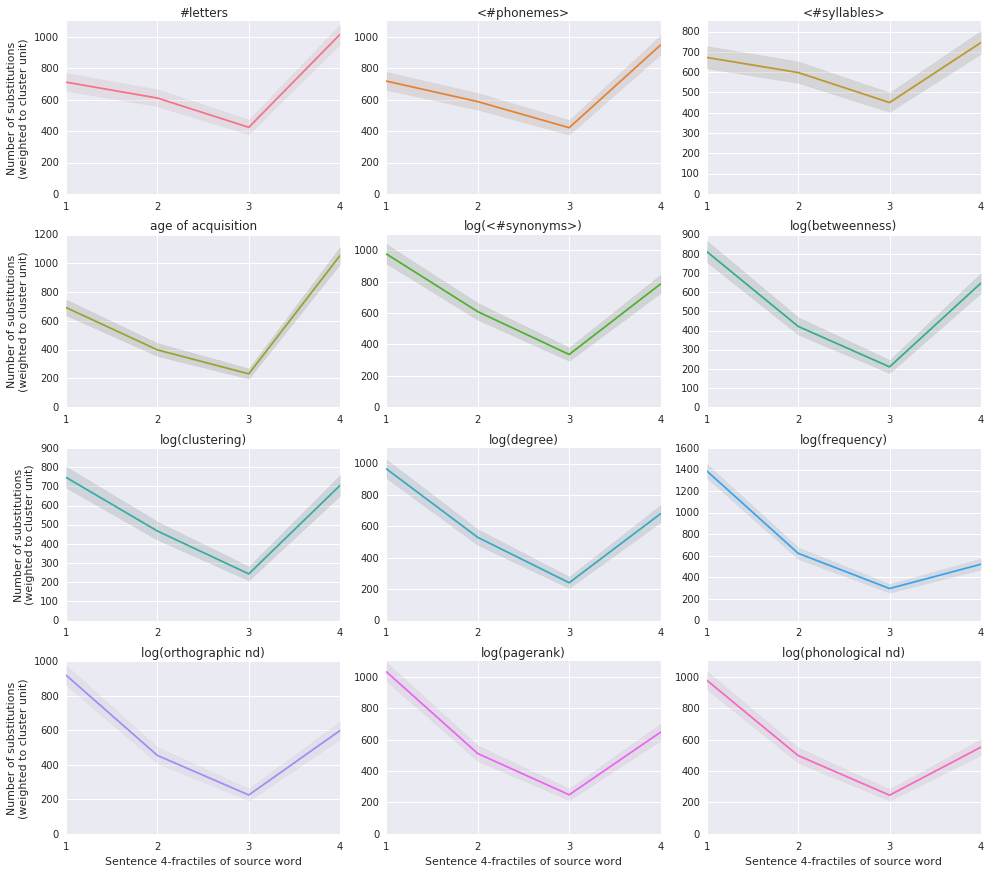

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

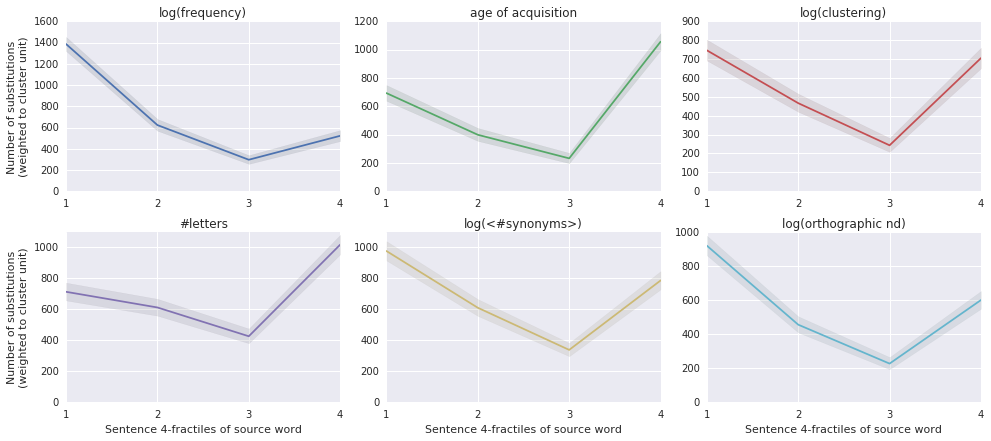

In [21]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)